In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn import over_sampling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier, XGBRegressor

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Data Information

In [ ]:
data = pd.read_csv('Training Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
data.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

# EDA

Pendekatan Numerik (Data Angka)

In [ ]:
data.describe()

Id        Income            Age     Experience  \
count  252000.000000  2.520000e+05  252000.000000  252000.000000   
mean   126000.500000  4.997117e+06      49.954071      10.084437   
std     72746.278255  2.878311e+06      17.063855       6.002590   
min         1.000000  1.031000e+04      21.000000       0.000000   
25%     63000.750000  2.503015e+06      35.000000       5.000000   
50%    126000.500000  5.000694e+06      50.000000      10.000000   
75%    189000.250000  7.477502e+06      65.000000      15.000000   
max    252000.000000  9.999938e+06      79.000000      20.000000   

       CURRENT_JOB_YRS  CURRENT_HOUSE_YRS      Risk_Flag  
count    252000.000000      252000.000000  252000.000000  
mean          6.333877          11.997794       0.123000  
std           3.647053           1.399037       0.328438  
min           0.000000          10.000000       0.000000  
25%           3.000000          11.000000       0.000000  
50%           6.000000          12.000000       0.000000  
75%           9.000000          13.000000       0.000000  
max          14.000000          14.000000       1.000000

Pendekatan Numerik (Non-Angka)

In [ ]:
datana = pd.read_csv('Training Data.csv')
datana = datana.drop(labels = ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'], axis = 1)
datana.describe()

Married/Single House_Ownership Car_Ownership Profession           CITY  \
count          252000          252000        252000     252000         252000   
unique              2               3             2         51            317   
top            single          rented            no  Physician  Vijayanagaram   
freq           226272          231898        176000       5957           1259   

                STATE  
count          252000  
unique             29  
top     Uttar_Pradesh  
freq            28400

Pendekatan Grafis

Univariate Analysis

Data Angka (Univariate + Multivariate [karena saya lihat bisa lebih efisien])

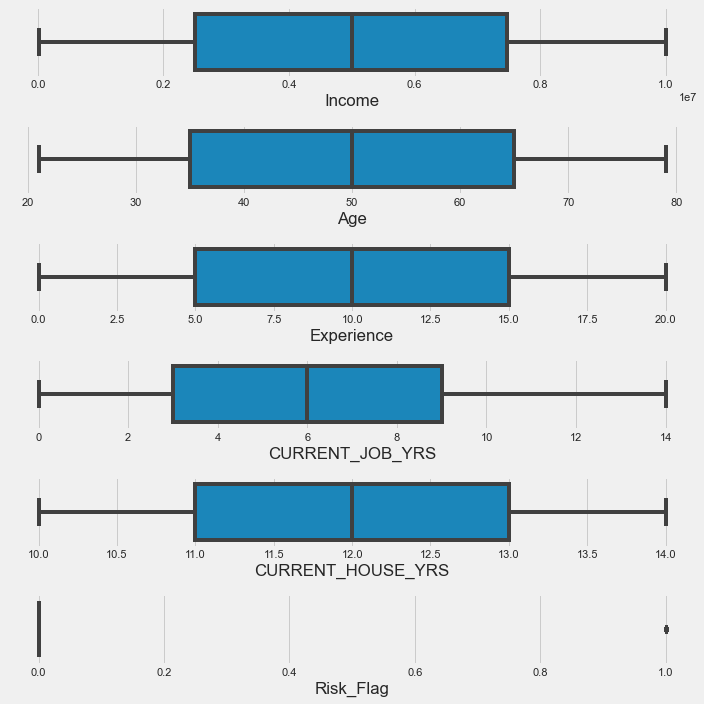

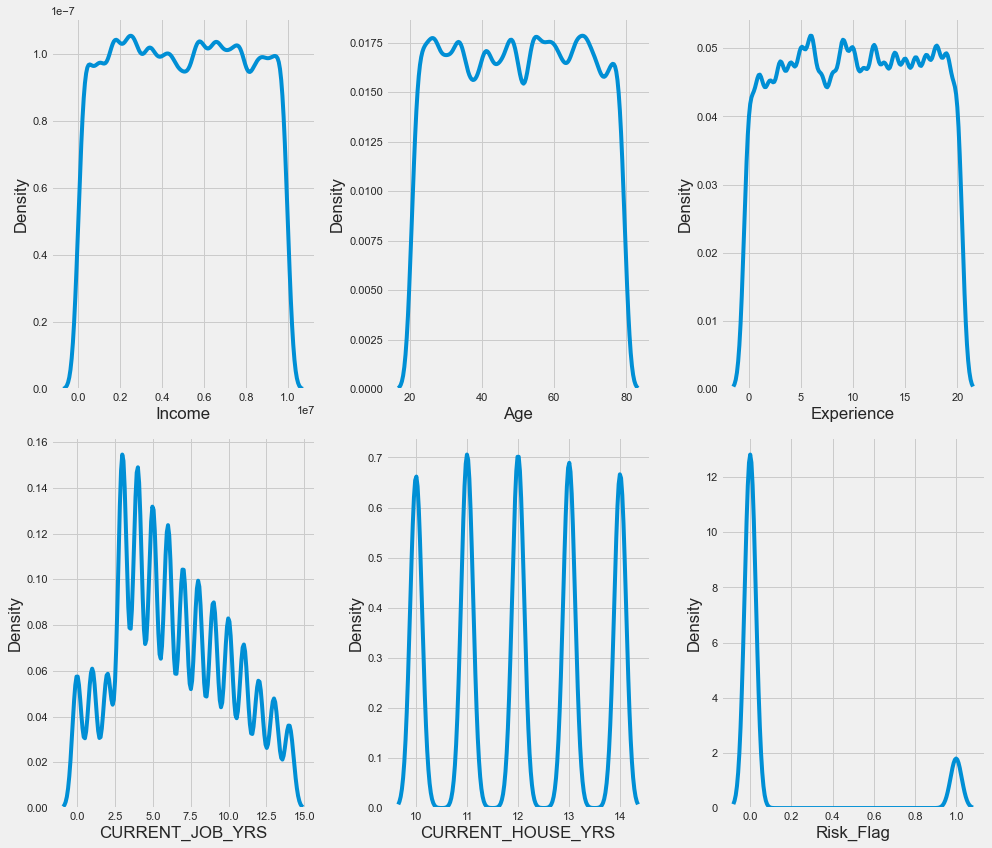

In [ ]:
fig, axes = plt.subplots(6, 1, figsize =(10,10))
sns.boxplot(x='Income', data=data, orient='h', ax=axes[0])
sns.boxplot(x='Age', data=data, orient="h", ax=axes[1])
sns.boxplot(x='Experience', data=data, orient="h", ax=axes[2])
sns.boxplot(x='CURRENT_JOB_YRS', data=data, orient="h", ax=axes[3])
sns.boxplot(x='CURRENT_HOUSE_YRS', data=data, orient="h", ax=axes[4])
sns.boxplot(x='Risk_Flag', data=data, orient="h", ax=axes[5])

plt.tight_layout()

fig, axes = plt.subplots(2, 3, figsize =(14,12))
sns.distplot(data['Income'], ax=axes[0, 0], hist=False)
sns.distplot(data['Age'], ax=axes[0, 1], hist=False)
sns.distplot(data['Experience'], ax=axes[0, 2], hist=False)
sns.distplot(data['CURRENT_JOB_YRS'], ax=axes[1, 0], hist=False)
sns.distplot(data['CURRENT_HOUSE_YRS'], ax=axes[1, 1], hist=False)
sns.distplot(data['Risk_Flag'], ax=axes[1, 2], hist=False)
plt.tight_layout()

Data Non Angka

feature  values
0   Married/Single       2
1  House_Ownership       3
2    Car_Ownership       2
3       Profession      51
4             CITY     317
5            STATE      29

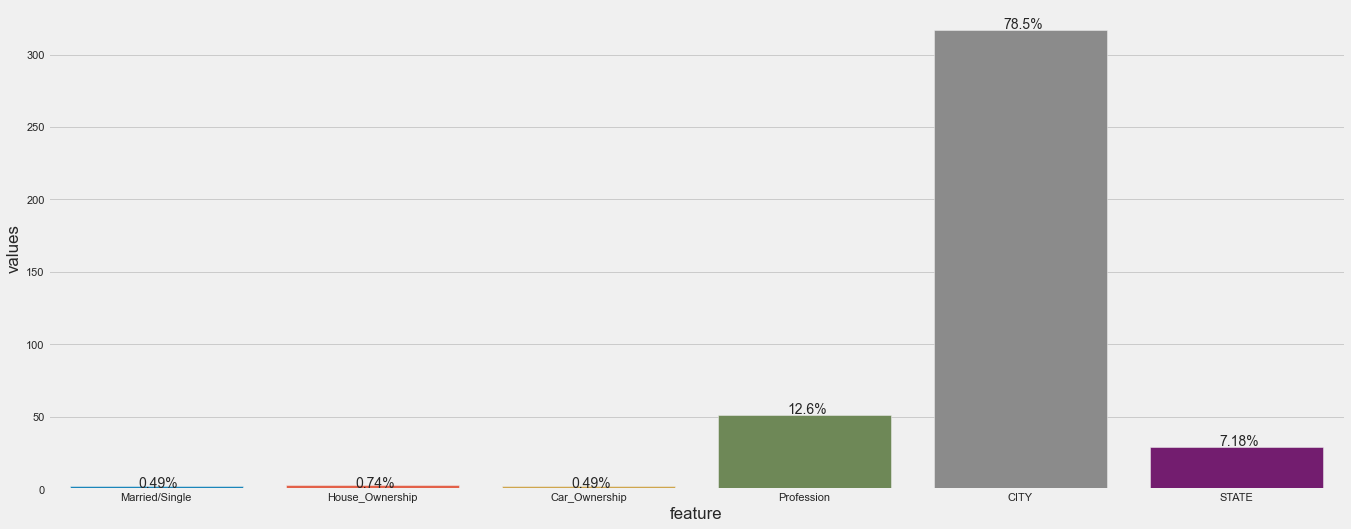

In [ ]:
datana_dist = pd.DataFrame({'feature': ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'],
                           'values': [2, 3, 2, 51, 317, 29]})
sns.barplot(x = 'feature',y='values',data=datana_dist)
plt.text(x=-0.08, y = 1, s= '0.49%')
plt.text(x=0.92, y = 1, s= '0.74%')
plt.text(x=1.92, y = 1, s= '0.49%')
plt.text(x=2.92, y = 52, s= '12.6%')
plt.text(x=3.92, y = 318, s= '78.5%')
plt.text(x=4.92, y = 30, s= '7.18%')
datana_dist

Data Non Angka (Married/Single)

Married/Single  Jumlah
1         single  226272
0        married   25728

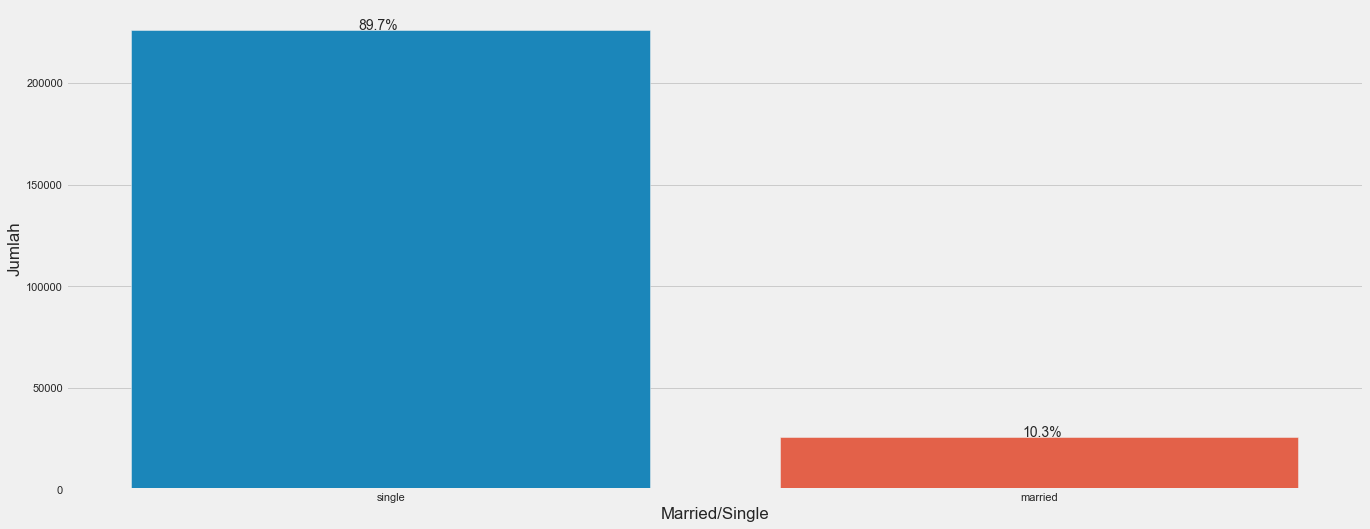

In [ ]:
datana_ms_top10_1 = datana.groupby(['Married/Single']).agg({'Married/Single': ['count']}).reset_index()
datana_ms_top10_1.columns = ['Married/Single', 'Jumlah']
datana_ms_top10_2 = datana_ms_top10_1.sort_values('Jumlah', ascending=False)
sns.barplot(x='Married/Single', y='Jumlah', data=datana_ms_top10_2)
plt.text(x=-0.05, y = 226273, s= '89.7%')
plt.text(x=0.975, y = 25728, s= '10.3%')
datana_ms_top10_2

Data Non Angka (House Owner)

House_Ownership  Jumlah
2          rented  231898
1           owned   12918
0    norent_noown    7184

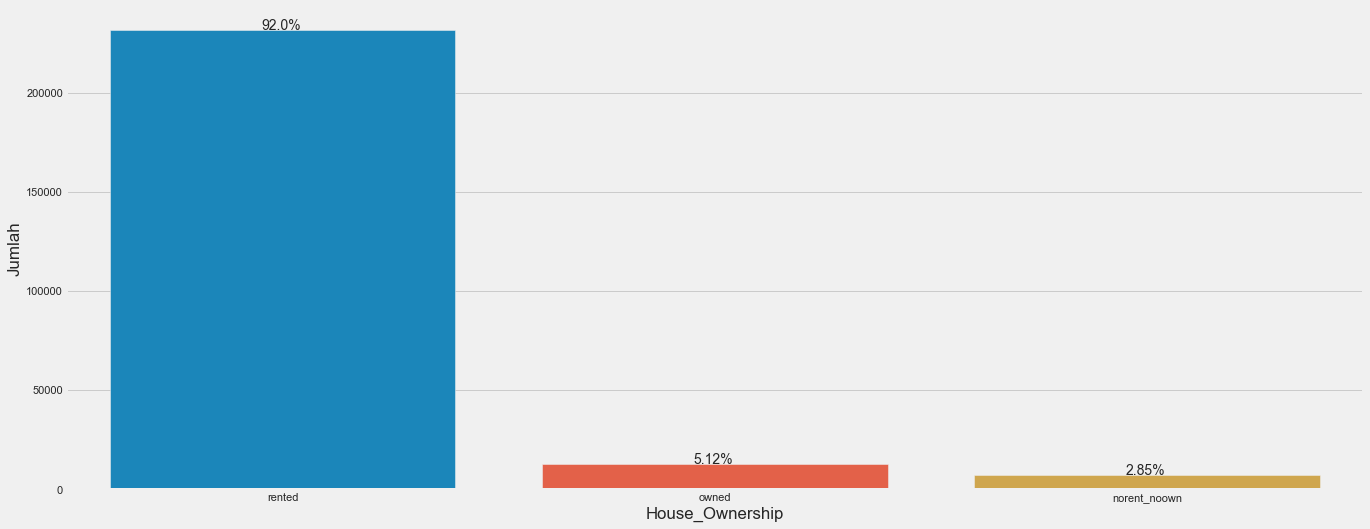

In [ ]:
datana_ho_top10_1 = datana.groupby(['House_Ownership']).agg({'House_Ownership': ['count']}).reset_index()
datana_ho_top10_1.columns = ['House_Ownership', 'Jumlah']
datana_ho_top10_2 = datana_ho_top10_1.sort_values('Jumlah', ascending=False)
sns.barplot(x='House_Ownership', y='Jumlah', data=datana_ho_top10_2)
plt.text(x=-0.05, y = 231899, s= '92.0%')
plt.text(x=0.95, y = 12919, s= '5.12%')
plt.text(x=1.95, y = 7185, s= '2.85%')
datana_ho_top10_2

Data Non Angka (Car Ownership)

Car_Ownership  Jumlah
0            no  176000
1           yes   76000

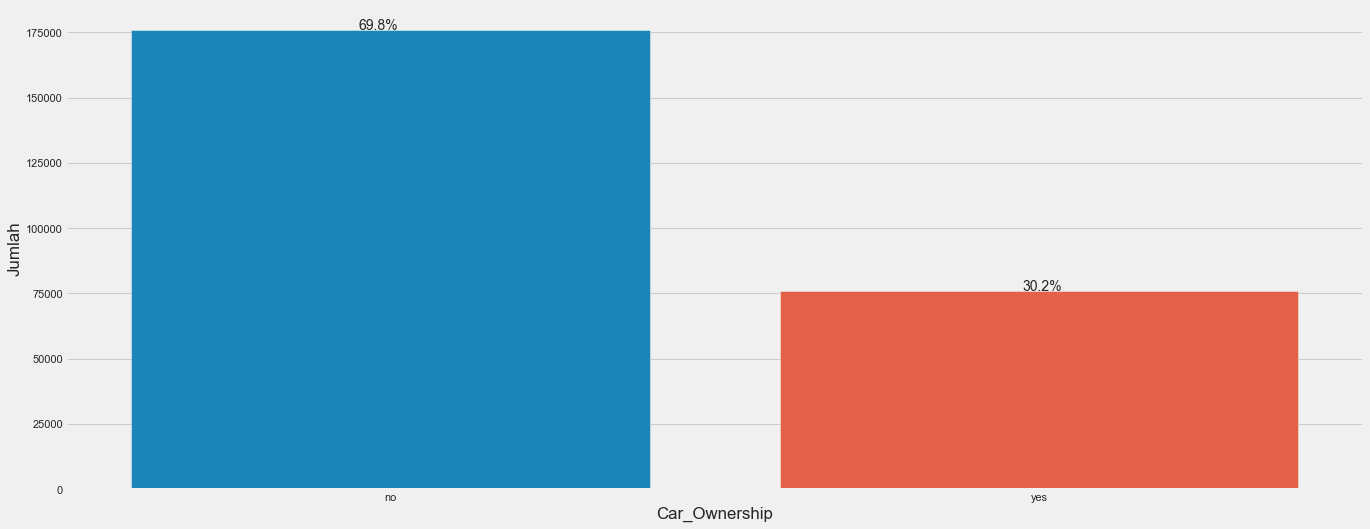

In [ ]:
datana_co_top10_1 = datana.groupby(['Car_Ownership']).agg({'Car_Ownership': ['count']}).reset_index()
datana_co_top10_1.columns = ['Car_Ownership', 'Jumlah']
datana_co_top10_2 = datana_co_top10_1.sort_values('Jumlah', ascending=False)
sns.barplot(x='Car_Ownership', y='Jumlah', data=datana_co_top10_2)
plt.text(x=-0.05, y = 176001, s= '69.8%')
plt.text(x=0.975, y = 76001, s= '30.2%')
datana_co_top10_2

Data Non Angka (Profession)

Profession  Jumlah
37                   Physician    5957
44                Statistician    5806
50                Web_designer    5397
40                Psychologist    5390
13  Computer_hardware_engineer    5372
19                     Drafter    5359
32                  Magistrate    5357
22            Fashion_Designer    5304
0       Air_traffic_controller    5281
12                    Comedian    5259

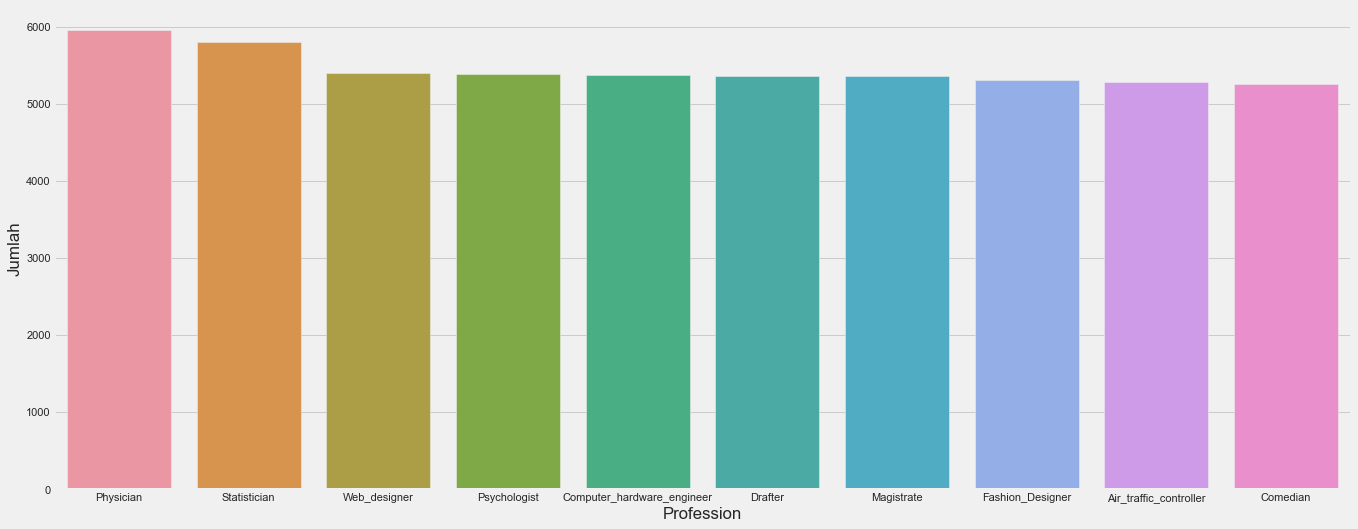

In [ ]:
datana_p_top10_1 = datana.groupby(['Profession']).agg({'Profession': ['count']}).reset_index()
datana_p_top10_1.columns = ['Profession', 'Jumlah']
datana_p_top10_2 = datana_p_top10_1.sort_values('Jumlah', ascending=False).head(10)
sns.barplot(x='Profession', y='Jumlah', data=datana_p_top10_2)
datana_p_top10_2

Data Non Angka (City)

CITY  Jumlah
312  Vijayanagaram    1259
53          Bhopal    1208
64     Bulandshahr    1185
256    Saharsa[29]    1180
313     Vijayawada    1172
281       Srinagar    1136
126         Indore    1130
214      New_Delhi    1098
113    Hajipur[31]    1098
262         Satara    1096

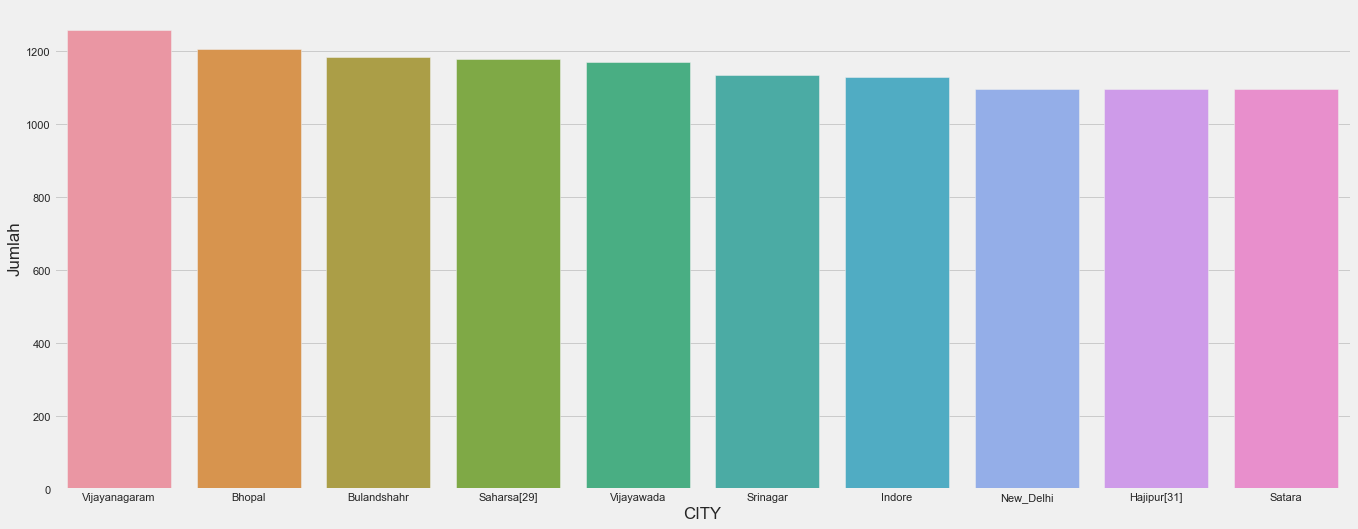

In [ ]:
datana_c_top10_1 = datana.groupby(['CITY']).agg({'CITY': ['count']}).reset_index()
datana_c_top10_1.columns = ['CITY', 'Jumlah']
datana_c_top10_2 = datana_c_top10_1.sort_values('Jumlah', ascending=False).head(10)
sns.barplot(x='CITY', y='Jumlah', data=datana_c_top10_2)
datana_c_top10_2

Data Non Angka (State)

STATE  Jumlah
25   Uttar_Pradesh   28400
14     Maharashtra   25562
0   Andhra_Pradesh   25297
28     West_Bengal   23483
2            Bihar   19780
22      Tamil_Nadu   16537
13  Madhya_Pradesh   14122
11       Karnataka   11855
6          Gujarat   11408
20       Rajasthan    9174

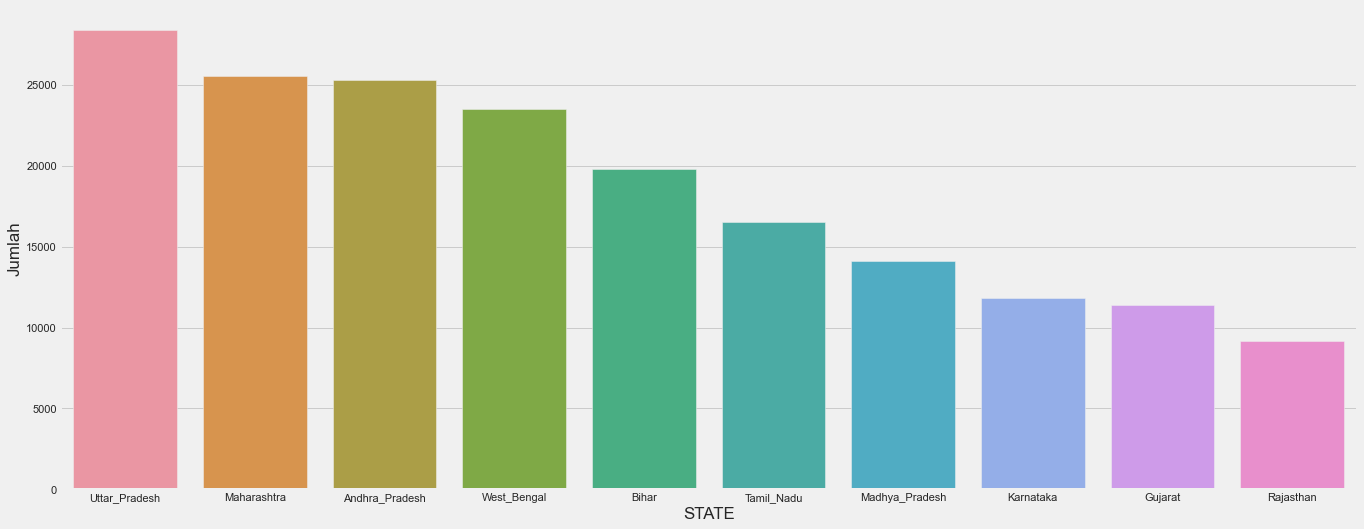

In [ ]:
datana_s_top10_1 = datana.groupby(['STATE']).agg({'STATE': ['count']}).reset_index()
datana_s_top10_1.columns = ['STATE', 'Jumlah']
datana_s_top10_2 = datana_s_top10_1.sort_values('Jumlah', ascending=False).head(10)
sns.barplot(x='STATE', y='Jumlah', data=datana_s_top10_2)
datana_s_top10_2

## Multivariate Anaysis

<AxesSubplot:>

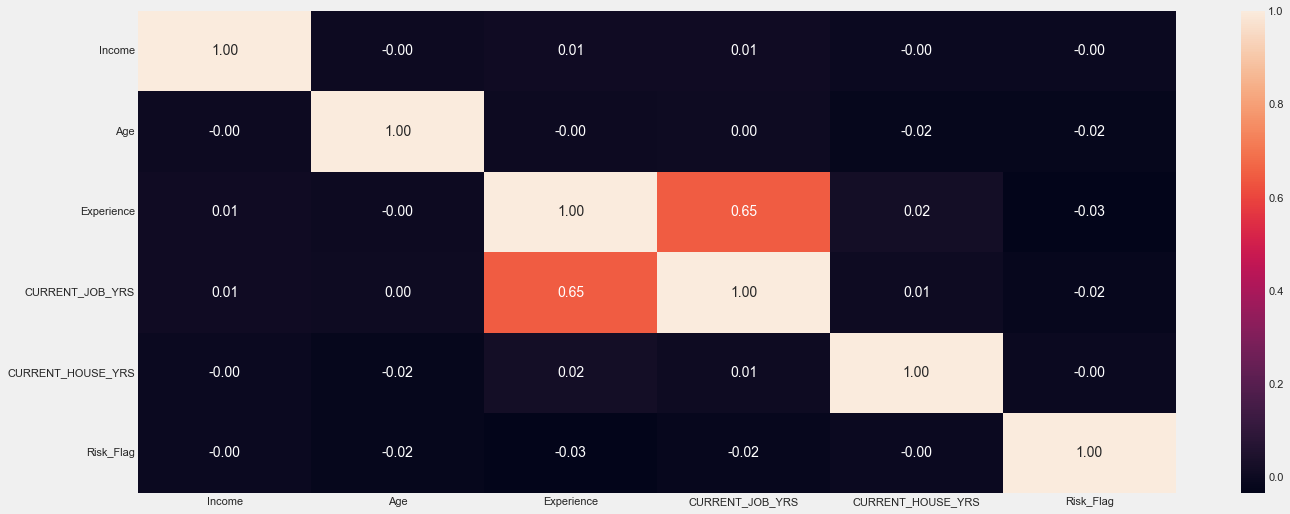

In [ ]:
dataa = pd.read_csv('Training Data.csv')
dataa = dataa.drop(labels = ['Id'], axis = 1)
sns.heatmap(dataa.corr(), annot=True, fmt = ".2f")

Data Angka 

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS', ylabel='Risk_Flag'>

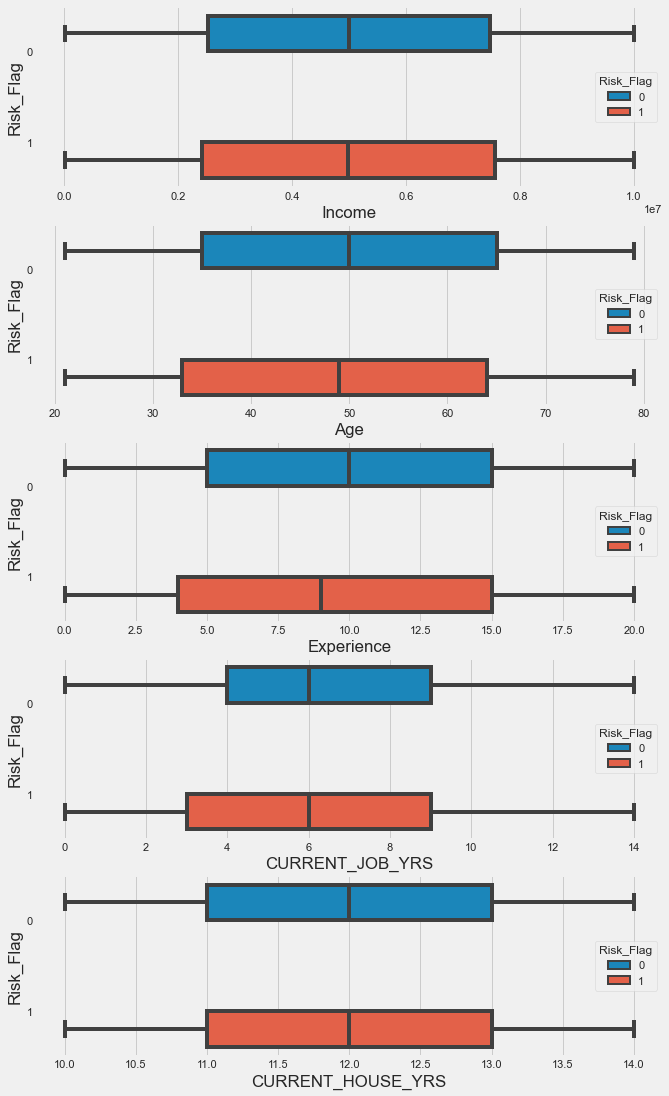

In [ ]:
fig, axes = plt.subplots(5, 1, figsize =(10,18))
sns.boxplot(x='Income', y='Risk_Flag', data=data, orient='h', hue='Risk_Flag', ax=axes[0])
sns.boxplot(x='Age', y='Risk_Flag', data=data, orient="h", hue='Risk_Flag', ax=axes[1])
sns.boxplot(x='Experience', y='Risk_Flag', data=data, orient="h", hue='Risk_Flag', ax=axes[2])
sns.boxplot(x='CURRENT_JOB_YRS', y='Risk_Flag', data=data, orient="h", hue='Risk_Flag', ax=axes[3])
sns.boxplot(x='CURRENT_HOUSE_YRS', y='Risk_Flag', data=data, orient="h", hue='Risk_Flag', ax=axes[4])

Data Non Angka (Married/Single)

Married/Single  Risk_Flag  jumlah  jumlah_orang
2         single          0  197912        226272
3         single          1   28360        226272
0        married          0   23092         25728
1        married          1    2636         25728

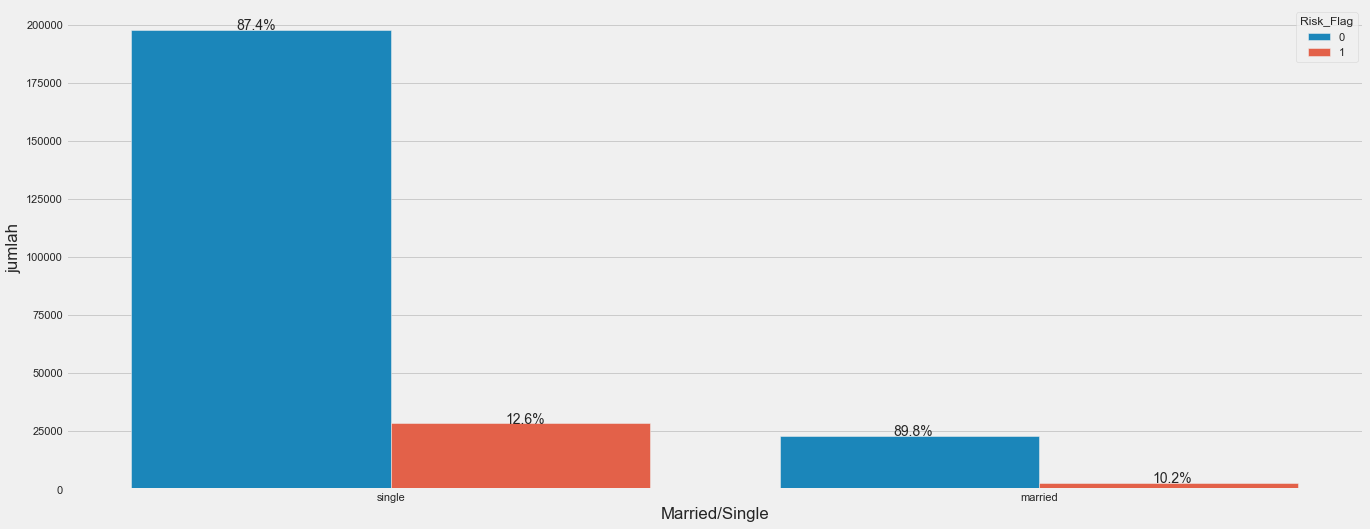

In [ ]:
datana_multiv = pd.read_csv('Training Data.csv')

ms1 = datana_multiv.groupby(['Married/Single', 'Risk_Flag']).agg({'Married/Single': ['count']}).reset_index()
ms1.columns = ['Married/Single', 'Risk_Flag', 'jumlah']
ms1['jumlah_orang'] = ms1.groupby(['Married/Single'])['jumlah'].transform(sum)
ms = ms1.sort_values('jumlah_orang', ascending=False)
sns.barplot(x='Married/Single', y='jumlah', data=ms, hue='Risk_Flag')
plt.text(x=-0.2375, y = 197913, s= '87.4%')
plt.text(x=0.1775, y = 28361, s= '12.6%')
plt.text(x=0.775, y = 23093, s= '89.8%')
plt.text(x=1.175, y = 2637, s= '10.2%')
ms

Data Non Angka (House Owner)

House_Ownership  Risk_Flag  jumlah  jumlah_orang
4          rented          0  202777        231898
5          rented          1   29121        231898
2           owned          0   11758         12918
3           owned          1    1160         12918
0    norent_noown          0    6469          7184
1    norent_noown          1     715          7184

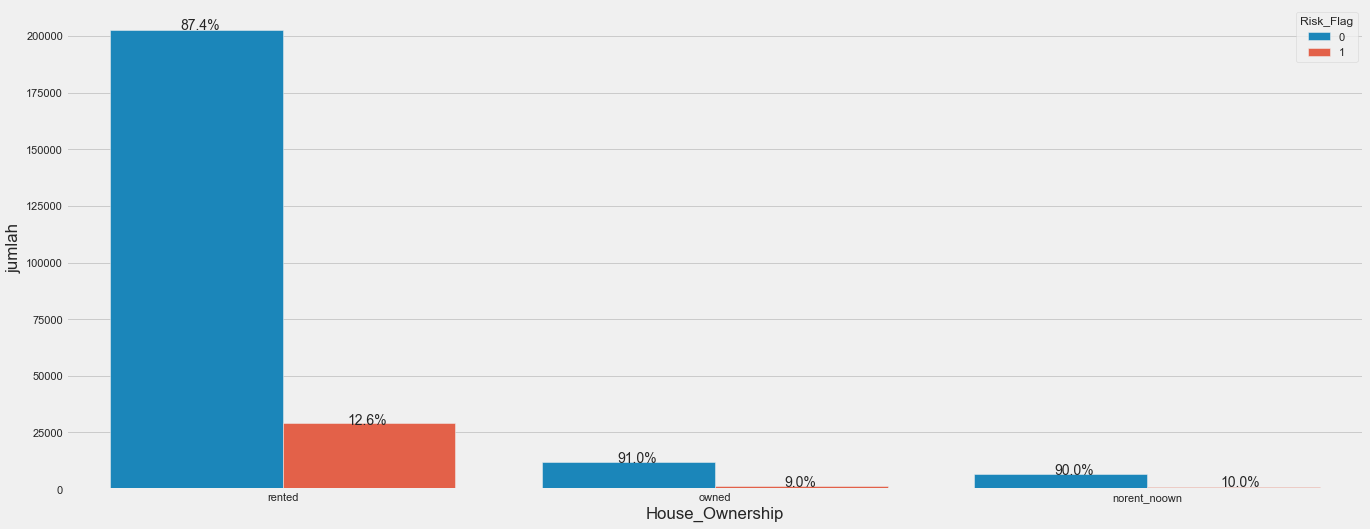

In [ ]:
ho1 = datana_multiv.groupby(['House_Ownership', 'Risk_Flag']).agg({'House_Ownership': ['count']}).reset_index()
ho1.columns = ['House_Ownership', 'Risk_Flag', 'jumlah']
ho1['jumlah_orang'] = ho1.groupby(['House_Ownership'])['jumlah'].transform(sum)
ho = ho1.sort_values('jumlah_orang', ascending=False)
sns.barplot(x='House_Ownership', y='jumlah', data=ho, hue='Risk_Flag')
plt.text(x=-0.2375, y = 202778, s= '87.4%')
plt.text(x=0.15, y = 28361, s= '12.6%')
plt.text(x=0.775, y = 11759, s= '91.0%')
plt.text(x=1.16, y = 1161, s= '9.0%')
plt.text(x=1.785, y = 6470, s= '90.0%')
plt.text(x=2.17, y = 1161, s= '10.0%')
ho

Data Non Angka (Car Ownership)

Car_Ownership  Risk_Flag  jumlah  jumlah_orang
0            no          0  153439        176000
1            no          1   22561        176000
2           yes          0   67565         76000
3           yes          1    8435         76000

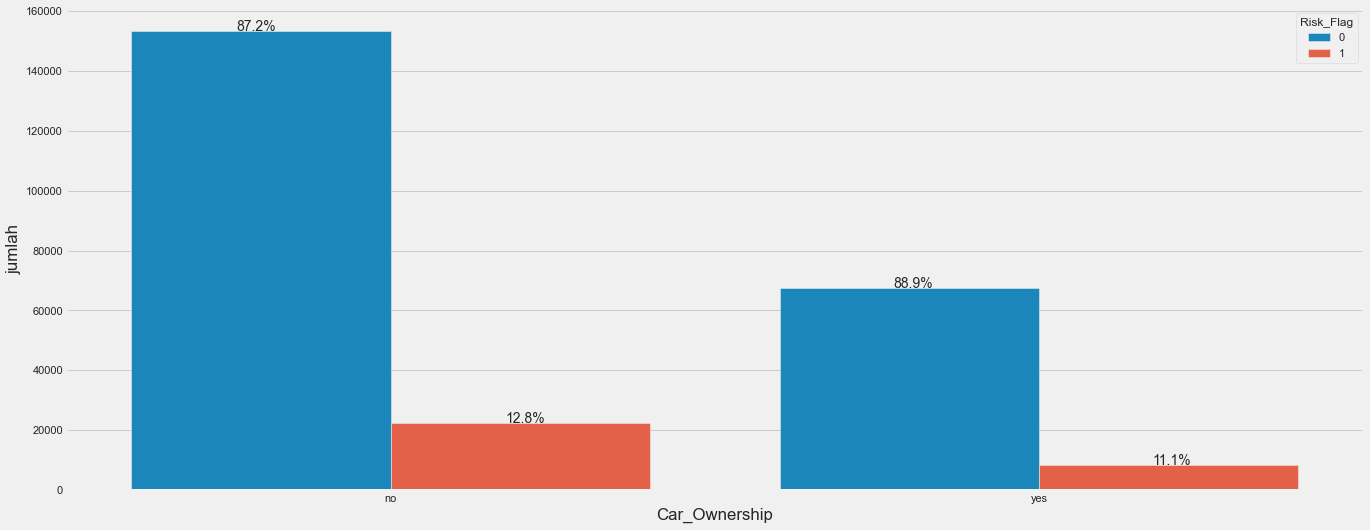

In [ ]:
co1 = datana_multiv.groupby(['Car_Ownership', 'Risk_Flag']).agg({'Car_Ownership': ['count']}).reset_index()
co1.columns = ['Car_Ownership', 'Risk_Flag', 'jumlah']
co1['jumlah_orang'] = co1.groupby(['Car_Ownership'])['jumlah'].transform(sum)
co = co1.sort_values('jumlah_orang', ascending=False)
sns.barplot(x='Car_Ownership', y='jumlah', data=co, hue='Risk_Flag')
plt.text(x=-0.2375, y = 153440, s= '87.2%')
plt.text(x=0.1775, y = 22562, s= '12.8%')
plt.text(x=0.775, y = 67566, s= '88.9%')
plt.text(x=1.175, y = 8436, s= '11.1%')
co

Data Non Angka (Profession)

Profession  Risk_Flag  jumlah  jumlah_orang
74                    Physician          0    5247          5957
75                    Physician          1     710          5957
88                 Statistician          0    5135          5806
89                 Statistician          1     671          5806
101                Web_designer          1     589          5397
100                Web_designer          0    4808          5397
81                 Psychologist          1     657          5390
80                 Psychologist          0    4733          5390
26   Computer_hardware_engineer          0    4682          5372
27   Computer_hardware_engineer          1     690          5372
39                      Drafter          1     605          5359
38                      Drafter          0    4754          5359
65                   Magistrate          1     643          5357
64                   Magistrate          0    4714          5357
45             Fashion_Designer          1     612          5304
44             Fashion_Designer          0    4692          5304
1        Air_traffic_controller          1     715          5281
0        Air_traffic_controller          0    4566          5281
25                     Comedian          1     629          5259
24                     Comedian          0    4630          5259

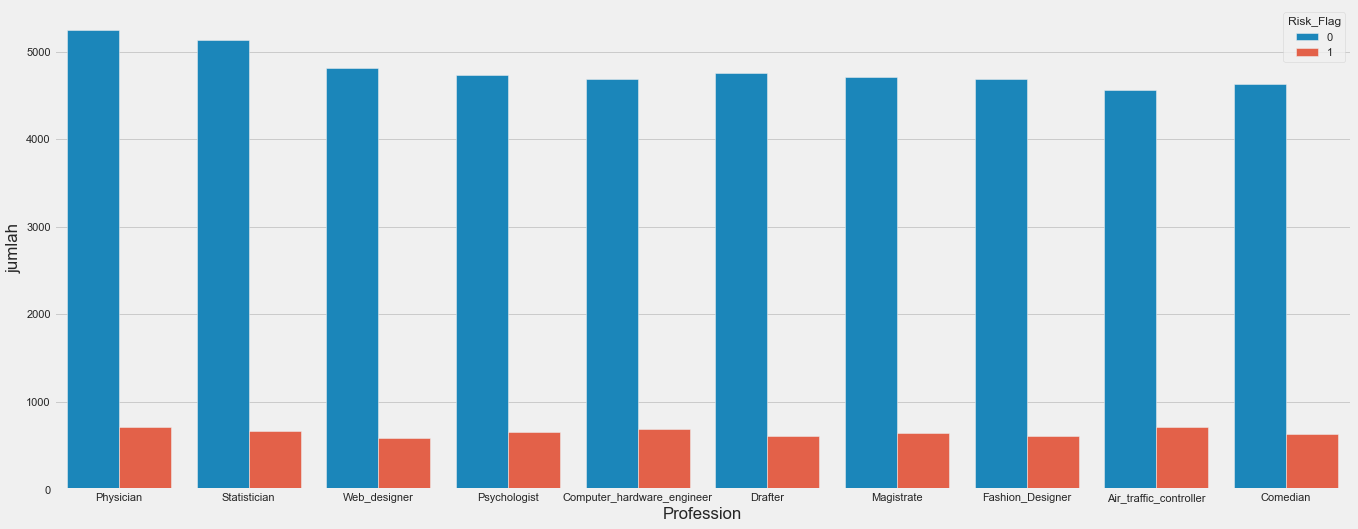

In [ ]:
p1 = datana_multiv.groupby(['Profession', 'Risk_Flag']).agg({'Profession': ['count']}).reset_index()
p1.columns = ['Profession', 'Risk_Flag', 'jumlah']
p1['jumlah_orang'] = p1.groupby(['Profession'])['jumlah'].transform(sum)
p = p1.sort_values('jumlah_orang', ascending=False).head(20)
sns.barplot(x='Profession', y='jumlah', data=p, hue='Risk_Flag')
p


Data Non Angka (City)

CITY  Risk_Flag  jumlah  jumlah_orang
625  Vijayanagaram          1     149          1259
624  Vijayanagaram          0    1110          1259
107         Bhopal          1     166          1208
106         Bhopal          0    1042          1208
128    Bulandshahr          0    1061          1185
129    Bulandshahr          1     124          1185
512    Saharsa[29]          0    1067          1180
513    Saharsa[29]          1     113          1180
626     Vijayawada          0    1025          1172
627     Vijayawada          1     147          1172
562       Srinagar          0     920          1136
563       Srinagar          1     216          1136
252         Indore          0     918          1130
253         Indore          1     212          1130
429      New_Delhi          1      74          1098
428      New_Delhi          0    1024          1098
227    Hajipur[31]          1     140          1098
226    Hajipur[31]          0     958          1098
524         Satara          0     992          1096
525         Satara          1     104          1096

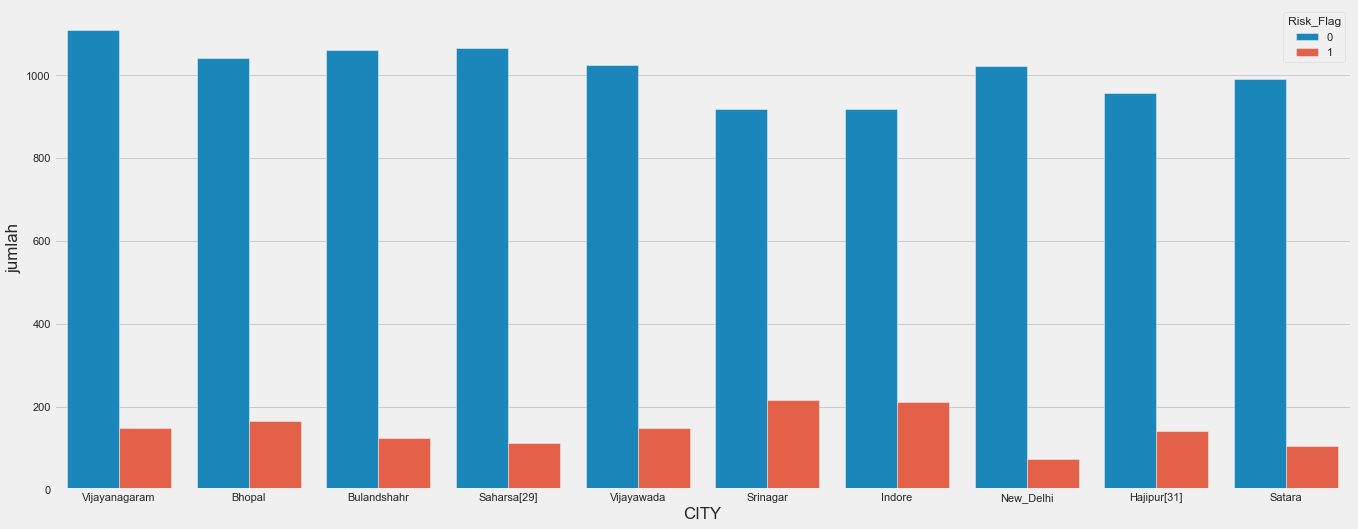

In [ ]:
c1 = datana_multiv.groupby(['CITY', 'Risk_Flag']).agg({'CITY': ['count']}).reset_index()
c1.columns = ['CITY', 'Risk_Flag', 'jumlah']
c1['jumlah_orang'] = c1.groupby(['CITY'])['jumlah'].transform(sum)
c = c1.sort_values('jumlah_orang', ascending=False).head(20)
sns.barplot(x='CITY', y='jumlah', data=c, hue='Risk_Flag')
c

Data Non Angka (State)

STATE  Risk_Flag  jumlah  jumlah_orang
51   Uttar_Pradesh          1    3343         28400
50   Uttar_Pradesh          0   25057         28400
29     Maharashtra          1    2895         25562
28     Maharashtra          0   22667         25562
1   Andhra_Pradesh          1    2935         25297
0   Andhra_Pradesh          0   22362         25297
57     West_Bengal          1    3009         23483
56     West_Bengal          0   20474         23483
4            Bihar          0   17197         19780
5            Bihar          1    2583         19780
44      Tamil_Nadu          0   14831         16537
45      Tamil_Nadu          1    1706         16537
26  Madhya_Pradesh          0   11942         14122
27  Madhya_Pradesh          1    2180         14122
22       Karnataka          0   10666         11855
23       Karnataka          1    1189         11855
12         Gujarat          0   10065         11408
13         Gujarat          1    1343         11408
41       Rajasthan          1    1292          9174
40       Rajasthan          0    7882          9174

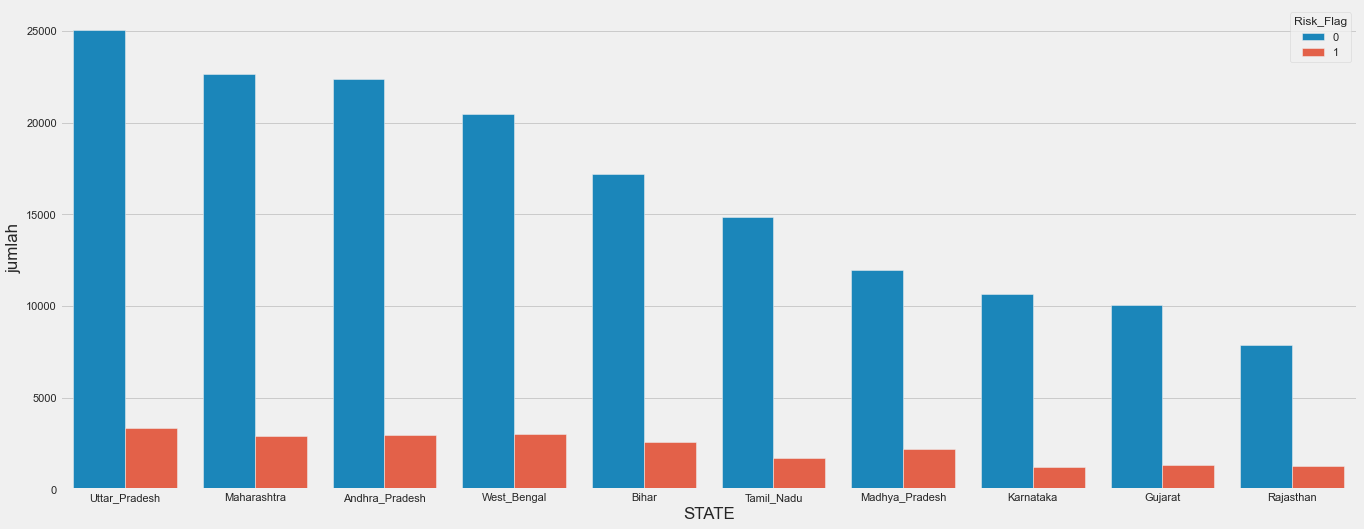

In [ ]:
s1 = datana_multiv.groupby(['STATE', 'Risk_Flag']).agg({'STATE': ['count']}).reset_index()
s1.columns = ['STATE', 'Risk_Flag', 'jumlah']
s1['jumlah_orang'] = s1.groupby(['STATE'])['jumlah'].transform(sum)
s = s1.sort_values('jumlah_orang', ascending=False).head(20)
sns.barplot(x='STATE', y='jumlah', data=s, hue='Risk_Flag')
s

# Data Pre-Processing

In [ ]:
data_pre = data

Duplicate Values

In [ ]:
data.duplicated().sum()

0

## Feature Encoding

Feature Encoding (kami hanya menggunakan feature encoding di bagian state dan job dengan alasan: 
1. Kolom city terlalu banyak jadi berfokus di state yang dimana lebih disortir lagi berdasarkan peta India.
2. Kolom profession terlalu banyak jadi disortir kembali berdasarkan trained, educated, dan non job type.)

In [ ]:
#Simplifikasi dari kolom profesi.
data_pre['Profession'].replace('Air_traffic_controller','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Analyst','Professionals', inplace=True)
data_pre['Profession'].replace('Architect','Professionals', inplace=True)
data_pre['Profession'].replace('Army_officer','Armed forces', inplace=True)
data_pre['Profession'].replace('Artist','Professionals', inplace=True)
data_pre['Profession'].replace('Aviator','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Biomedical_Engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Chartered_Accountant','Professionals', inplace=True)
data_pre['Profession'].replace('Chef','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Chemical_engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Civil_engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Civil_servant','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Comedian','Professionals', inplace=True)
data_pre['Profession'].replace('Computer_hardware_engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Computer_operator','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Consultant','Professionals', inplace=True)
data_pre['Profession'].replace('Dentist','Professionals', inplace=True)
data_pre['Profession'].replace('Design_Engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Designer','Professionals', inplace=True)
data_pre['Profession'].replace('Drafter','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Economist','Professionals', inplace=True)
data_pre['Profession'].replace('Engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Fashion_Designer','Professionals', inplace=True)
data_pre['Profession'].replace('Financial_Analyst','Professionals', inplace=True)
data_pre['Profession'].replace('Firefighter','Service and sales workers', inplace=True)
data_pre['Profession'].replace('Flight_attendant','Service and sales workers', inplace=True)
data_pre['Profession'].replace('Geologist','Professionals', inplace=True)
data_pre['Profession'].replace('Graphic_Designer','Professionals', inplace=True)
data_pre['Profession'].replace('Hotel_Manager','Managers', inplace=True)
data_pre['Profession'].replace('Industrial_Engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Lawyer','Professionals', inplace=True)
data_pre['Profession'].replace('Librarian','Professionals', inplace=True)
data_pre['Profession'].replace('Magistrate','Professionals', inplace=True)
data_pre['Profession'].replace('Mechanical_engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Microbiologist','Professionals', inplace=True)
data_pre['Profession'].replace('Official','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Petroleum_Engineer','Professionals', inplace=True)
data_pre['Profession'].replace('Physician','Professionals', inplace=True)
data_pre['Profession'].replace('Police_officer','Service and sales workers', inplace=True)
data_pre['Profession'].replace('Politician','Professionals', inplace=True)
data_pre['Profession'].replace('Psychologist','Professionals', inplace=True)
data_pre['Profession'].replace('Scientist','Professionals', inplace=True)
data_pre['Profession'].replace('Secretary','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Software_Developer','Professionals', inplace=True)
data_pre['Profession'].replace('Statistician','Professionals', inplace=True)
data_pre['Profession'].replace('Surgeon','Professionals', inplace=True)
data_pre['Profession'].replace('Surveyor','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Technical_writer','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Technician','Technicians and associate professionals', inplace=True)
data_pre['Profession'].replace('Technology_specialist','Professionals', inplace=True)
data_pre['Profession'].replace('Web_designer','Professionals', inplace=True)

#Simplifikasi dari kolom State
data_pre['STATE'].replace('Andhra_Pradesh','South', inplace=True)
data_pre['STATE'].replace('Assam','North', inplace=True)
data_pre['STATE'].replace('Bihar','East', inplace=True)
data_pre['STATE'].replace('Chandigarh','North', inplace=True)
data_pre['STATE'].replace('Chhattisgarh','Central', inplace=True)
data_pre['STATE'].replace('Delhi','North', inplace=True)
data_pre['STATE'].replace('Gujarat','West', inplace=True)
data_pre['STATE'].replace('Haryana','North', inplace=True)
data_pre['STATE'].replace('Himachal_Pradesh','North', inplace=True)
data_pre['STATE'].replace('Jammu_and_Kashmir','North', inplace=True)
data_pre['STATE'].replace('Jharkhand','East', inplace=True)
data_pre['STATE'].replace('Karnataka','South', inplace=True)
data_pre['STATE'].replace('Kerala','South', inplace=True)
data_pre['STATE'].replace('Madhya_Pradesh','Central', inplace=True)
data_pre['STATE'].replace('Maharashtra','West', inplace=True)
data_pre['STATE'].replace('Manipur','North', inplace=True)
data_pre['STATE'].replace('Mizoram','North', inplace=True)
data_pre['STATE'].replace('Odisha','East', inplace=True)
data_pre['STATE'].replace('Puducherry','South', inplace=True)
data_pre['STATE'].replace('Punjab','North', inplace=True)
data_pre['STATE'].replace('Rajasthan','North', inplace=True)
data_pre['STATE'].replace('Sikkim','North', inplace=True)
data_pre['STATE'].replace('Tamil_Nadu','South', inplace=True)
data_pre['STATE'].replace('Telangana','South', inplace=True)
data_pre['STATE'].replace('Tripura','North', inplace=True)
data_pre['STATE'].replace('Uttar_Pradesh','North', inplace=True)
data_pre['STATE'].replace('Uttar_Pradesh[5]','North', inplace=True)
data_pre['STATE'].replace('Uttarakhand','North', inplace=True)
data_pre['STATE'].replace('West_Bengal','East', inplace=True)

In [ ]:
dummies_category1 = pd.get_dummies(data_pre['Profession'],prefix='Profession')
dummies_category2 = pd.get_dummies(data_pre['STATE'],prefix='STATE')
dummies_category3 = pd.get_dummies(data_pre['Married/Single'],prefix='Married/Single')
dummies_category4 = pd.get_dummies(data_pre['House_Ownership'],prefix='House_Ownership')
dummies_category5 = pd.get_dummies(data_pre['Car_Ownership'],prefix='Car_Ownership')
data_pre = pd.concat([data_pre, dummies_category1, dummies_category2, dummies_category3, dummies_category4, dummies_category5], axis=1)
data_pre = data_pre.drop(['Id', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'], axis=1)
data_pre


Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0       1303834   23           3                3                 13   
1       7574516   40          10                9                 13   
2       3991815   66           4                4                 10   
3       6256451   41           2                2                 12   
4       5768871   47          11                3                 14   
...         ...  ...         ...              ...                ...   
251995  8154883   43          13                6                 11   
251996  2843572   26          10                6                 11   
251997  4522448   46           7                7                 12   
251998  6507128   45           0                0                 10   
251999  9070230   70          17                7                 11   

        Risk_Flag  Profession_Armed forces  Profession_Managers  \
0               0                        0                    0   
1               0                        0                    0   
2               0                        0                    0   
3               1                        0                    0   
4               1                        0                    0   
...           ...                      ...                  ...   
251995          0                        0                    0   
251996          0                        1                    0   
251997          0                        0                    0   
251998          0                        0                    0   
251999          0                        0                    0   

        Profession_Professionals  Profession_Service and sales workers  ...  \
0                              1                                     0  ...   
1                              1                                     0  ...   
2                              0                                     0  ...   
3                              1                                     0  ...   
4                              0                                     0  ...   
...                          ...                                   ...  ...   
251995                         1                                     0  ...   
251996                         0                                     0  ...   
251997                         1                                     0  ...   
251998                         1                                     0  ...   
251999                         1                                     0  ...   

        STATE_North  STATE_South  STATE_West  Married/Single_married  \
0                 0            0           0                       0   
1                 0            0           1                       0   
2                 0            1           0                       1   
3                 0            0           0                       0   
4                 0            1           0                       0   
...             ...          ...         ...                     ...   
251995            0            0           0                       0   
251996            0            0           0                       0   
251997            0            0           1                       0   
251998            0            1           0                       0   
251999            0            1           0                       0   

        Married/Single_single  House_Ownership_norent_noown  \
0                           1                             0   
1                           1                             0   
2                           0                             0   
3                           1                             0   
4                           1                             0   
...                       ...                           ...   
251995                      1                             0   
251996               

## Standardiation/Normalization

In [ ]:
risk = data_pre['Risk_Flag']
nonrisk = data_pre.drop(labels = ['Risk_Flag'], axis = 1)
normalisasi = StandardScaler().fit_transform(nonrisk)
normalisasi_data = pd.DataFrame(normalisasi, columns=list(nonrisk))
normalisasi_data

Income       Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0      -1.283145 -1.579604   -1.180232        -0.914131           0.716356   
1       0.895457 -0.583344   -0.014067         0.731036           0.716356   
2      -0.349269  0.940348   -1.013637        -0.639936          -1.427981   
3       0.437526 -0.524740   -1.346827        -1.188325           0.001577   
4       0.268128 -0.173119    0.152528        -0.914131           1.431135   
...          ...       ...         ...              ...                ...   
251995  1.097092 -0.407533    0.485719        -0.091547          -0.713202   
251996 -0.748199 -1.403793   -0.014067        -0.091547          -0.713202   
251997 -0.164913 -0.231723   -0.513852         0.182647           0.001577   
251998  0.524618 -0.290326   -1.680018        -1.736714          -1.427981   
251999  1.415108  1.174762    1.152099         0.182647          -0.713202   

        Profession_Armed forces  Profession_Managers  \
0                     -0.137276             -0.14484   
1                     -0.137276             -0.14484   
2                     -0.137276             -0.14484   
3                     -0.137276             -0.14484   
4                     -0.137276             -0.14484   
...                         ...                  ...   
251995                -0.137276             -0.14484   
251996                 7.284617             -0.14484   
251997                -0.137276             -0.14484   
251998                -0.137276             -0.14484   
251999                -0.137276             -0.14484   

        Profession_Professionals  Profession_Service and sales workers  \
0                       0.668701                             -0.248622   
1                       0.668701                             -0.248622   
2                      -1.495436                             -0.248622   
3                       0.668701                             -0.248622   
4                      -1.495436                             -0.248622   
...                          ...                                   ...   
251995                  0.668701                             -0.248622   
251996                 -1.495436                             -0.248622   
251997                  0.668701                             -0.248622   
251998                  0.668701                             -0.248622   
251999                  0.668701                             -0.248622   

        Profession_Technicians and associate professionals  ...  STATE_North  \
0                                               -0.518274   ...    -0.630839   
1                                               -0.518274   ...    -0.630839   
2                                                1.929483   ...    -0.630839   
3                                               -0.518274   ...    -0.630839   
4                                                1.929483   ...    -0.630839   
...                                                   ...   ...          ...   
251995                                          -0.518274   ...    -0.630839   
251996                                          -0.518274   ...    -0.630839   
251997                                          -0.518274   ...    -0.630839   
251998                                          -0.518274   ...    -0.630839   
251999                                          -0.518274   ...    -0.630839   

        STATE_South  STATE_West  Married/Single_married  \
0         -0.610680   -0.414644               -0.337200   
1         -0.610680    2.411708               -0.337200   
2          1.637518   -0.414644                2.965599   
3         -0.610680   -0.414644               -0.337200   
4          1.637518   -0.414644               -0.337200   
...             ...         ...                     ...   
251995    -0.610680   -0.414644               -0.337200   
251996    -0.610680   -0.414644               -0.337200   
251997    -0.610680

## Class Imbalance

hasil  jumlah
0      0  221004
1      1   30996

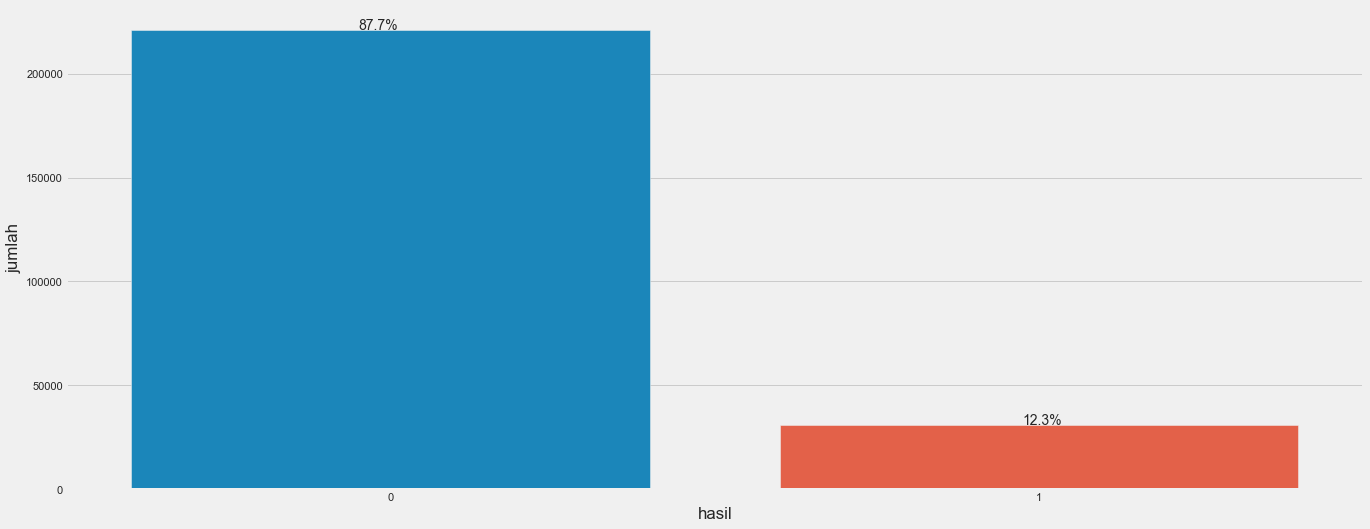

In [ ]:
tabeljumlahrisk = data_pre.groupby(['Risk_Flag']).agg({'Risk_Flag': ['count']}).reset_index()
tabeljumlahrisk.columns = ['hasil', 'jumlah']
sns.barplot(x = 'hasil', y = 'jumlah', data=tabeljumlahrisk)
plt.text(x=-0.05, y = 221005, s= '87.7%')
plt.text(x=0.975, y = 30997, s= '12.3%')
tabeljumlahrisk

In [ ]:
nonrisk_over_smote, risk_over_smote = over_sampling.SMOTE().fit_resample(nonrisk, risk)
data_smote = pd.concat([nonrisk_over_smote, risk_over_smote], axis=1)
data_smote = data_smote.drop_duplicates()

hasil  jumlah
0      0   34747
1      1   53150

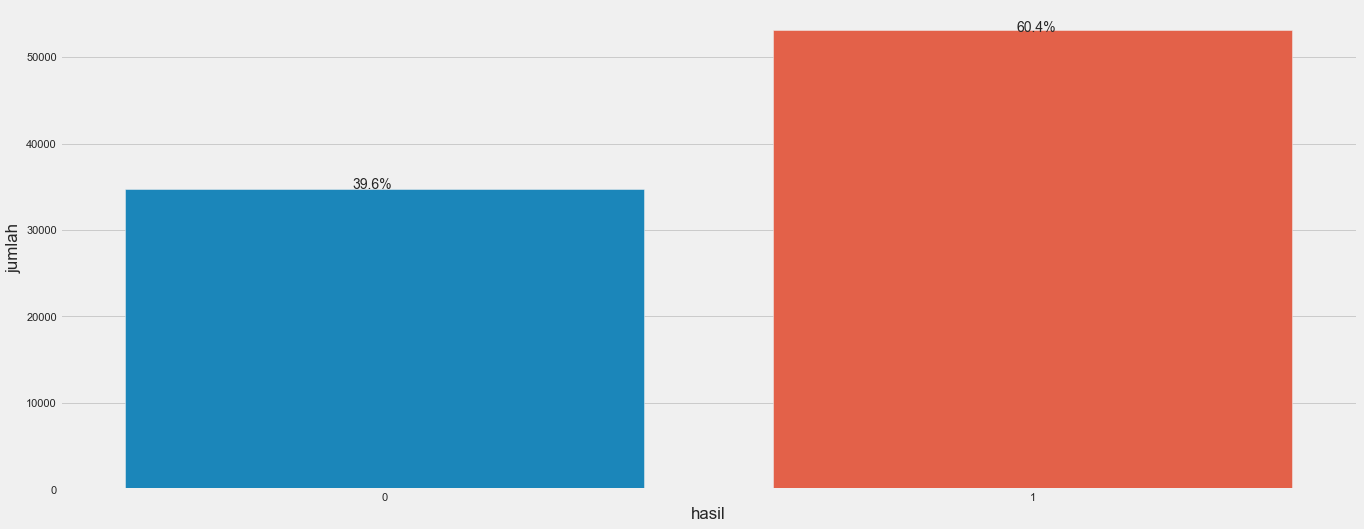

In [ ]:
smotedata = data_smote.groupby(['Risk_Flag']).agg({'Risk_Flag': ['count']}).reset_index()
smotedata.columns = ['hasil', 'jumlah']
sns.barplot(x = 'hasil', y = 'jumlah', data=smotedata)
plt.text(x=-0.05, y = 34748, s= '39.6%')
plt.text(x=0.975, y = 52906, s= '60.4%')
smotedata

In [ ]:
data_smote

Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0       1303834   23           3                3                 13   
1       7574516   40          10                9                 13   
2       3991815   66           4                4                 10   
3       6256451   41           2                2                 12   
4       5768871   47          11                3                 14   
...         ...  ...         ...              ...                ...   
441980   577701   39          15                8                 10   
441988  6365615   54          18                8                 12   
441991  7265411   44           9                9                 11   
441993  2812226   52          10               10                 12   
442004  8492651   45           7                7                 11   

        Profession_Armed forces  Profession_Managers  \
0                             0                    0   
1                             0                    0   
2                             0                    0   
3                             0                    0   
4                             0                    0   
...                         ...                  ...   
441980                        0                    0   
441988                        0                    0   
441991                        0                    0   
441993                        0                    0   
442004                        0                    0   

        Profession_Professionals  Profession_Service and sales workers  \
0                              1                                     0   
1                              1                                     0   
2                              0                                     0   
3                              1                                     0   
4                              0                                     0   
...                          ...                                   ...   
441980                         1                                     0   
441988                         1                                     0   
441991                         1                                     0   
441993                         1                                     0   
442004                         0                                     0   

        Profession_Technicians and associate professionals  ...  STATE_South  \
0                                                       0   ...            0   
1                                                       0   ...            0   
2                                                       1   ...            1   
3                                                       0   ...            0   
4                                                       1   ...            1   
...                                                   ...   ...          ...   
441980                                                  0   ...            0   
441988                                                  0   ...            0   
441991                                                  0   ...            1   
441993                                                  0   ...            0   
442004                                                  0   ...            0   

        STATE_West  Married/Single_married  Married/Single_single  \
0                0                       0                      1   
1                1                       0                      1   
2                0                       1                      0   
3                0                       0                      1   
4                0                       0                      1   
...            ...                     ...                    ...   
441980           1                       0                      1   
441988           0                       0                      1   


Multivariate (Grouped)

Heatmap

<AxesSubplot:>

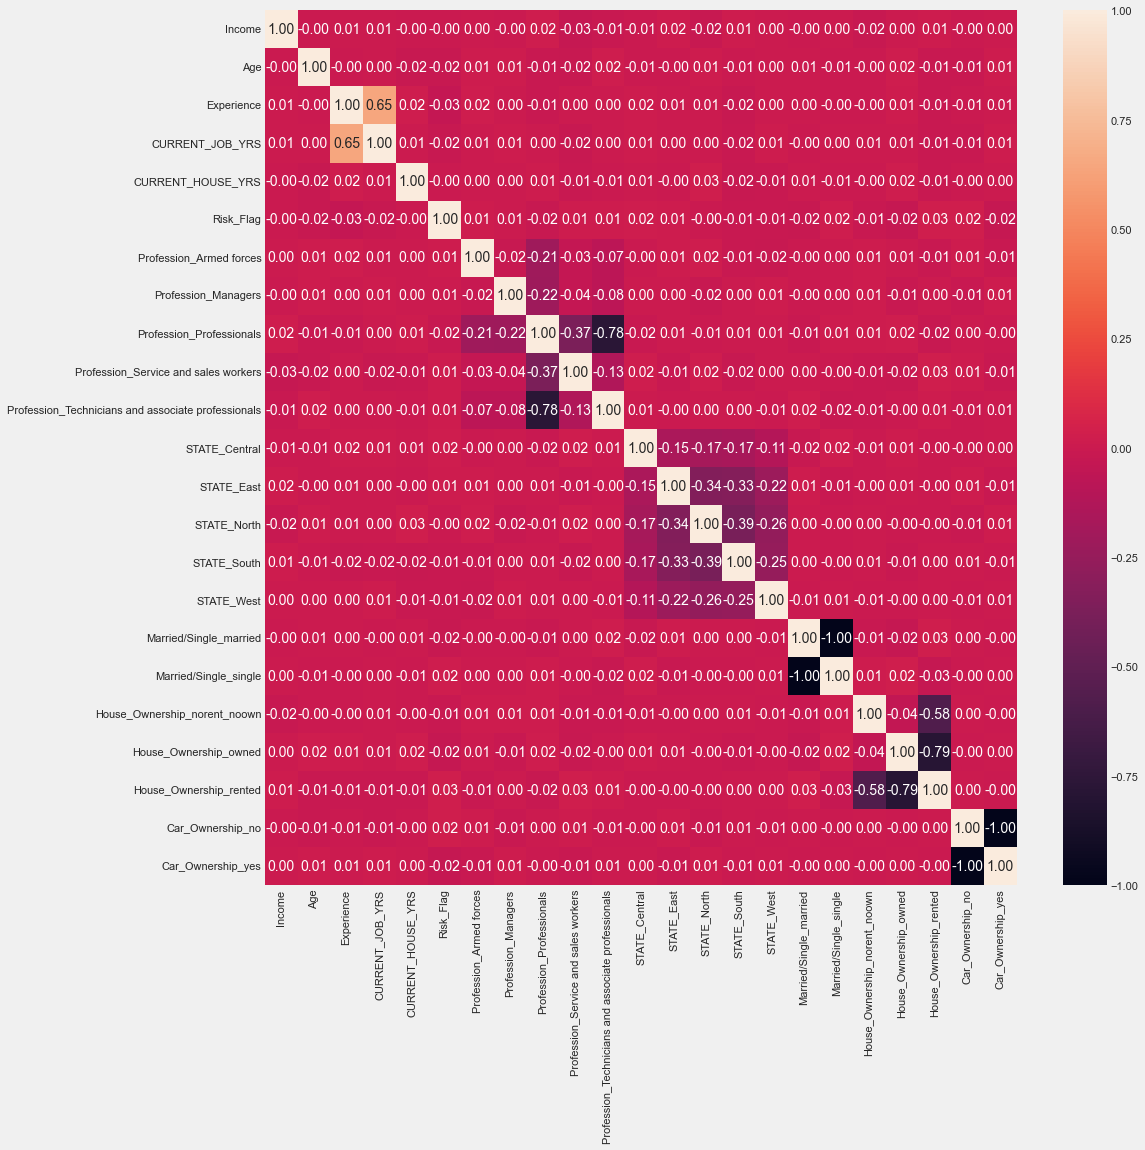

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_pre.corr(), annot=True, fmt = ".2f")

## Feature Enginering (Profession & State)

Data Asli

In [ ]:
data_hahahihi = data
#Simplifikasi dari kolom profesi.
data_hahahihi['Profession'].replace('Air_traffic_controller','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Analyst','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Architect','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Army_officer','Armed forces', inplace=True)
data_hahahihi['Profession'].replace('Artist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Aviator','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Biomedical_Engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Chartered_Accountant','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Chef','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Chemical_engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Civil_engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Civil_servant','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Comedian','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Computer_hardware_engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Computer_operator','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Consultant','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Dentist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Design_Engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Designer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Drafter','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Economist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Fashion_Designer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Financial_Analyst','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Firefighter','Service and sales workers', inplace=True)
data_hahahihi['Profession'].replace('Flight_attendant','Service and sales workers', inplace=True)
data_hahahihi['Profession'].replace('Geologist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Graphic_Designer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Hotel_Manager','Managers', inplace=True)
data_hahahihi['Profession'].replace('Industrial_Engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Lawyer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Librarian','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Magistrate','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Mechanical_engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Microbiologist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Official','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Petroleum_Engineer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Physician','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Police_officer','Service and sales workers', inplace=True)
data_hahahihi['Profession'].replace('Politician','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Psychologist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Scientist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Secretary','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Software_Developer','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Statistician','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Surgeon','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Surveyor','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Technical_writer','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Technician','Technicians and associate professionals', inplace=True)
data_hahahihi['Profession'].replace('Technology_specialist','Professionals', inplace=True)
data_hahahihi['Profession'].replace('Web_designer','Professionals', inplace=True)


#Simplifikasi dari kolom State
data_hahahihi['STATE'].replace('Andhra_Pradesh','South', inplace=True)
data_hahahihi['STATE'].replace('Assam','North', inplace=True)
data_hahahihi['STATE'].replace('Bihar','East', inplace=True)
data_hahahihi['STATE'].replace('Chandigarh','North', inplace=True)
data_hahahihi['STATE'].replace('Chhattisgarh','Central', inplace=True)
data_hahahihi['STATE'].replace('Delhi','North', inplace=True)
data_hahahihi['STATE'].replace('Gujarat','West', inplace=True)
data_hahahihi['STATE'].replace('Haryana','North', inplace=True)
data_hahahihi['STATE'].replace('Himachal_Pradesh','North', inplace=True)
data_hahahihi['STATE'].replace('Jammu_and_Kashmir','North', inplace=True)
data_hahahihi['STATE'].replace('Jharkhand','East', inplace=True)
data_hahahihi['STATE'].replace('Karnataka','South', inplace=True)
data_hahahihi['STATE'].replace('Kerala','South', inplace=True)
data_hahahihi['STATE'].replace('Madhya_Pradesh','Central', inplace=True)
data_hahahihi['STATE'].replace('Maharashtra','West', inplace=True)
data_hahahihi['STATE'].replace('Manipur','North', inplace=True)
data_hahahihi['STATE'].replace('Mizoram','North', inplace=True)
data_hahahihi['STATE'].replace('Odisha','East', inplace=True)
data_hahahihi['STATE'].replace('Puducherry','South', inplace=True)
data_hahahihi['STATE'].replace('Punjab','North', inplace=True)
data_hahahihi['STATE'].replace('Rajasthan','North', inplace=True)
data_hahahihi['STATE'].replace('Sikkim','North', inplace=True)
data_hahahihi['STATE'].replace('Tamil_Nadu','South', inplace=True)
data_hahahihi['STATE'].replace('Telangana','South', inplace=True)
data_hahahihi['STATE'].replace('Tripura','North', inplace=True)
data_hahahihi['STATE'].replace('Uttar_Pradesh','North', inplace=True)
data_hahahihi['STATE'].replace('Uttar_Pradesh[5]','North', inplace=True)
data_hahahihi['STATE'].replace('Uttarakhand','North', inplace=True)
data_hahahihi['STATE'].replace('West_Bengal','East', inplace=True)
data_hahahihi

Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership                               Profession  \
0                 no                            Professionals   
1                 no                            Professionals   
2                 no  Technicians and associate professionals   
3                yes                            Professionals   
4                 no  Technicians and associate professionals   
...              ...                                      ...   
251995            no                            Professionals   
251996            no                             Armed forces   
251997            no                            Professionals   
251998            no                            Professionals   
251999            no                            Professionals   

                       CITY    STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0                      Rewa  Central                3                 13   
1                  Parbhani     West                9                 13   
2                 Alappuzha    South                4                 10   
3               Bhubaneswar     East                2                 12   
4       Tiruchirappalli[10]    South                3                 14   
...                     ...      ...              ...                ...   
251995              Kolkata     East                6                 11   
251996                 Rewa  Central                6                 11   
251997      Kalyan-Dombivli     West                7                 12   
251998          Pondicherry    South                0                 10   
251999                Avadi    South                7                 11   

        Risk_Flag  
0               0  
1               0  
2               0  
3               1  
4               1  
...           ...  
251995          0  
251996          0  
251997          0  
251998          0  
251999          0  

[252000 rows x 13 columns]

Data Non Angka (Profession)

profession  jumlah
2                            Professionals  174134
4  Technicians and associate professionals   53357
3                Service and sales workers   14670
1                                 Managers    5178
0                             Armed forces    4661

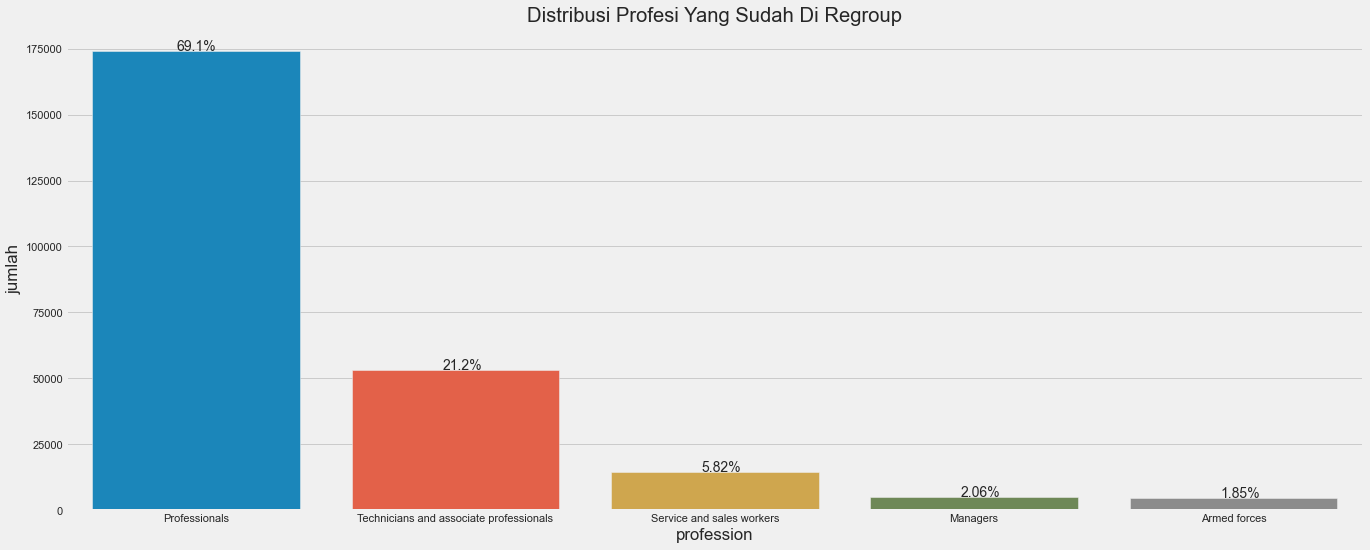

In [ ]:
data_pg_profesi = data_hahahihi.groupby(['Profession']).agg({'Id': ['count']}).reset_index()
data_pg_profesi.columns = ['profession', 'jumlah']
data_pg_profesi = data_pg_profesi.sort_values('jumlah', ascending=False)
sns.barplot(x = 'profession', y = 'jumlah', data=data_pg_profesi)
plt.title('Distribusi Profesi Yang Sudah Di Regroup')
plt.text(x=-0.075, y = 174135, s= '69.1%')
plt.text(x=0.95, y = 53358, s= '21.2%')
plt.text(x=1.95, y = 14671, s= '5.82%')
plt.text(x=2.95, y = 5179, s= '2.06%')
plt.text(x=3.95, y = 4662, s= '1.85%')
data_pg_profesi

Profession  Risk_Flag  jumlah  jumlah_orang
4                            Professionals          0  153525        174134
5                            Professionals          1   20609        174134
8  Technicians and associate professionals          0   46452         53357
9  Technicians and associate professionals          1    6905         53357
6                Service and sales workers          0   12598         14670
7                Service and sales workers          1    2072         14670
2                                 Managers          0    4477          5178
3                                 Managers          1     701          5178
0                             Armed forces          0    3952          4661
1                             Armed forces          1     709          4661

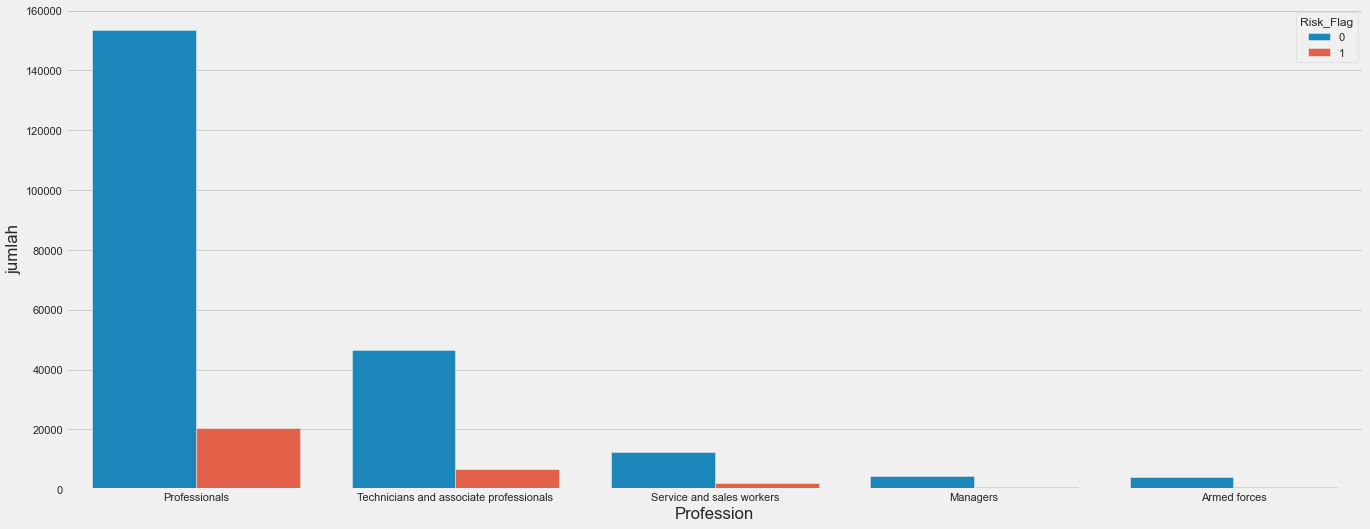

In [ ]:
pg1 = data_hahahihi.groupby(['Profession', 'Risk_Flag']).agg({'Profession': ['count']}).reset_index()
pg1.columns = ['Profession', 'Risk_Flag', 'jumlah']
pg1['jumlah_orang'] = pg1.groupby(['Profession'])['jumlah'].transform(sum)
pg = pg1.sort_values('jumlah_orang', ascending=False).head(20)
sns.barplot(x='Profession', y='jumlah', data=pg, hue='Risk_Flag')
pg

Data Non Angka (State)

state  jumlah
2    North   71737
3    South   68451
1     East   56886
4     West   36970
0  Central   17956

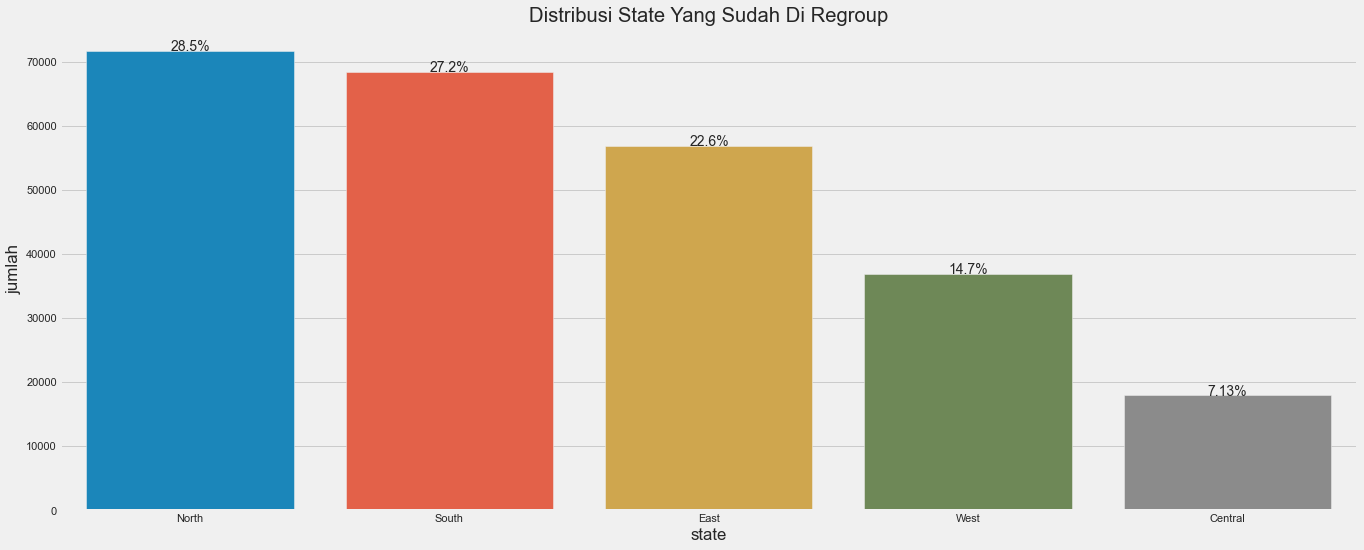

In [ ]:
data_sg_profesi = data_hahahihi.groupby(['STATE']).agg({'Id': ['count']}).reset_index()
data_sg_profesi.columns = ['state', 'jumlah']
data_sg_profesi = data_sg_profesi.sort_values('jumlah', ascending=False)
sns.barplot(x = 'state', y = 'jumlah', data=data_sg_profesi)
plt.title('Distribusi State Yang Sudah Di Regroup')
plt.text(x=-0.075, y = 71737, s= '28.5%')
plt.text(x=0.925, y = 68451, s= '27.2%')
plt.text(x=1.925, y = 56886, s= '22.6%')
plt.text(x=2.925, y = 36970, s= '14.7%')
plt.text(x=3.925, y = 17956, s= '7.13%')
data_sg_profesi

STATE  Risk_Flag  jumlah  jumlah_orang
4    North          0   63067         71737
5    North          1    8670         71737
6    South          0   60505         68451
7    South          1    7946         68451
2     East          0   49435         56886
3     East          1    7451         56886
8     West          0   32732         36970
9     West          1    4238         36970
0  Central          0   15265         17956
1  Central          1    2691         17956

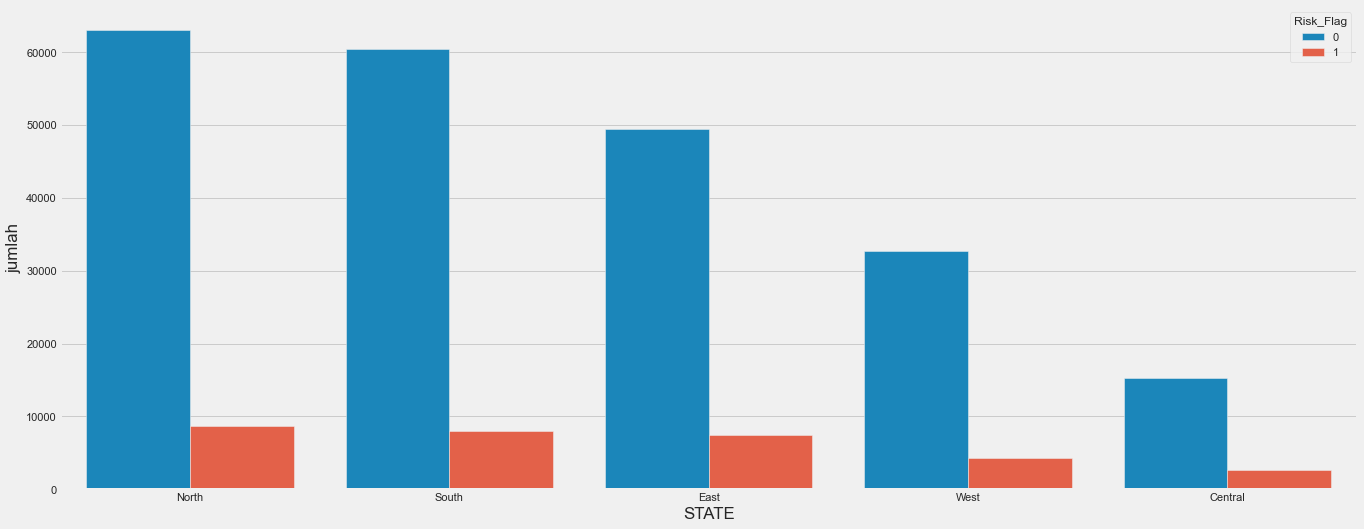

In [ ]:
sg1 = data_hahahihi.groupby(['STATE', 'Risk_Flag']).agg({'Id': ['count']}).reset_index()
sg1.columns = ['STATE', 'Risk_Flag', 'jumlah']
sg1['jumlah_orang'] = sg1.groupby(['STATE'])['jumlah'].transform(sum)
sg = sg1.sort_values('jumlah_orang', ascending=False)
sns.barplot(x='STATE', y='jumlah', data=sg, hue='Risk_Flag')
sg

# Model Learning

## Fokus ke Normalisasi Data

In [ ]:
x = normalisasi_data.drop(labels = ['CURRENT_JOB_YRS'], axis = 1)
y = risk

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)
 
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
    sns.distplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", hist=False)
    plt.show()
    
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

### Logistic Regression

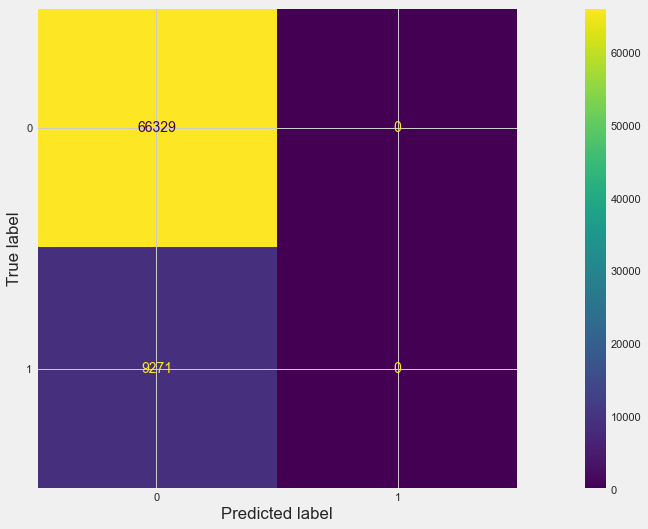



Accuracy:  0.8773677248677249
Precision:  0.0
Recall:  0.0
F1:  0.0
AUC:  0.5578686640542796


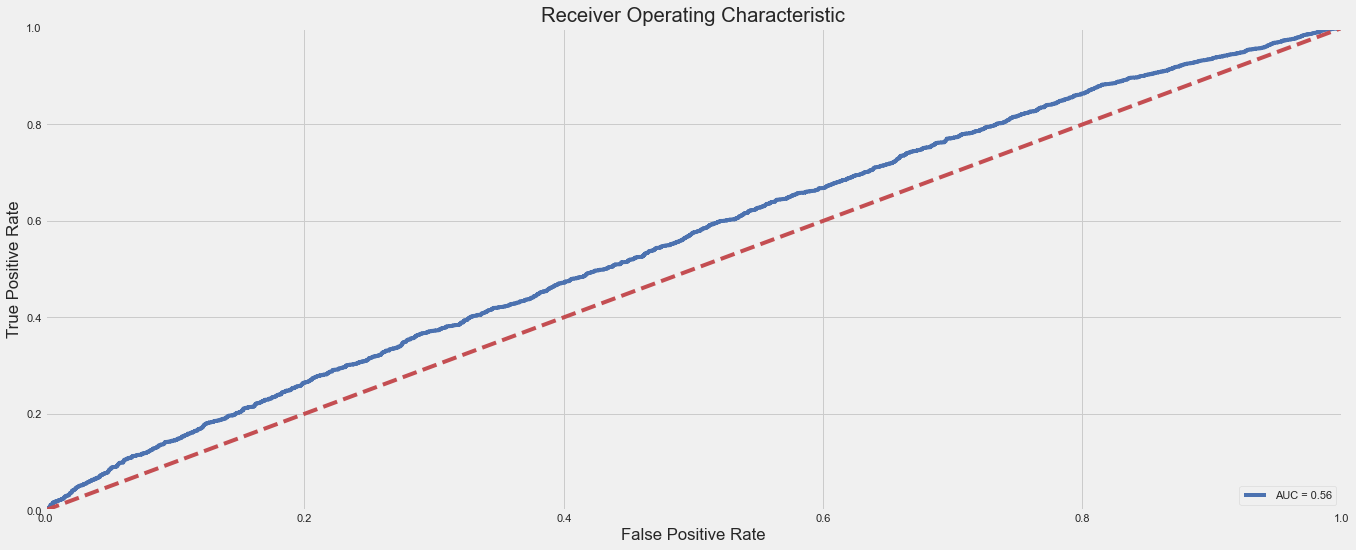

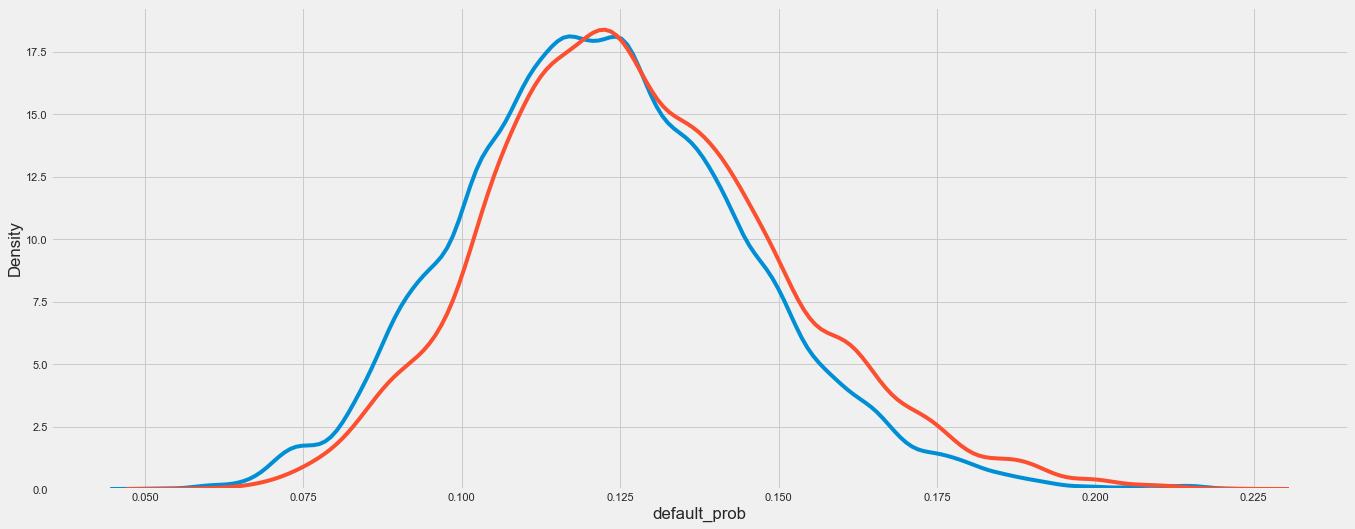

true_class  predicted_class
0           0                  1.0
1           0                  1.0
Name: predicted_class, dtype: float64


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
eval_model(logistic_model, x_test, y_test)

### Random Forest

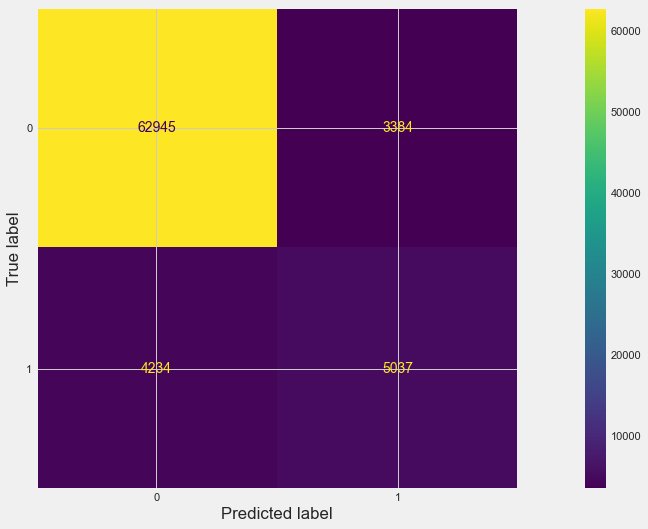



Accuracy:  0.8992328042328043
Precision:  0.5981474884218027
Recall:  0.5433070866141733
F1:  0.569409902780918
AUC:  0.9371358572199362


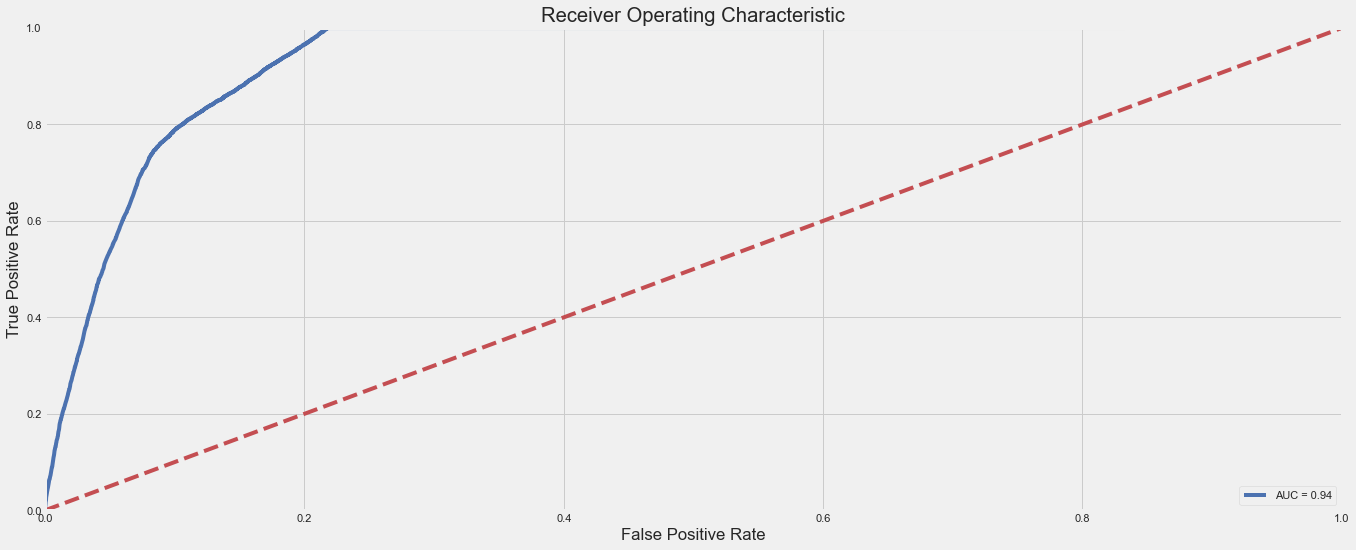

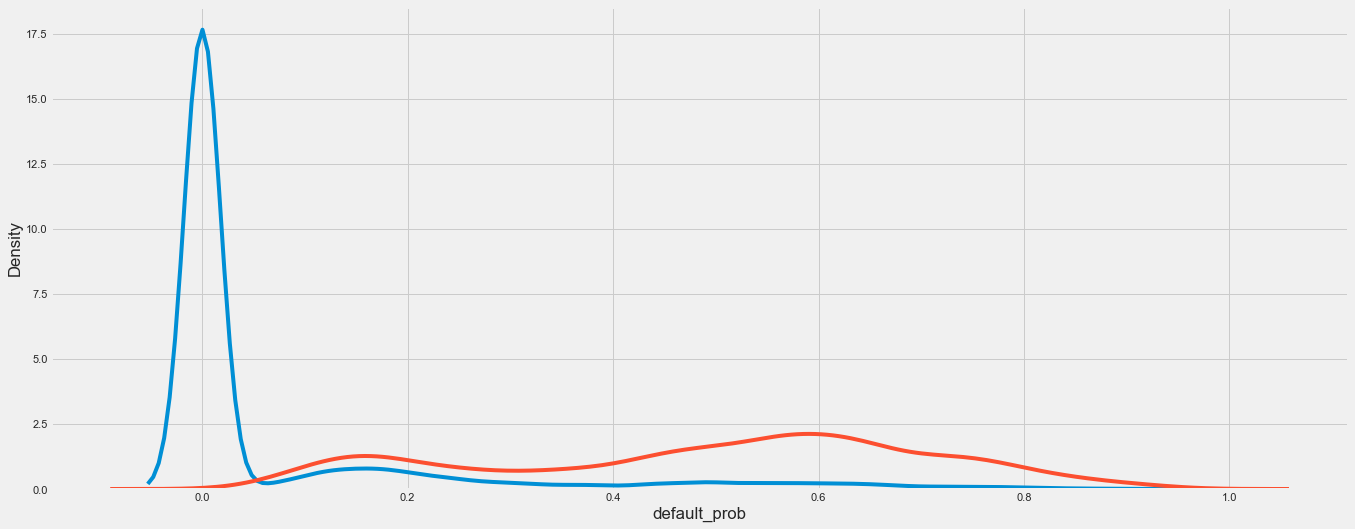

true_class  predicted_class
0           0                  0.948982
            1                  0.051018
1           1                  0.543307
            0                  0.456693
Name: predicted_class, dtype: float64


In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
eval_model(rfc_model, x_test, y_test)

### K-Neighborhood

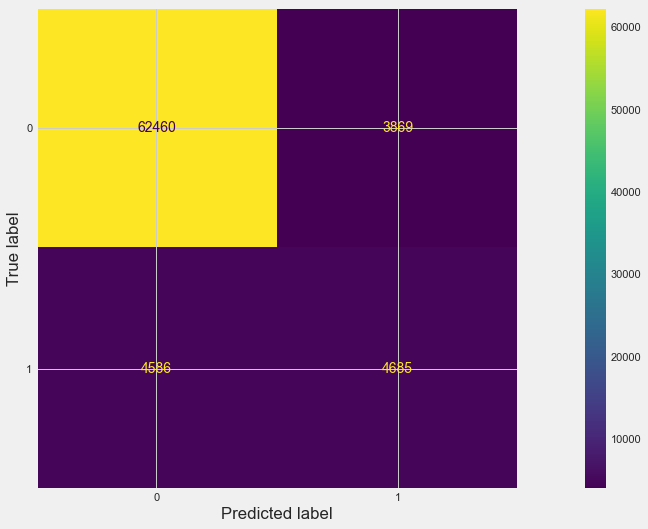



Accuracy:  0.8881613756613757
Precision:  0.5476969838671967
Recall:  0.5053392298565419
F1:  0.5256661991584853
AUC:  0.8753174075424632


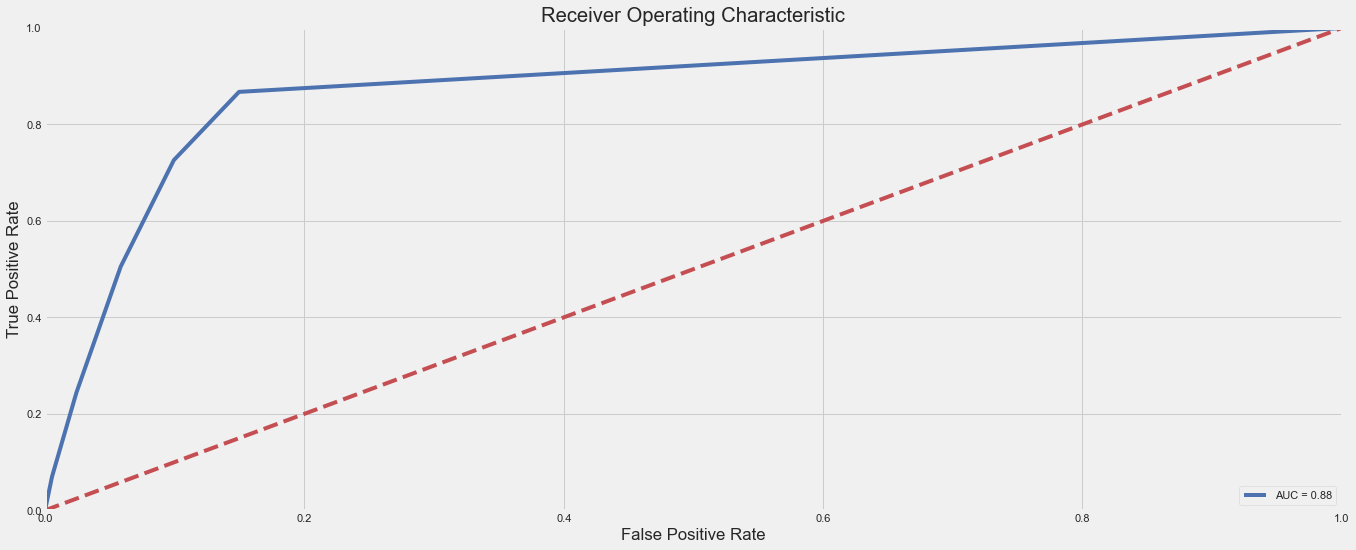

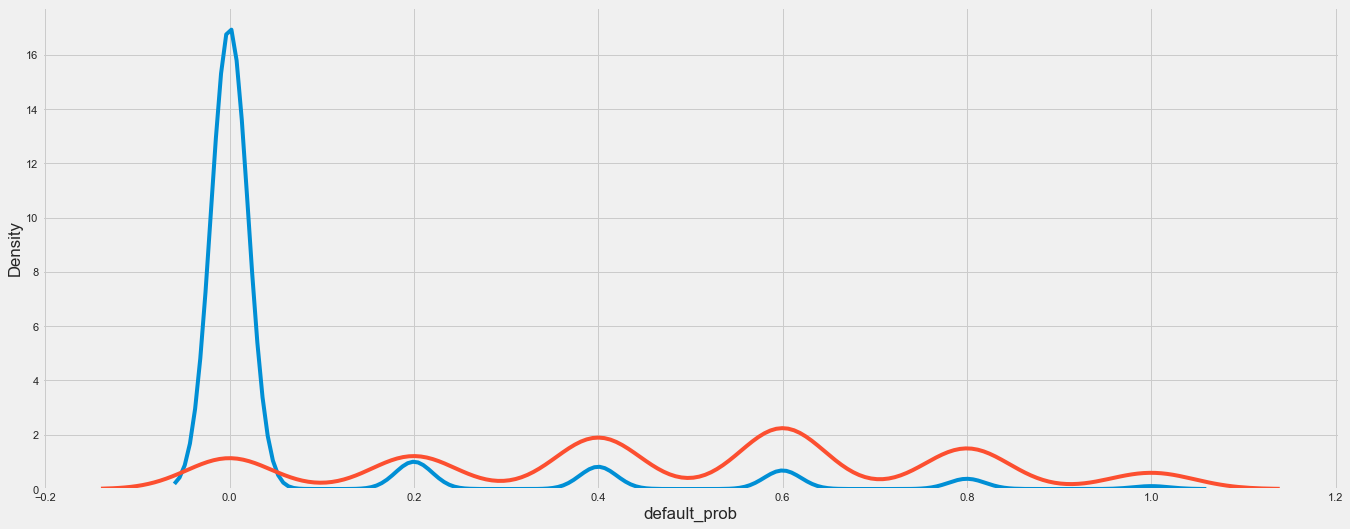

true_class  predicted_class
0           0                  0.941670
            1                  0.058330
1           1                  0.505339
            0                  0.494661
Name: predicted_class, dtype: float64


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
eval_model(knn, x_test, y_test)

### Decision Tree

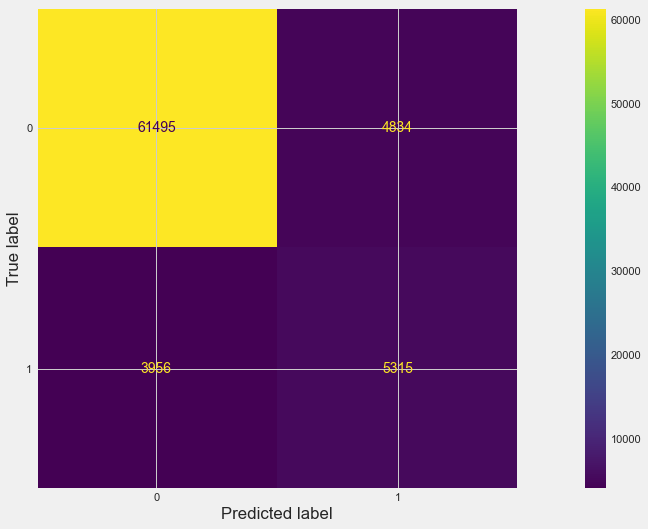



Accuracy:  0.8837301587301587
Precision:  0.5236969159523106
Recall:  0.573293064394348
F1:  0.5473738414006178
AUC:  0.8515794629016117


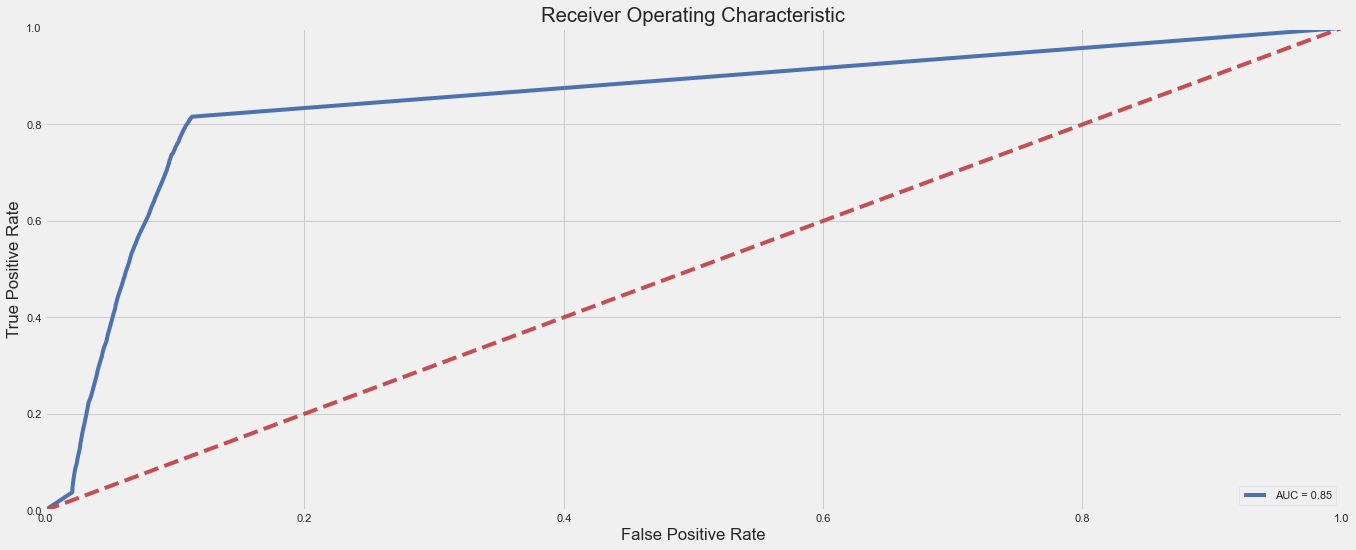

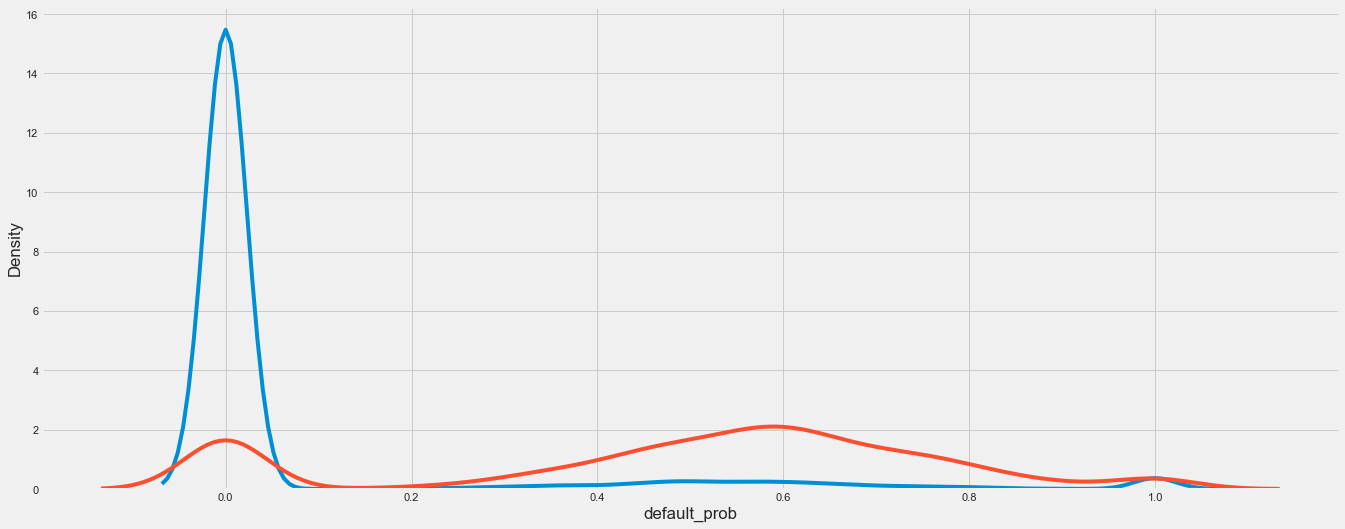

true_class  predicted_class
0           0                  0.927121
            1                  0.072879
1           1                  0.573293
            0                  0.426707
Name: predicted_class, dtype: float64


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
eval_model(dt, x_test, y_test)

### Ada Boost

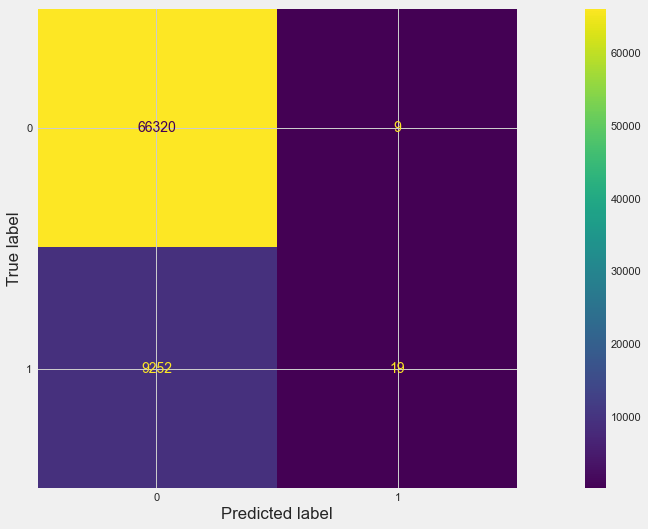



Accuracy:  0.8775
Precision:  0.6785714285714286
Recall:  0.002049401359076691
F1:  0.004086460909775245
AUC:  0.5848249687981025


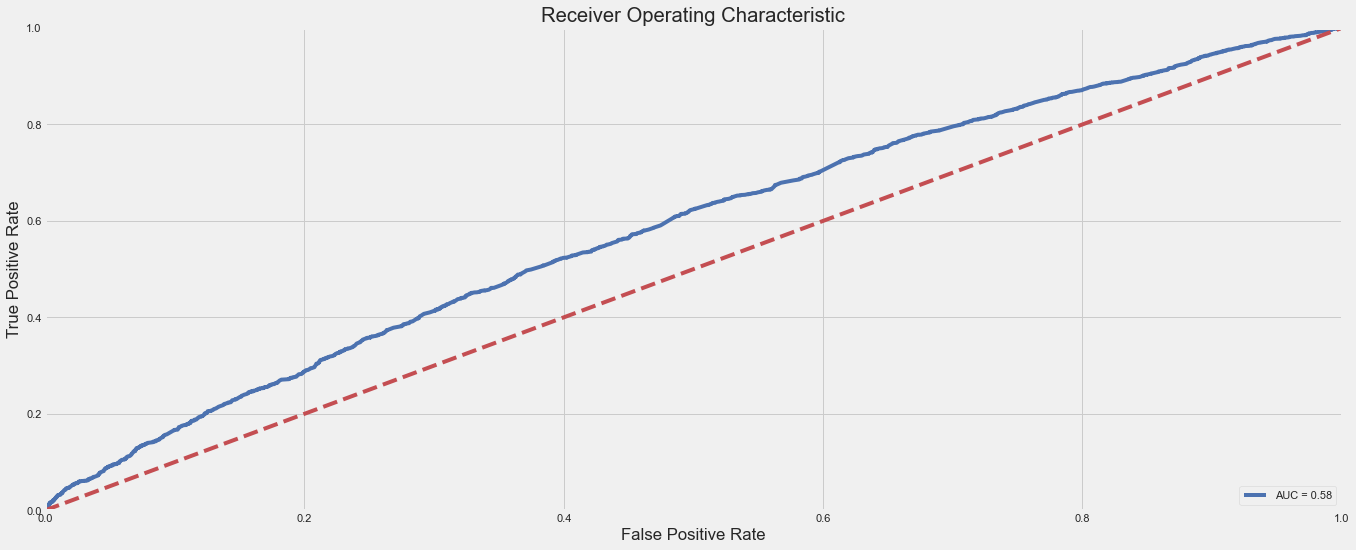

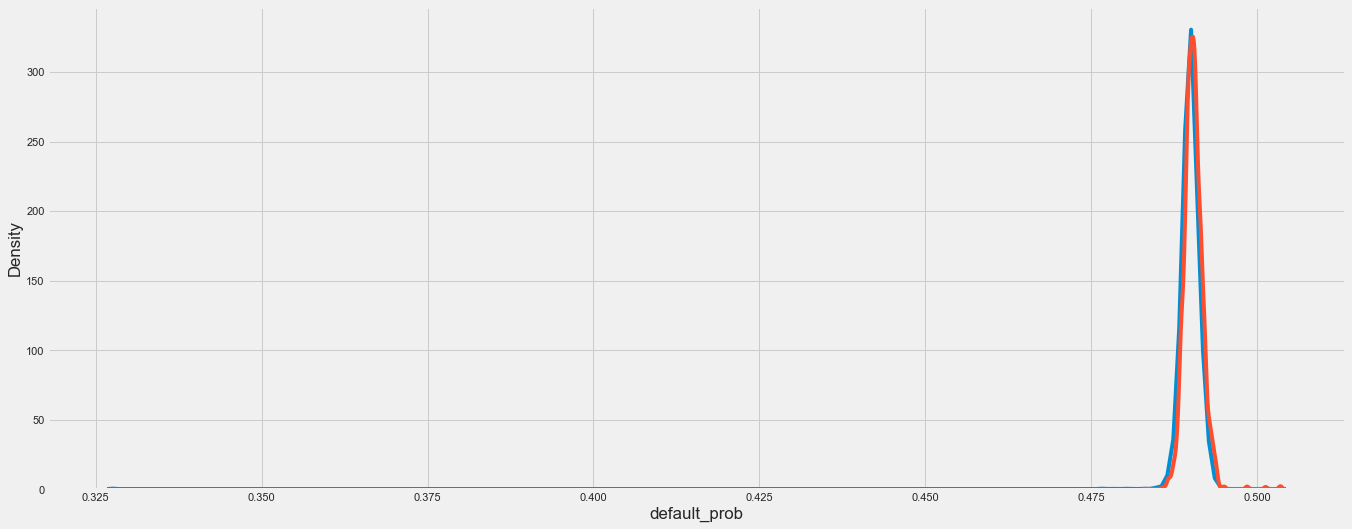

true_class  predicted_class
0           0                  0.999864
            1                  0.000136
1           0                  0.997951
            1                  0.002049
Name: predicted_class, dtype: float64


In [ ]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(x_train, y_train)
eval_model(ada, x_test, y_test)

### XGBoost

[16:12:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


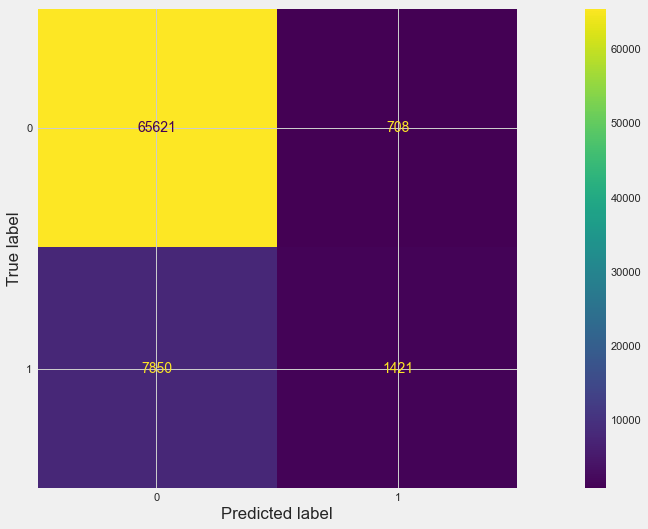



Accuracy:  0.8867989417989418
Precision:  0.6674495068107092
Recall:  0.15327364901305146
F1:  0.24929824561403513
AUC:  0.8679362746661967


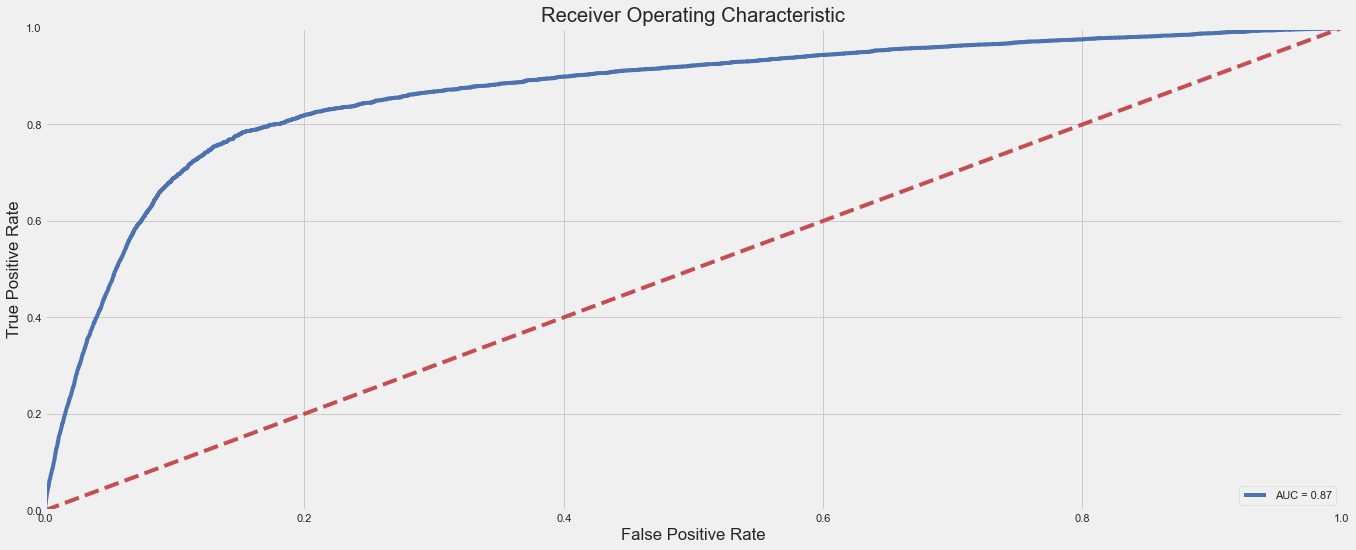

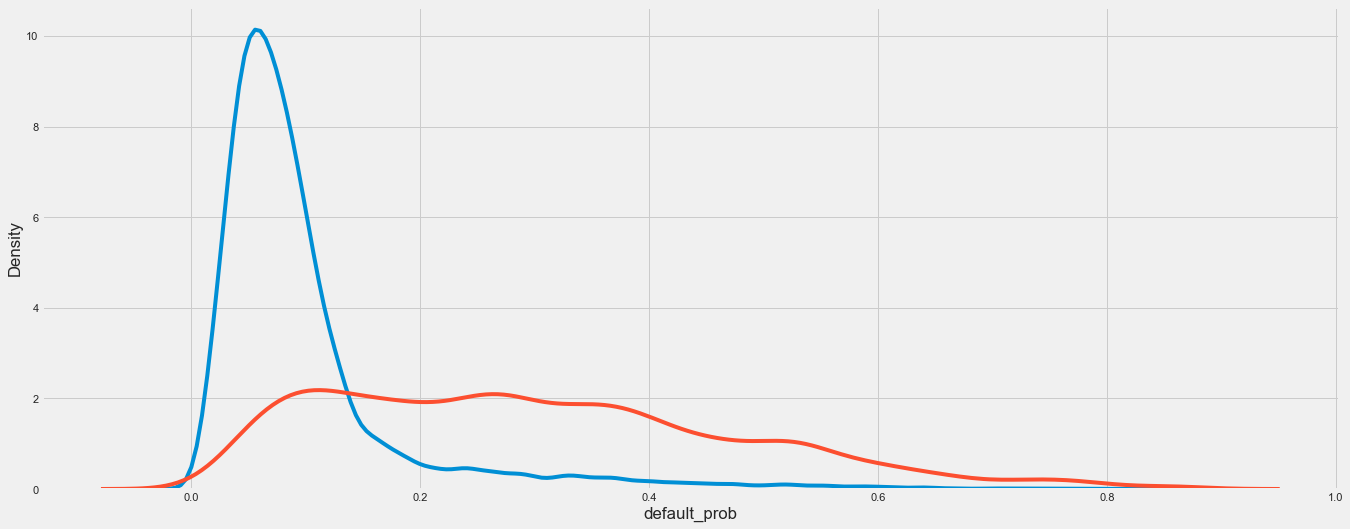

true_class  predicted_class
0           0                  0.989326
            1                  0.010674
1           0                  0.846726
            1                  0.153274
Name: predicted_class, dtype: float64


In [ ]:
xg = XGBClassifier(random_state=42)
xg.fit(x_train, y_train)
eval_model(xg, x_test, y_test)

## Fokus ke Data yang sudah menggunakan SMOTE 

In [ ]:
smote = SMOTE()
x_train_s, y_train_s = smote.fit_resample(x_train, y_train)

### Logistic Regression

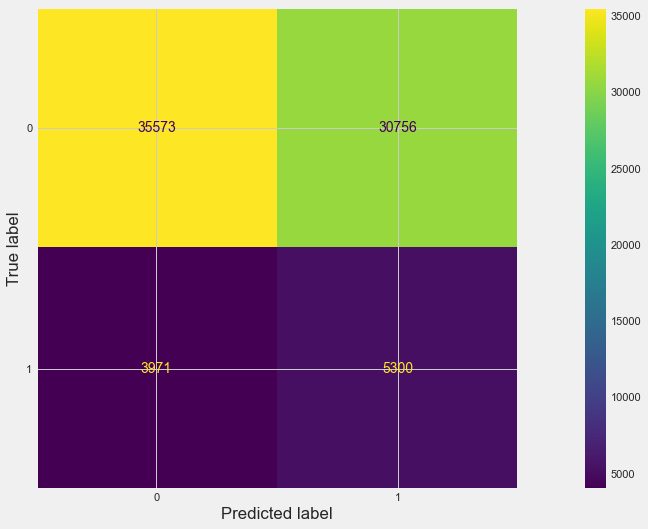



Accuracy:  0.5406481481481481
Precision:  0.14699356556467716
Recall:  0.5716751159529716
F1:  0.2338562004985991
AUC:  0.5757472598062003


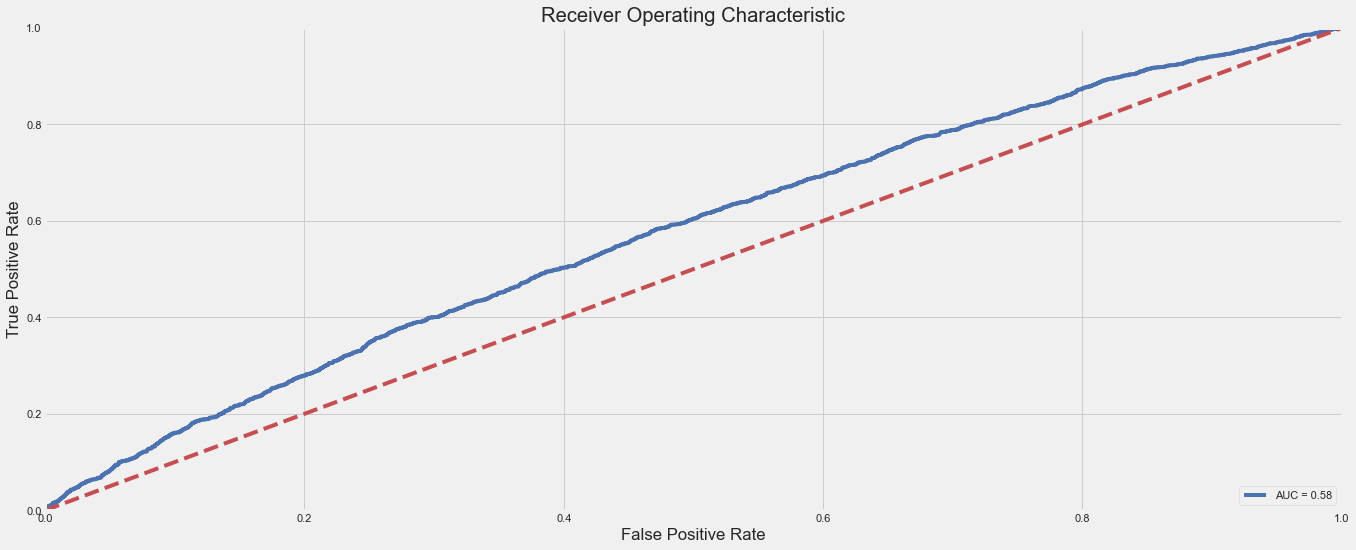

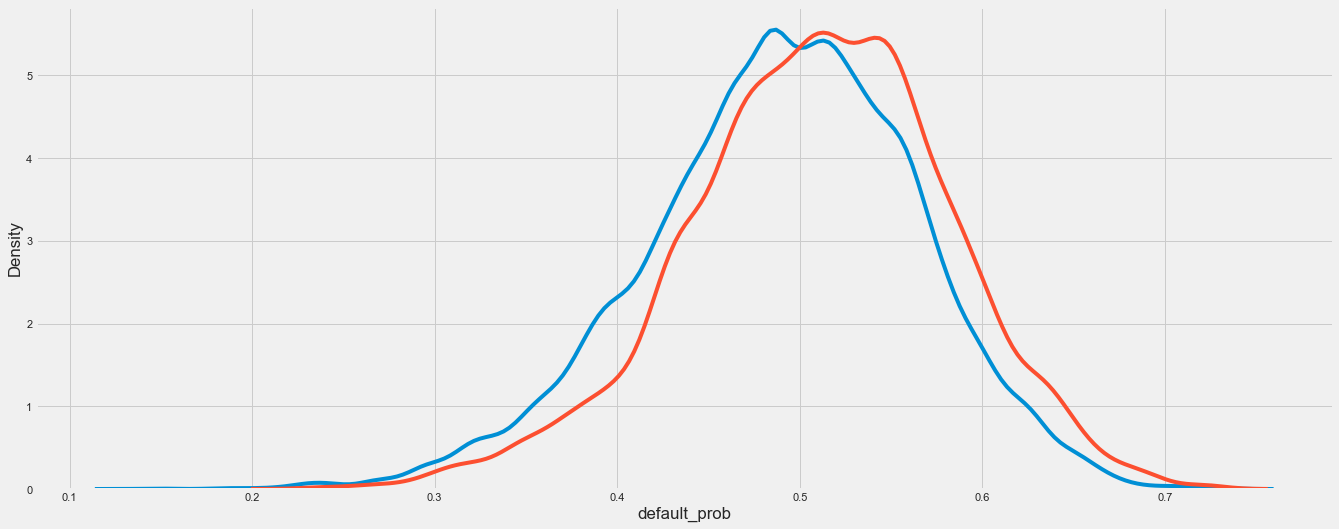

true_class  predicted_class
0           0                  0.536311
            1                  0.463689
1           1                  0.571675
            0                  0.428325
Name: predicted_class, dtype: float64


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_s, y_train_s)
eval_model(logistic_model, x_test, y_test)

### Random Forest

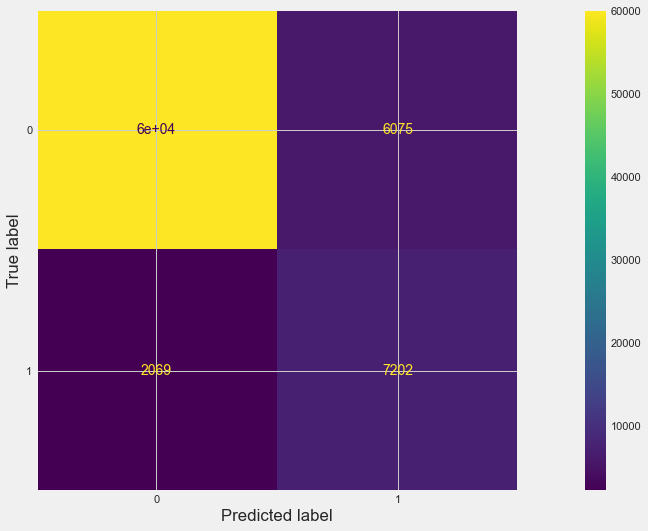



Accuracy:  0.8922751322751322
Precision:  0.5424418166754538
Recall:  0.7768309783194909
F1:  0.6388149725031044
AUC:  0.9375128898543108


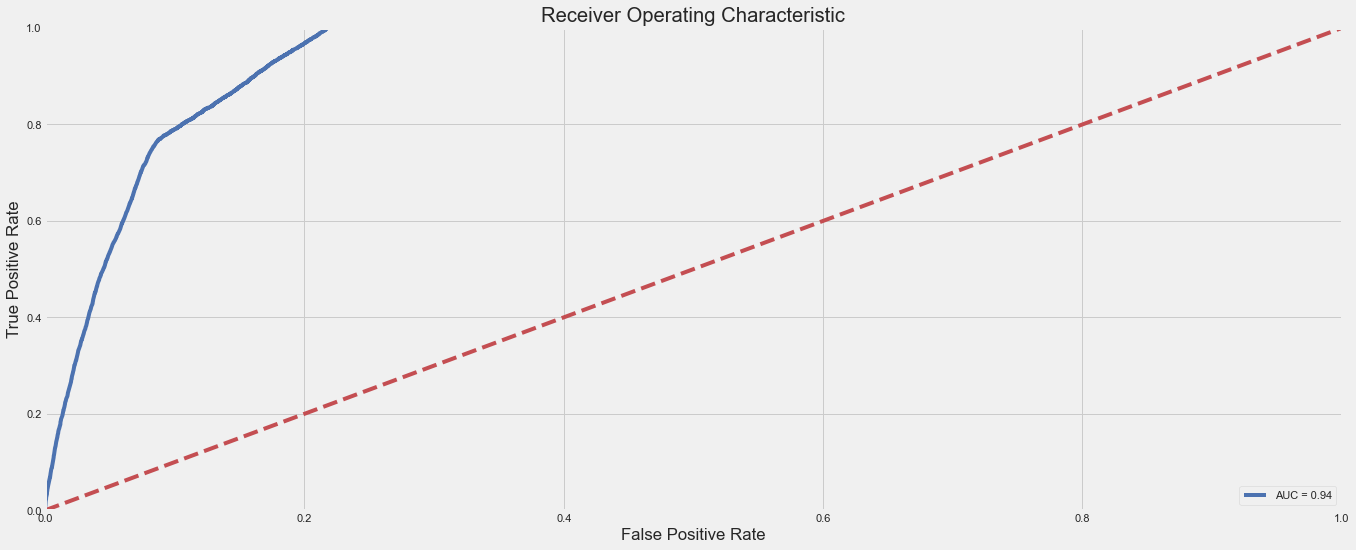

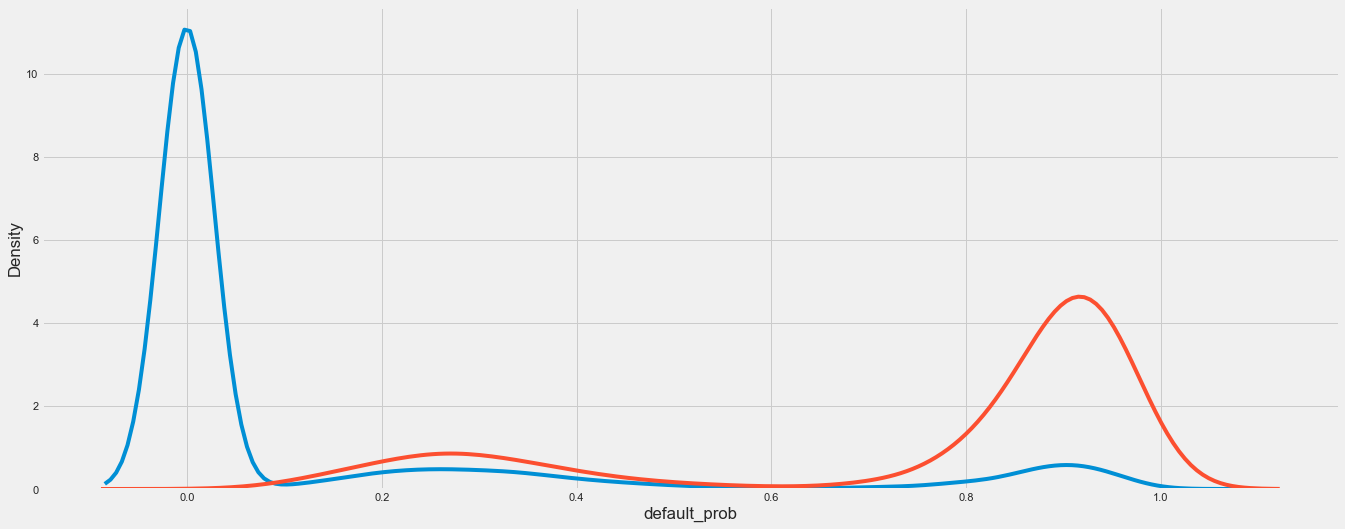

true_class  predicted_class
0           0                  0.908411
            1                  0.091589
1           1                  0.776831
            0                  0.223169
Name: predicted_class, dtype: float64


In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train_s, y_train_s)
eval_model(rfc_model, x_test, y_test)

### K-Neighborhood

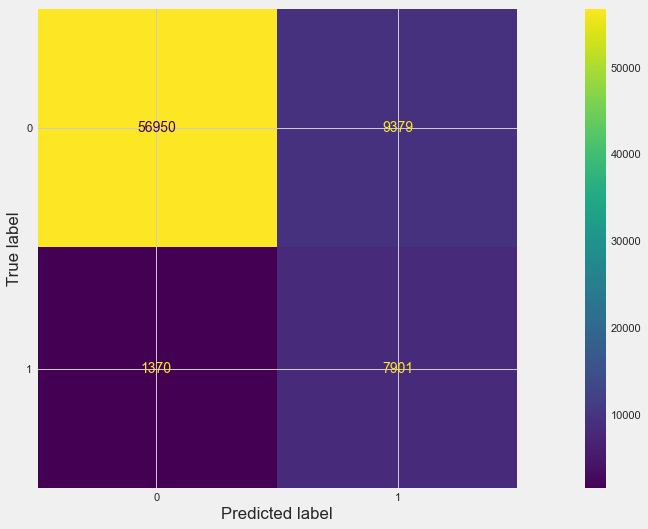



Accuracy:  0.8578174603174603
Precision:  0.4572337962962963
Recall:  0.8522273756876281
F1:  0.5951564912809311
AUC:  0.8823828873266826


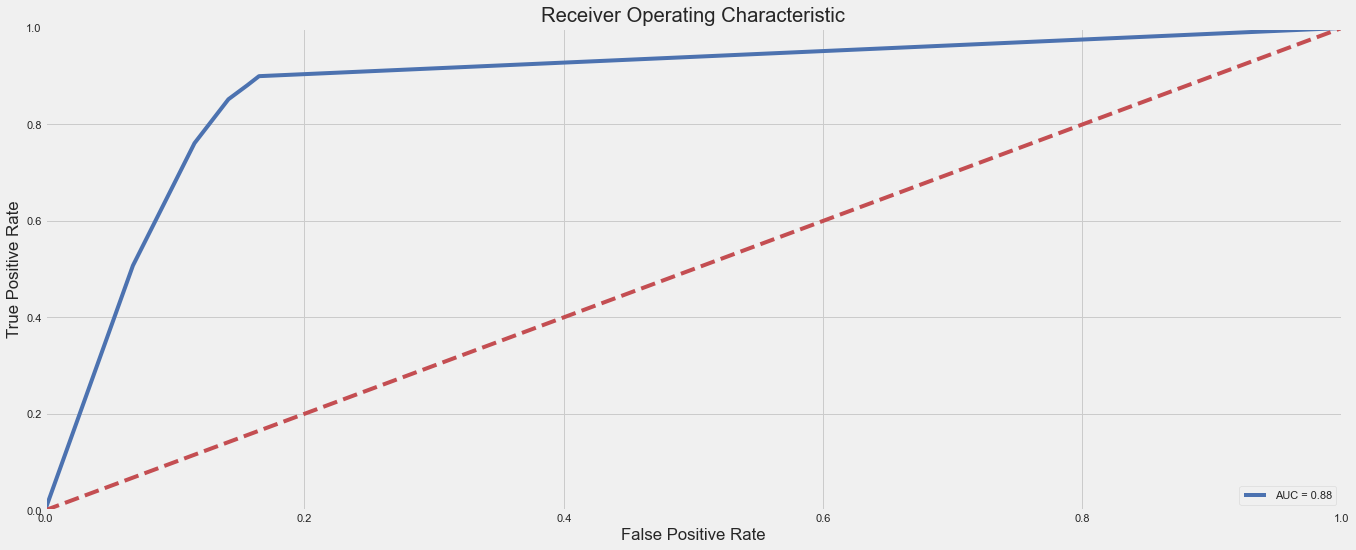

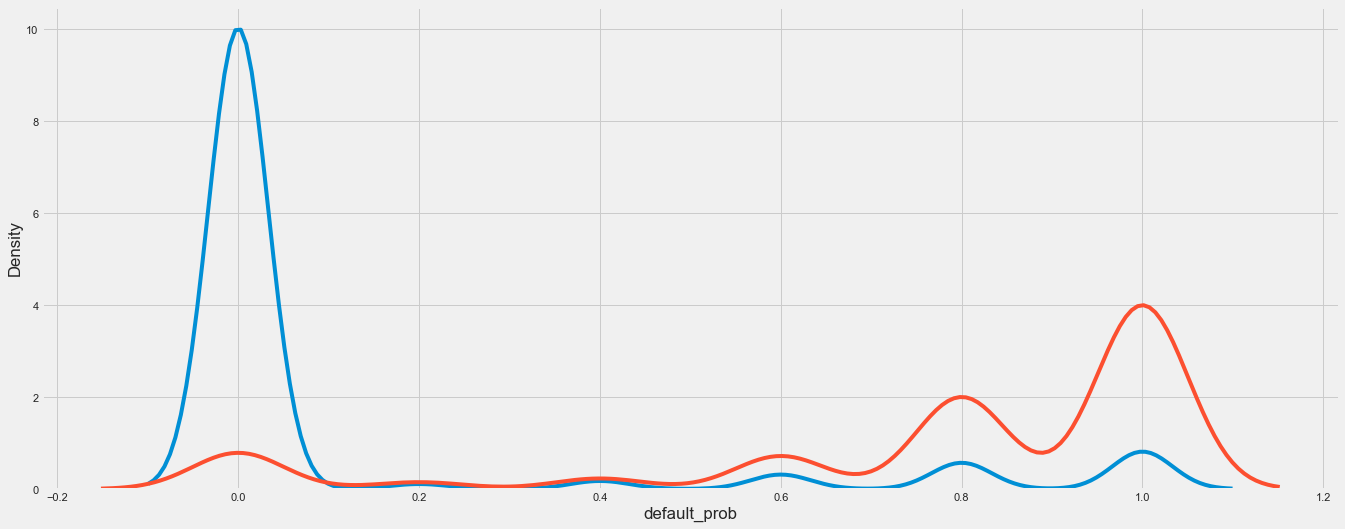

true_class  predicted_class
0           0                  0.858599
            1                  0.141401
1           1                  0.852227
            0                  0.147773
Name: predicted_class, dtype: float64


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_s, y_train_s)
eval_model(knn, x_test, y_test)

### Decision Tree

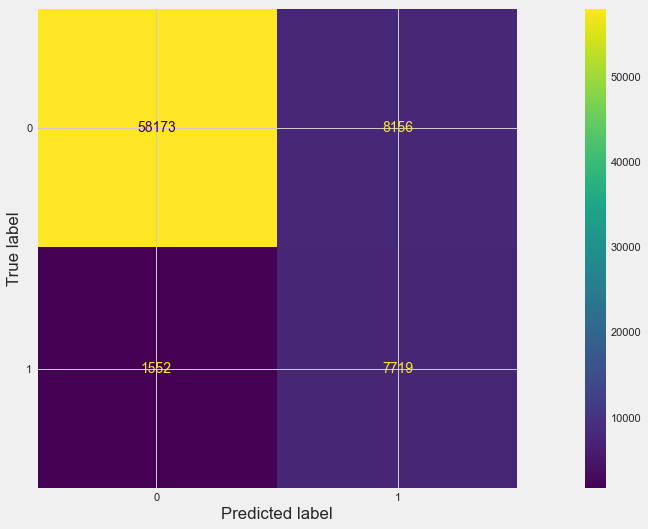



Accuracy:  0.8715873015873016
Precision:  0.48623622047244097
Recall:  0.8325962679322619
F1:  0.6139346218086376
AUC:  0.8521510563830741


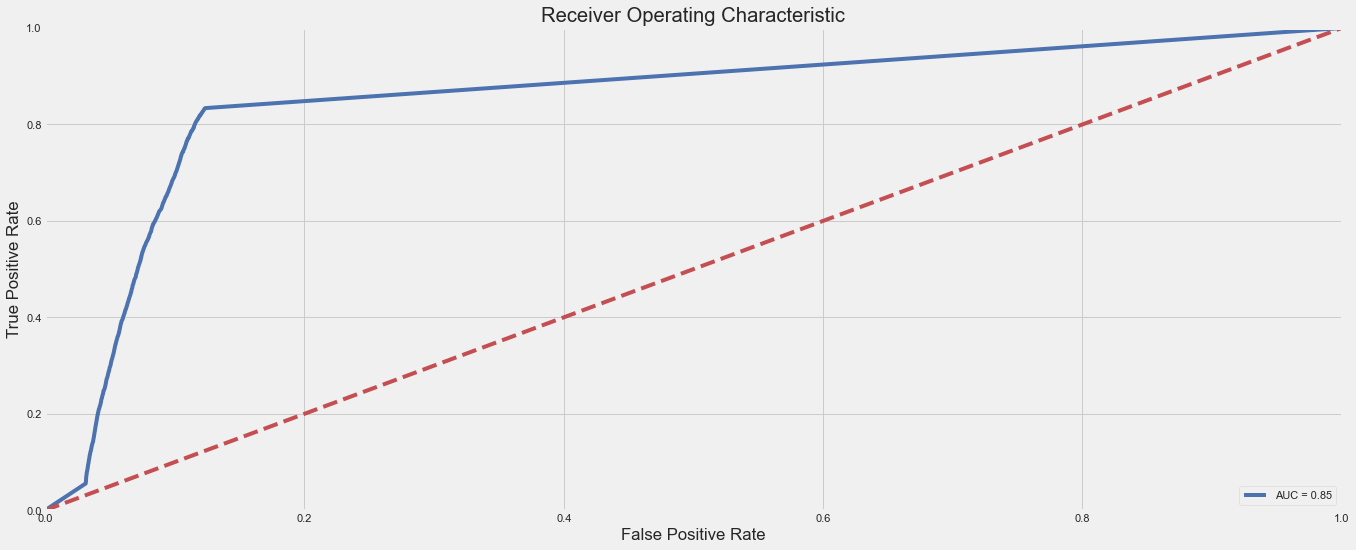

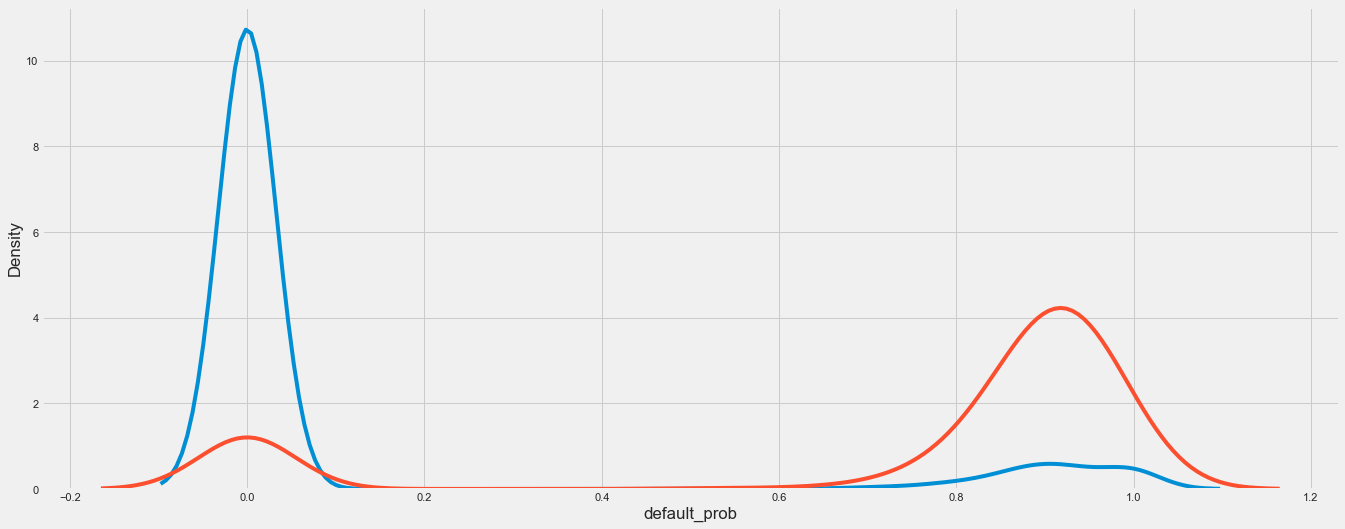

true_class  predicted_class
0           0                  0.877037
            1                  0.122963
1           1                  0.832596
            0                  0.167404
Name: predicted_class, dtype: float64


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train_s, y_train_s)
eval_model(dt, x_test, y_test)

### Ada Boost

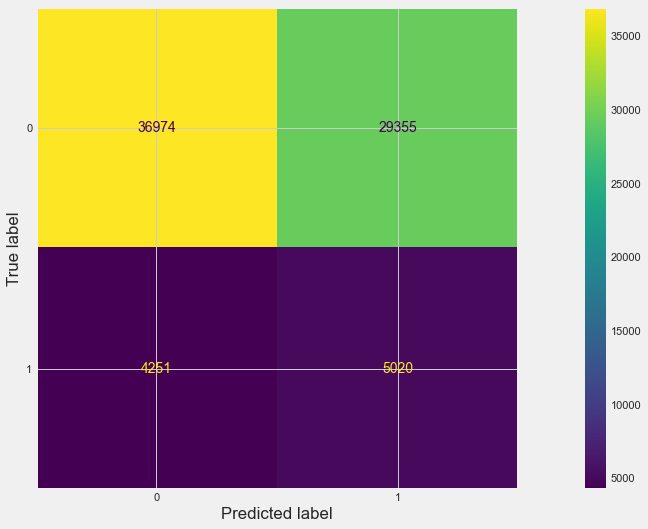



Accuracy:  0.5554761904761905
Precision:  0.14603636363636363
Recall:  0.5414734117139467
F1:  0.2300325344819686
AUC:  0.5779840635456924


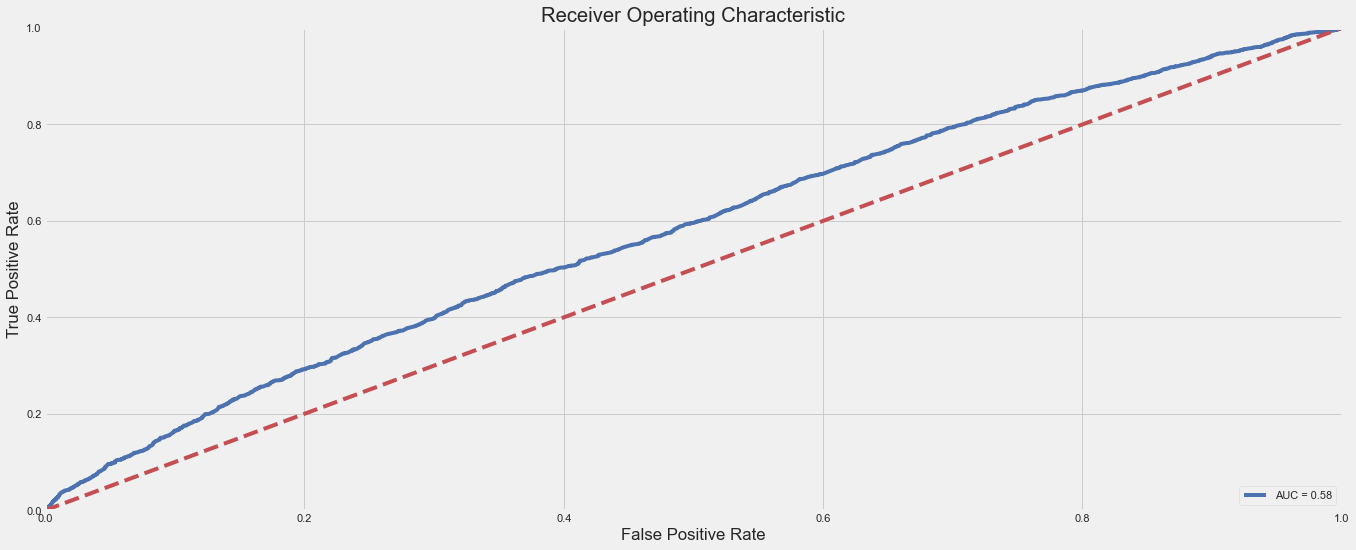

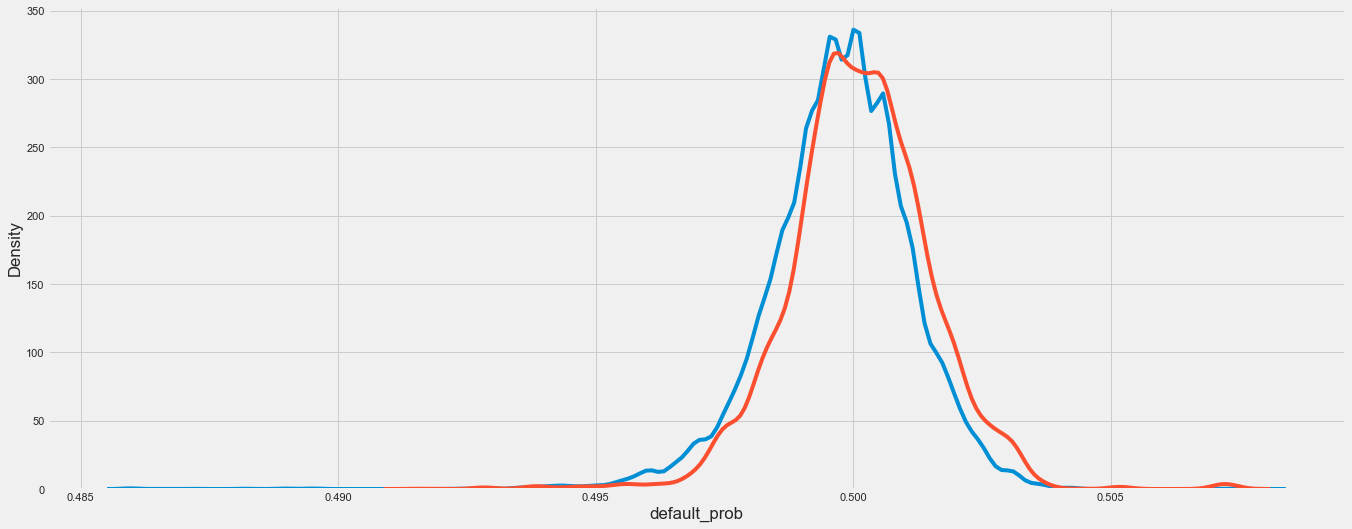

true_class  predicted_class
0           0                  0.557433
            1                  0.442567
1           1                  0.541473
            0                  0.458527
Name: predicted_class, dtype: float64


In [ ]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(x_train_s, y_train_s)
eval_model(ada, x_test, y_test)

### XGBoost

[16:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


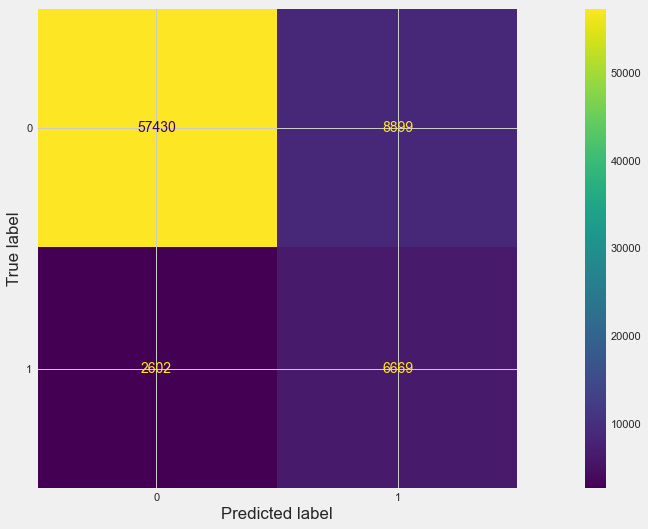



Accuracy:  0.8478703703703704
Precision:  0.4283787255909558
Recall:  0.7193398770359185
F1:  0.5369781392165546
AUC:  0.8537053843990983


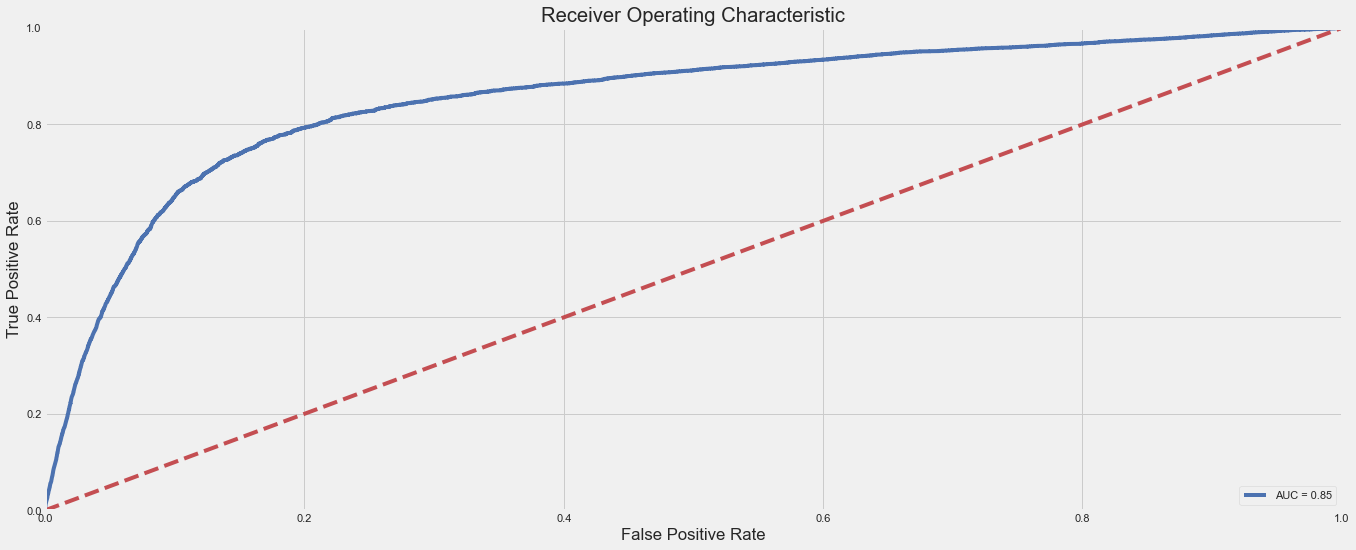

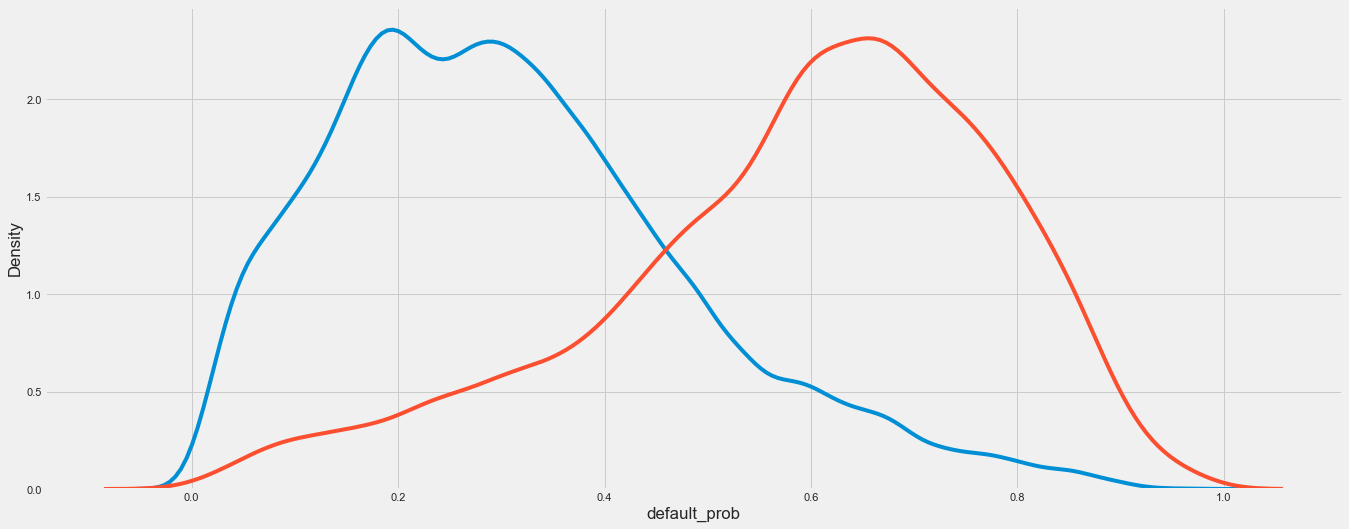

true_class  predicted_class
0           0                  0.865835
            1                  0.134165
1           1                  0.719340
            0                  0.280660
Name: predicted_class, dtype: float64


In [ ]:
xg = XGBClassifier(random_state=42)
xg.fit(x_train_s, y_train_s)
eval_model(xg, x_test, y_test)

Intinya penggunaan SMOTE membuat model lebih baik. Sekarang kita akan cek Overfitting.

## Cek Overfit Sebelum Tuning

### Logistic (Train)

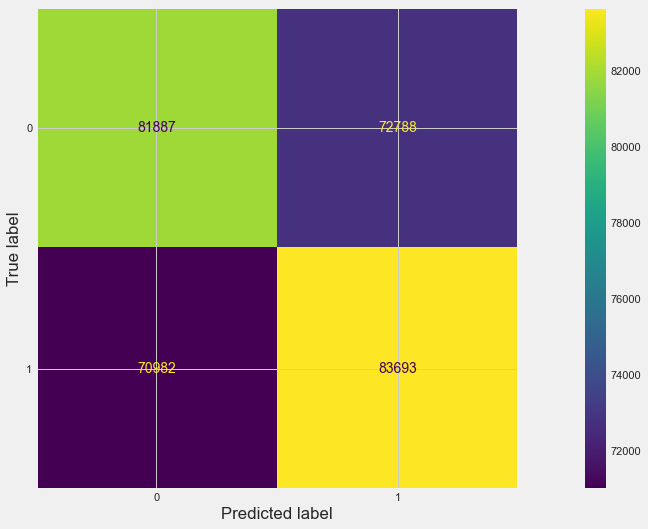



Accuracy:  0.5352513334410861
Precision:  0.5348444859120277
Recall:  0.5410893809600776
F1:  0.5379488102430936
AUC:  0.557125890323744


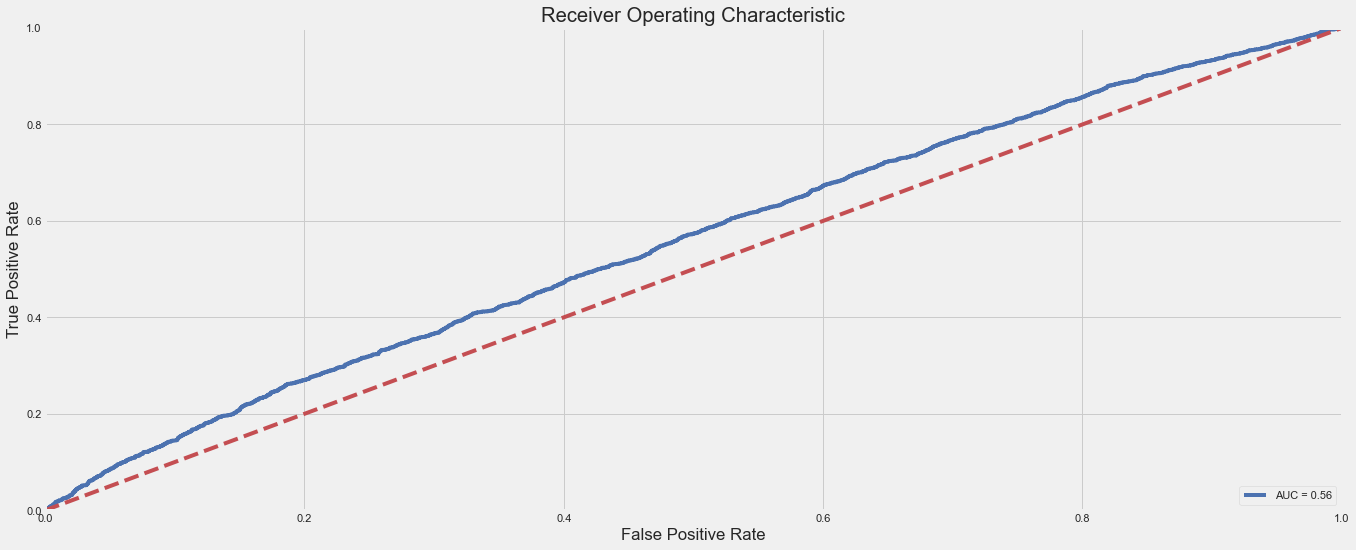

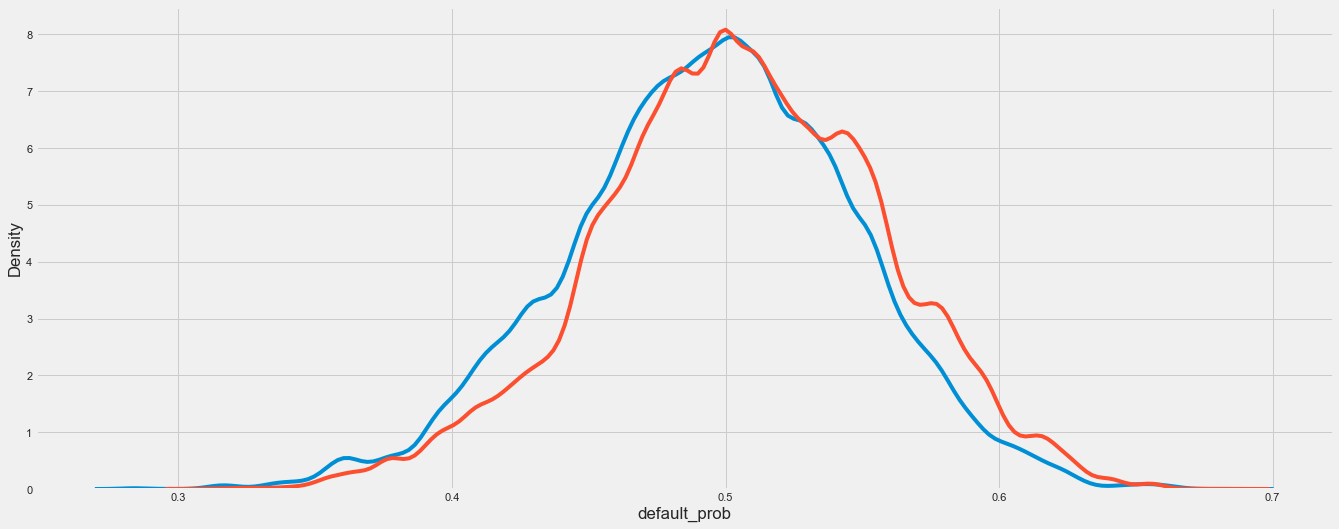

true_class  predicted_class
0           0                  0.529413
            1                  0.470587
1           1                  0.541089
            0                  0.458911
Name: predicted_class, dtype: float64


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_s, y_train_s)
eval_model(logistic_model, x_train_s, y_train_s)

### Random Forest( Train)

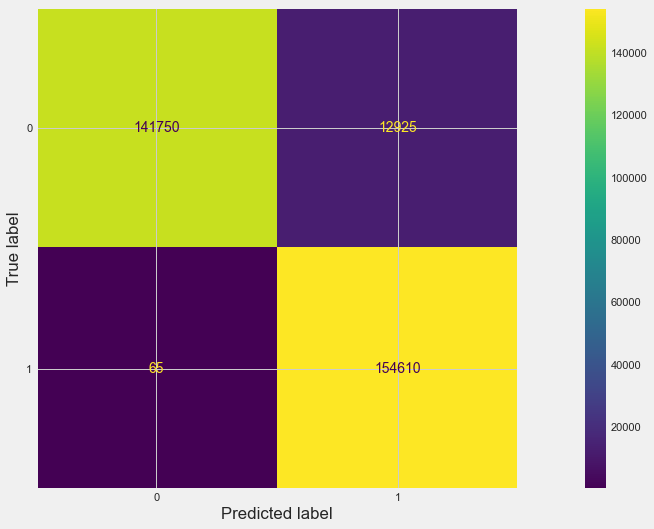



Accuracy:  0.9580087279780184
Precision:  0.9228519413853822
Recall:  0.9995797640213351
F1:  0.9596846776946713
AUC:  0.9745692325203429


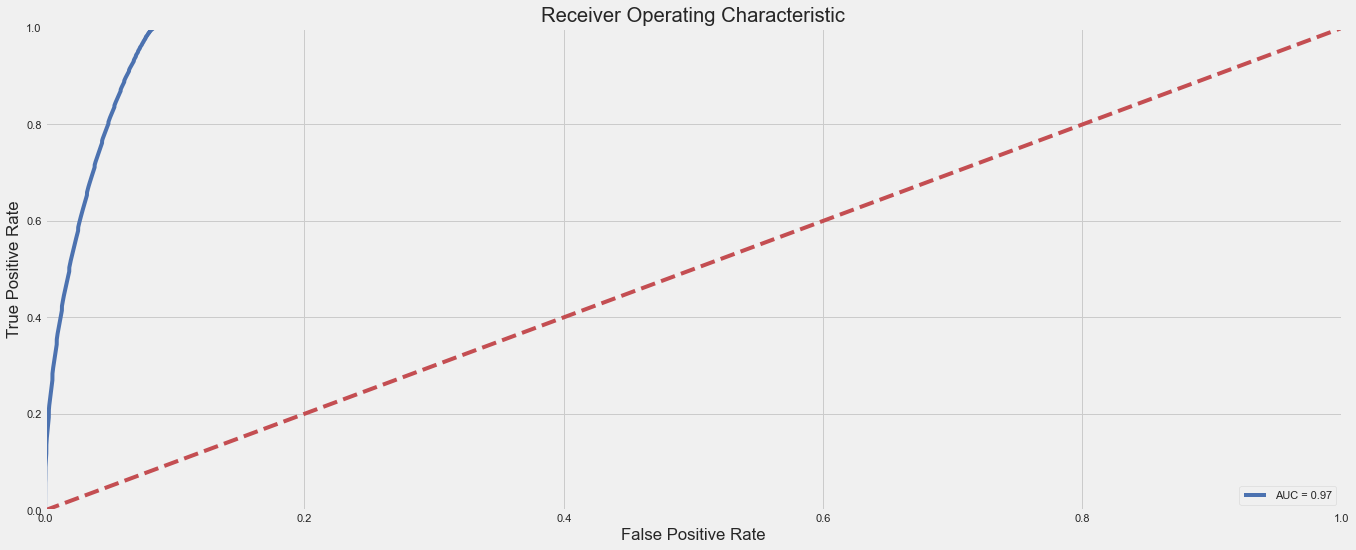

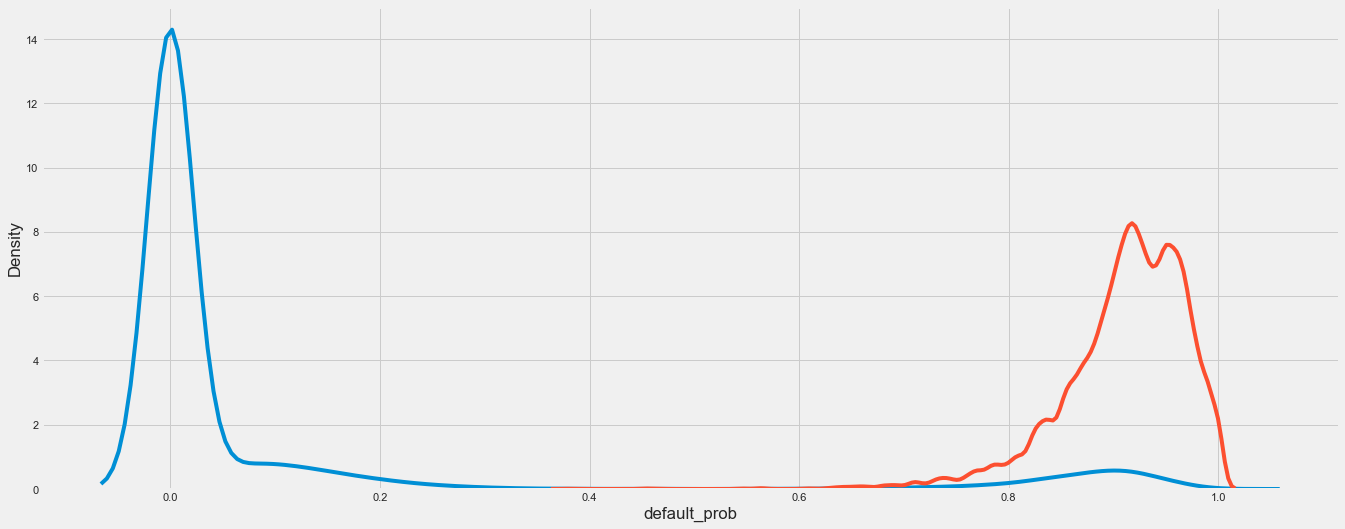

true_class  predicted_class
0           0                  0.916438
            1                  0.083562
1           1                  0.999580
            0                  0.000420
Name: predicted_class, dtype: float64


In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train_s, y_train_s)
eval_model(rfc_model, x_train_s, y_train_s)

### KNN Neighborhood

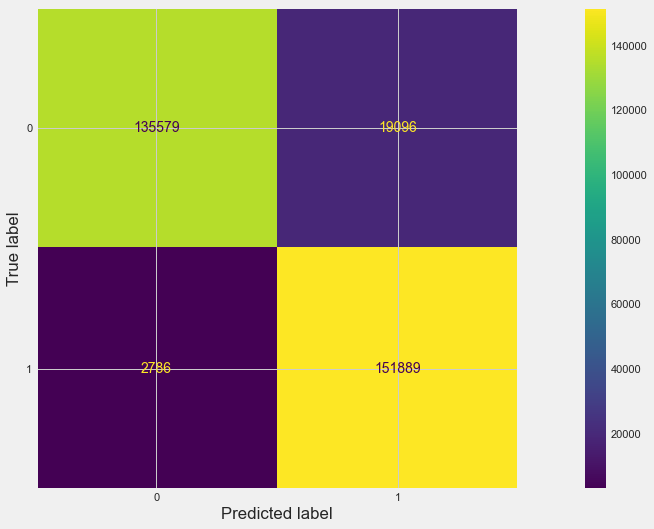



Accuracy:  0.9292645870373364
Precision:  0.888317688686142
Recall:  0.9819880394375303
F1:  0.9328072222563409
AUC:  0.9584465312218833


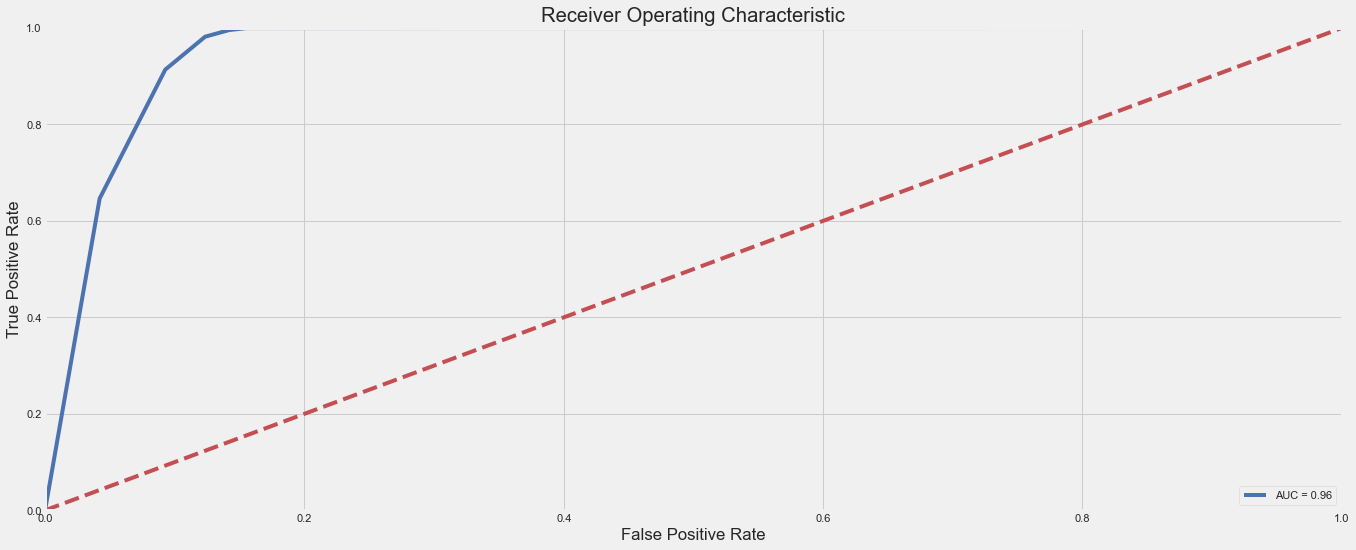

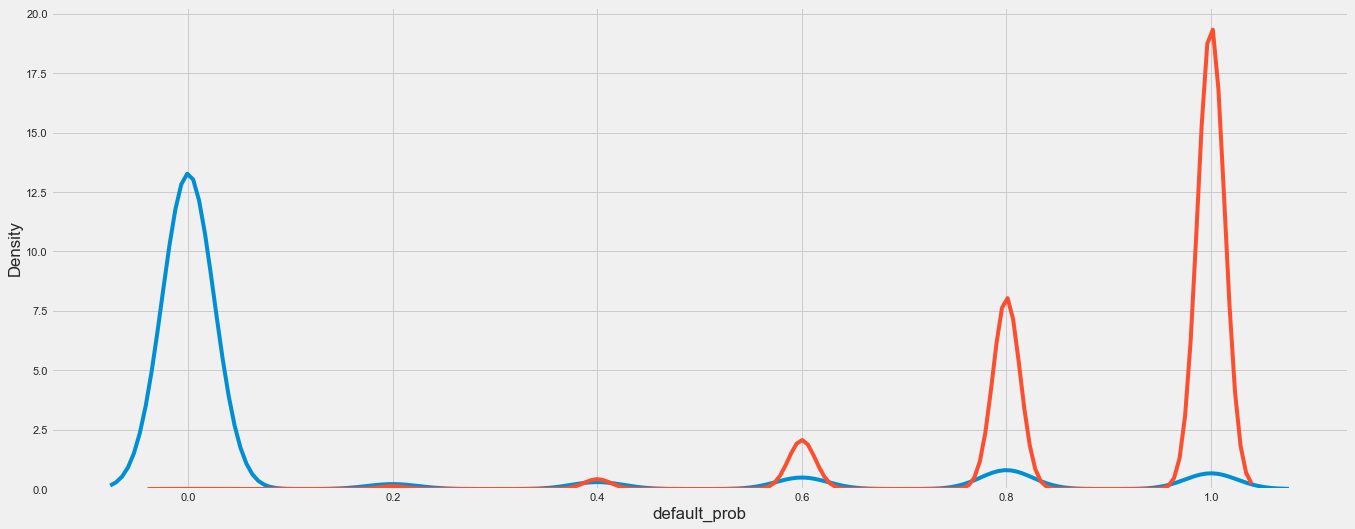

true_class  predicted_class
0           0                  0.876541
            1                  0.123459
1           1                  0.981988
            0                  0.018012
Name: predicted_class, dtype: float64


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_s, y_train_s)
eval_model(knn, x_train_s, y_train_s)

### Decision Tree

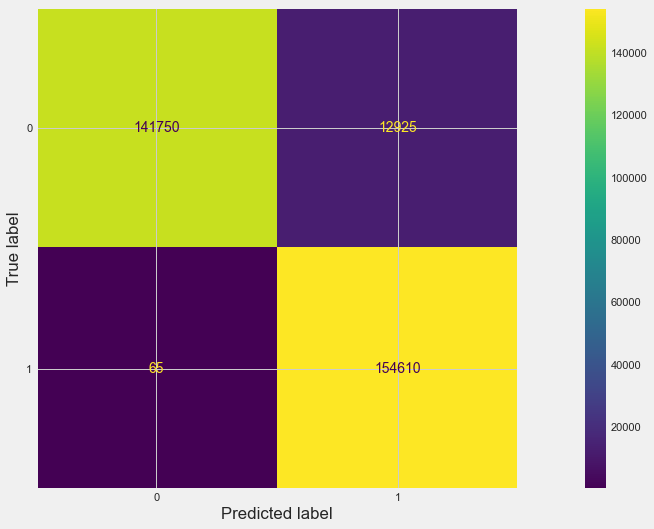



Accuracy:  0.9580087279780184
Precision:  0.9228519413853822
Recall:  0.9995797640213351
F1:  0.9596846776946713
AUC:  0.9787871765511762


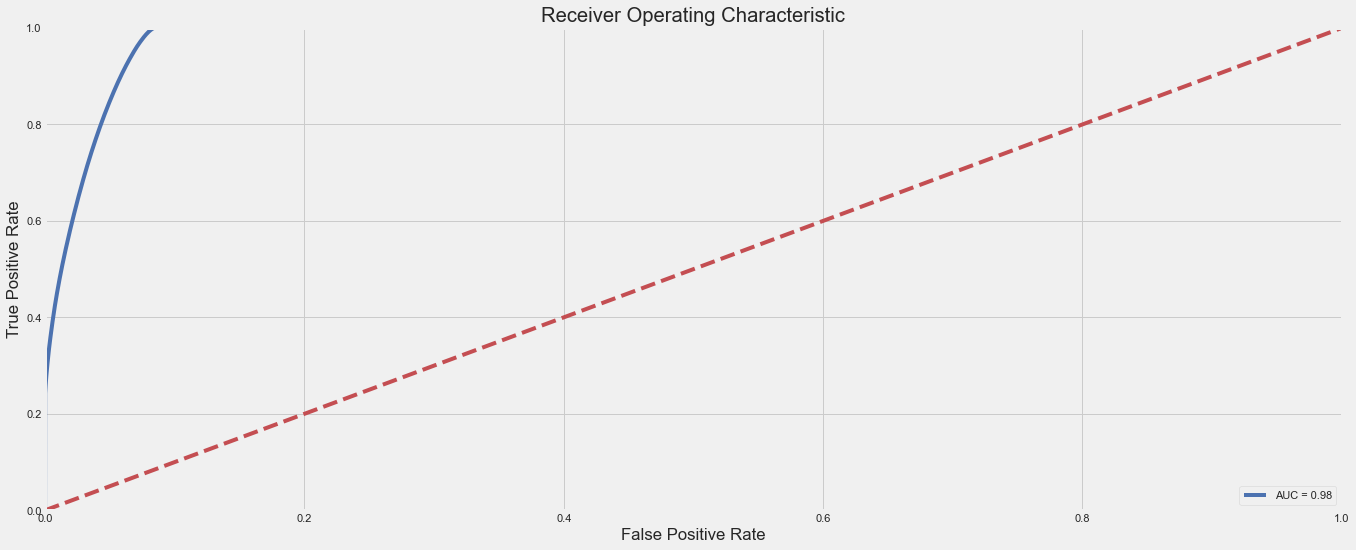

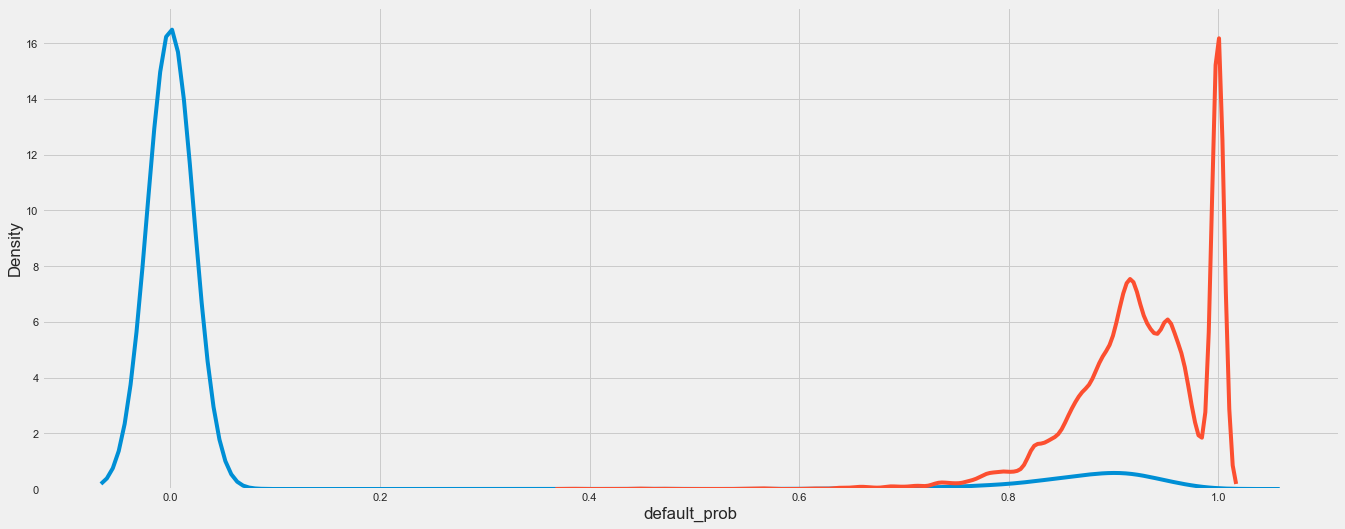

true_class  predicted_class
0           0                  0.916438
            1                  0.083562
1           1                  0.999580
            0                  0.000420
Name: predicted_class, dtype: float64


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train_s, y_train_s)
eval_model(dt, x_train_s, y_train_s)

### Ada Boost

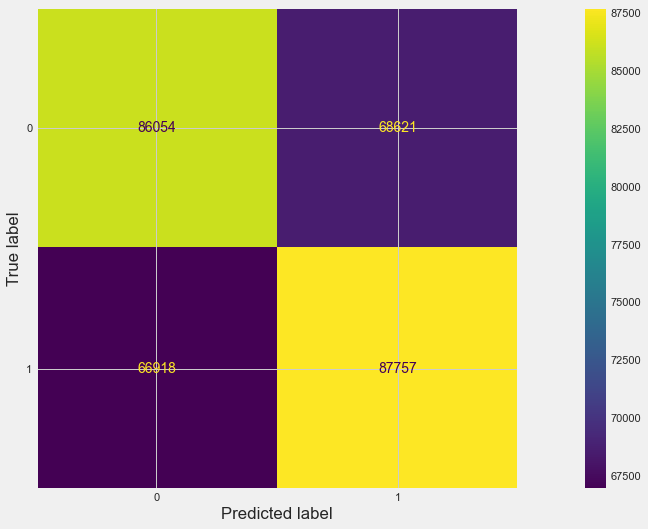



Accuracy:  0.5618587360594796
Precision:  0.5611850771847703
Recall:  0.5673638273799902
F1:  0.5642575381044388
AUC:  0.5987854458044573


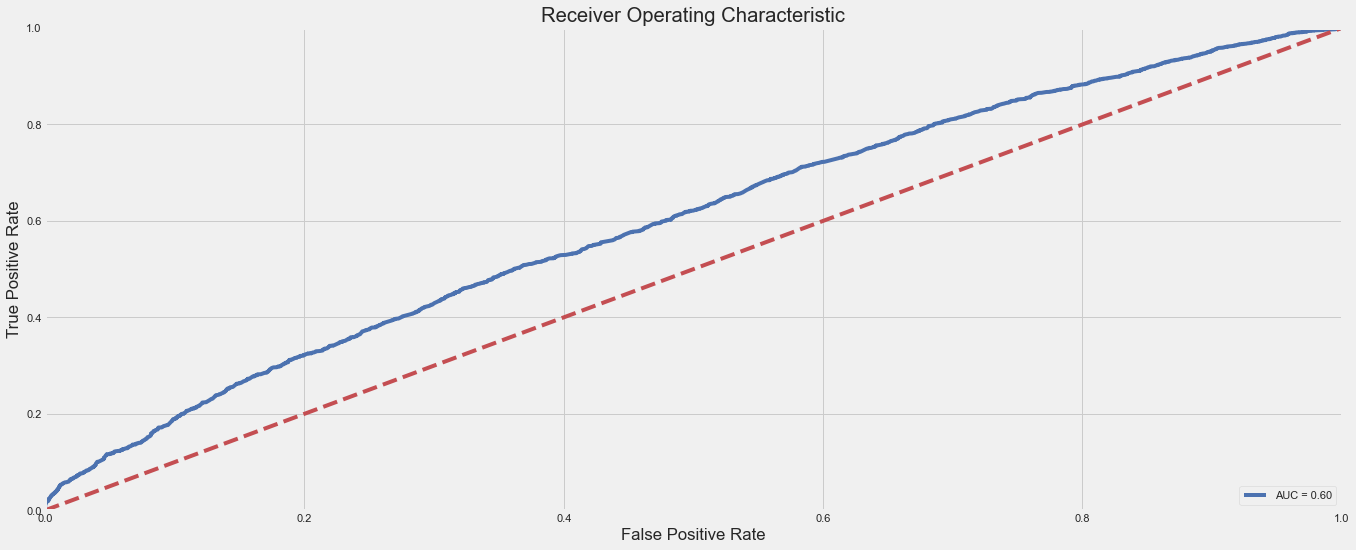

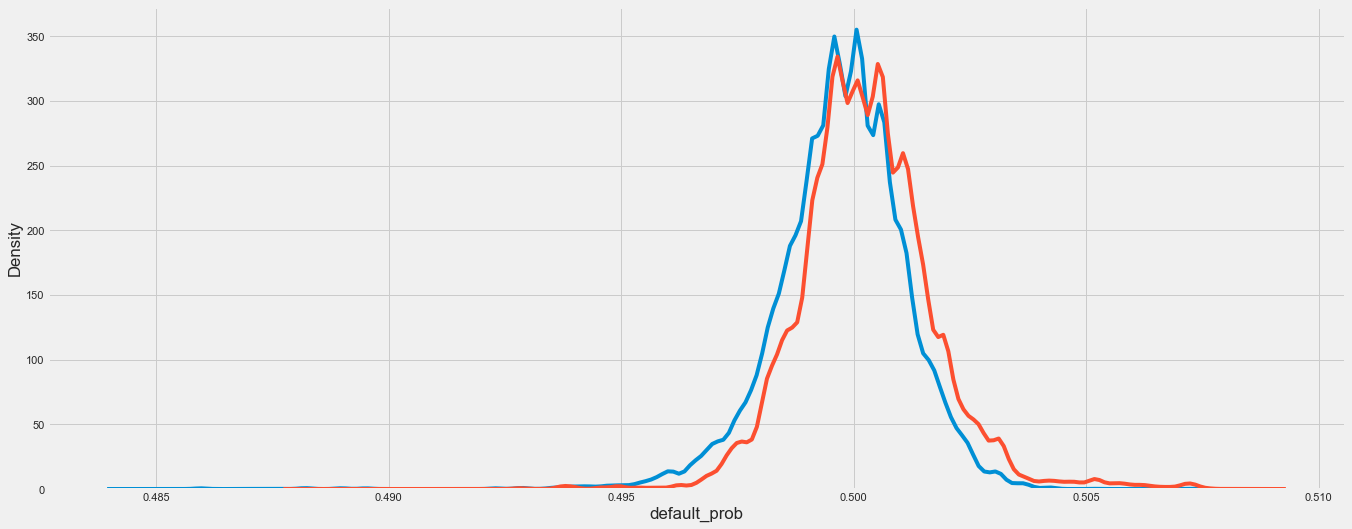

true_class  predicted_class
0           0                  0.556354
            1                  0.443646
1           1                  0.567364
            0                  0.432636
Name: predicted_class, dtype: float64


In [ ]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(x_train_s, y_train_s)
eval_model(ada, x_train_s, y_train_s)

### XGBoost

[16:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


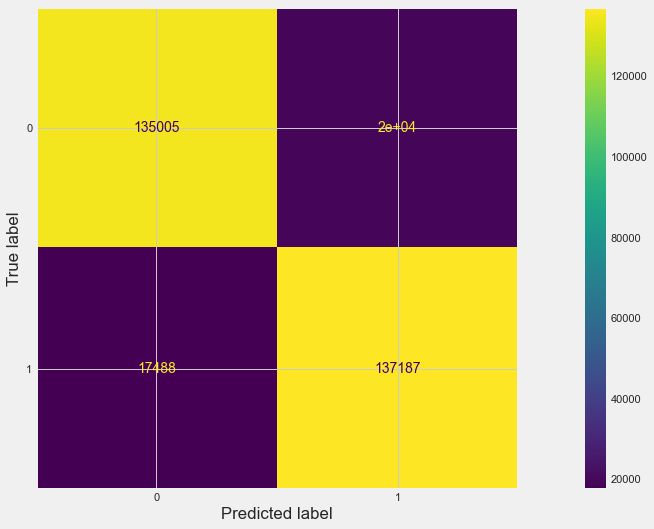



Accuracy:  0.8798836269597543
Precision:  0.8745991571941323
Recall:  0.8869371262324228
F1:  0.8807249335541775
AUC:  0.9406100465245029


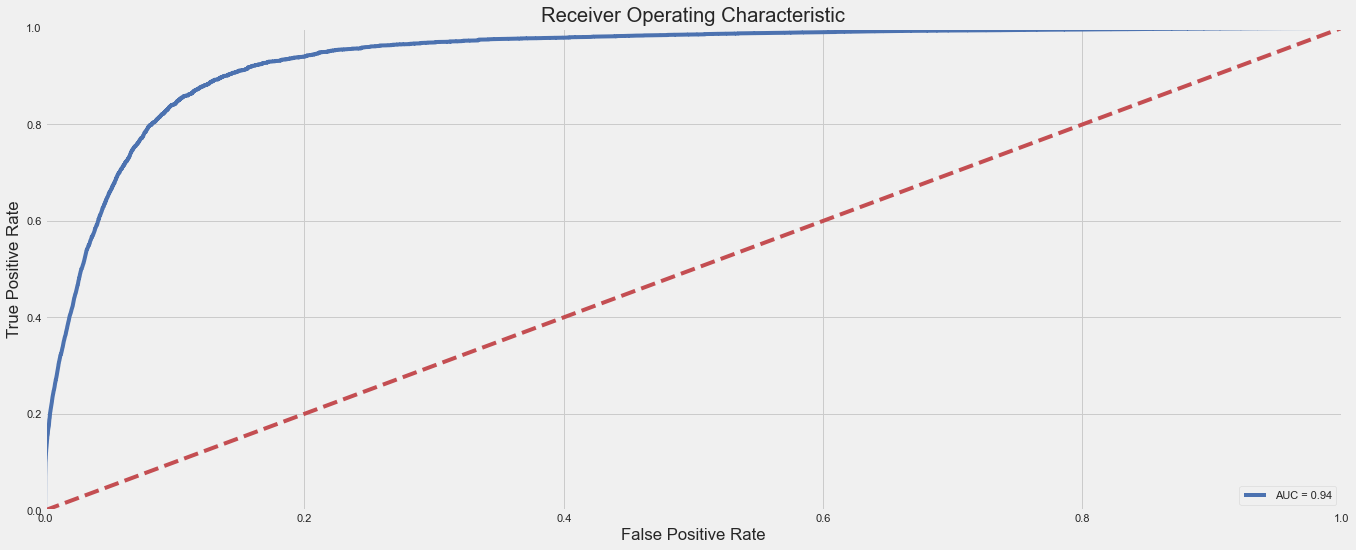

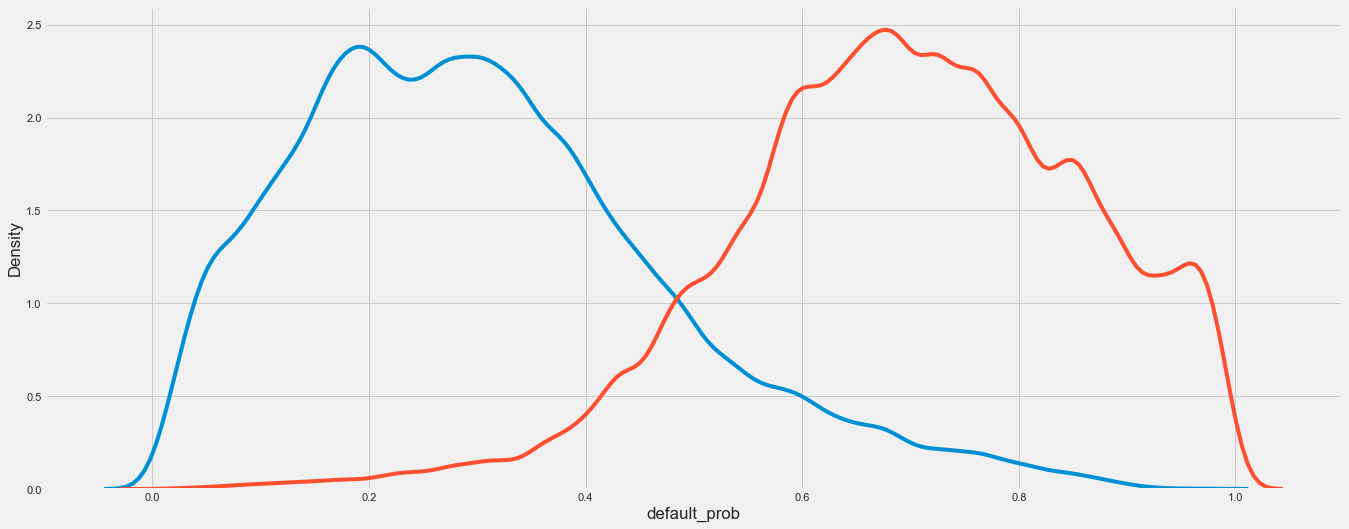

true_class  predicted_class
0           0                  0.872830
            1                  0.127170
1           1                  0.886937
            0                  0.113063
Name: predicted_class, dtype: float64


In [ ]:
xg = XGBClassifier(random_state=42)
xg.fit(x_train_s, y_train_s)
eval_model(xg, x_train_s, y_train_s)

## Tuning Hyperparameter

In [ ]:
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])
        
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [ ]:
model = {
    'logistic_model' : LogisticRegression(),
    'rfc_model' : RandomForestClassifier(),
    'knn' : KNeighborsClassifier(),
    'dt' : DecisionTreeClassifier(),
    'ada' : AdaBoostClassifier(random_state=42),
    'xg' : XGBClassifier(random_state=42),
}

### Logistic Regression

In [ ]:
hyperparameters2 = dict(
                       penalty = ['l2','l1','elasticnet'],  
                       C = np.logspace(-4,4,20),
                      )


lm = LogisticRegression()
lm_tuned = RandomizedSearchCV(lm, hyperparameters2, cv=5, random_state=42)
lm_tuned.fit(x_train_s, y_train_s)

show_best_hyperparameter(lm_tuned.best_estimator_, hyperparameters2)

Best penalty: l2
Best C: 0.0001


### KNN

In [ ]:
hyperparameters = dict(
                       leaf_size = list(range(1,50)),
                       n_neighbors = list(range(1,30)),
                       p = [1,2],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'],
                      )


knnp = KNeighborsClassifier()
knnp_tuned = RandomizedSearchCV(knnp, hyperparameters, cv=5, random_state=42)
knnp_tuned.fit(x_train_s, y_train_s)

show_best_hyperparameter(knnp_tuned.best_estimator_, hyperparameters)

Best leaf_size: 48
Best n_neighbors: 17
Best p: 1
Best algorithm: brute


### Decision Tree

In [ ]:
hyperparameters3 = dict(
                        max_depth = np.linspace(1, 32, 32, endpoint=True),
                        min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True),
                        min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True),
                        max_features = list(range(1,x_train.shape[1])),
                      )


dtp = DecisionTreeClassifier()
dtp_tuned = RandomizedSearchCV(dtp, hyperparameters3, cv=5, random_state=42)
dtp_tuned.fit(x_train_s, y_train_s)

show_best_hyperparameter(dtp_tuned.best_estimator_, hyperparameters3)

Best max_depth: 30.0
Best min_samples_split: 0.30000000000000004
Best min_samples_leaf: 0.1
Best max_features: 17


### Random Forest

In [ ]:
hyperparameters4 = dict(
                        n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                        max_features = ['auto', 'sqrt', 'log2'],
                        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                        criterion = ['gini','entropy'],
                        min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                        min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
                        bootstrap = [True],
                        n_jobs = [-1],
                      )


rpp = RandomForestClassifier()
rpp_tuned = RandomizedSearchCV(rpp, hyperparameters4, cv=5, random_state=42)
rpp_tuned.fit(x_train_s, y_train_s)

show_best_hyperparameter(rpp_tuned.best_estimator_, hyperparameters4)

Best n_estimators: 400
Best max_features: log2
Best max_depth: 110
Best criterion: gini
Best min_samples_split: 4
Best min_samples_leaf: 1
Best bootstrap: True
Best n_jobs: -1


### AdaBoost

In [ ]:
hyperparameters5 = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)], 
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 100)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )


adapt = AdaBoostClassifier(random_state=42)
adapt_tuned = RandomizedSearchCV(adapt, hyperparameters5, cv=5, random_state=42, scoring='recall')
adapt_tuned.fit(x_train_s, y_train_s)

show_best_hyperparameter(adapt_tuned.best_estimator_, hyperparameters5)

Best n_estimators: 1251
Best learning_rate: 0.009000000000000001
Best algorithm: SAMME


### XGBoost

In [ ]:
hyperparameters6 = dict(
                        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                        min_child_weight = [int(x) for x in np.linspace(1, 20, num = 11)],
                        gamma = [float(x) for x in np.linspace(0, 1, num = 11)],
                        tree_method = ['auto', 'exact', 'approx', 'hist'],
                        colsample_bytree = [float(x) for x in np.linspace(0, 1, num = 11)],
                        eta = [float(x) for x in np.linspace(0, 1, num = 100)],
                        alpha = [float(x) for x in np.linspace(0, 1, num = 11)],
                      )


xgpp = XGBClassifier(random_state=42)
xgpp_tuned = RandomizedSearchCV(xgpp, hyperparameters6, cv=5, random_state=42)
xgpp_tuned.fit(x_train_s, y_train_s)

show_best_hyperparameter(xgpp_tuned.best_estimator_, hyperparameters6)

[12:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## Cek Overfiting Setelah Tuning

### Logistic Regression

Train

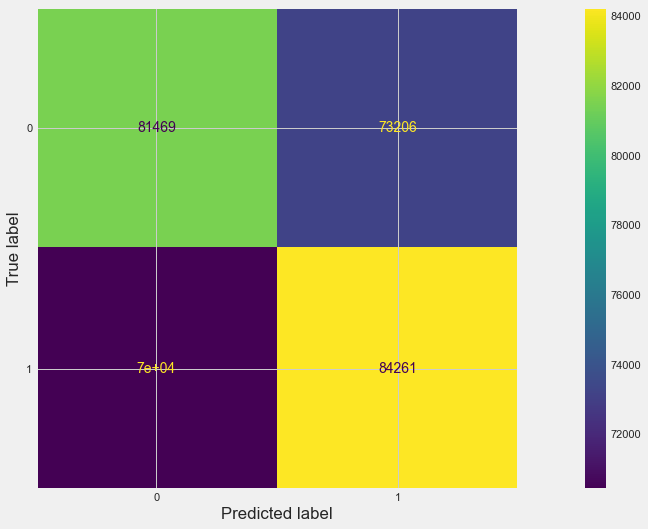



Accuracy:  0.5357362211087765
Precision:  0.5351025929242318
Recall:  0.5447615968967189
F1:  0.5398888967200826
AUC:  0.5572966217559308


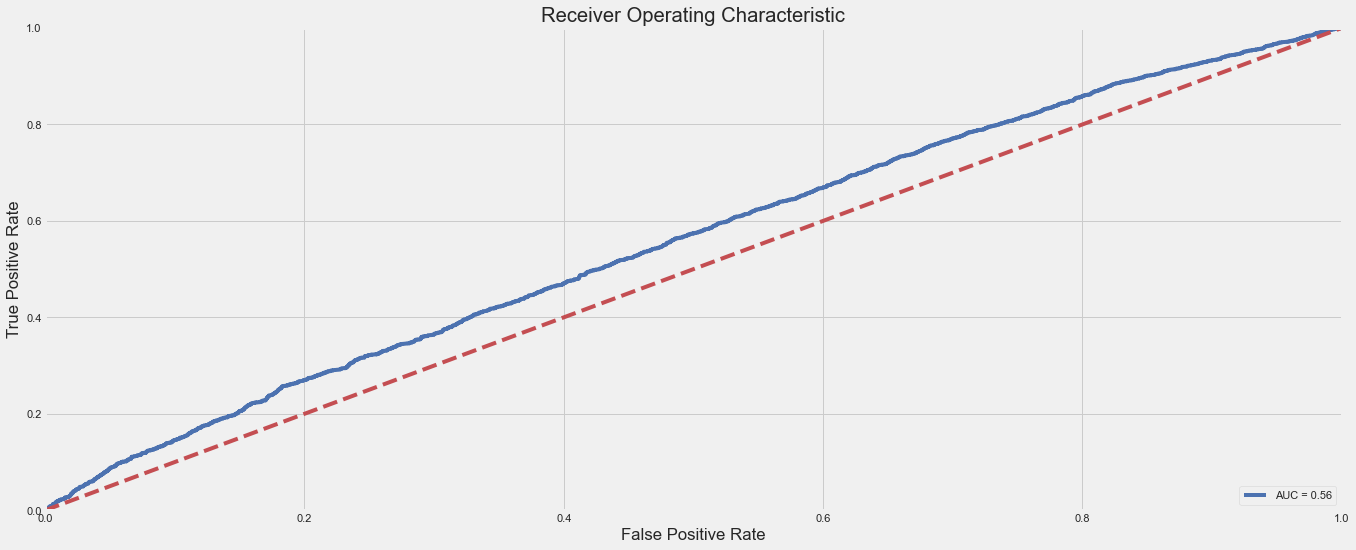

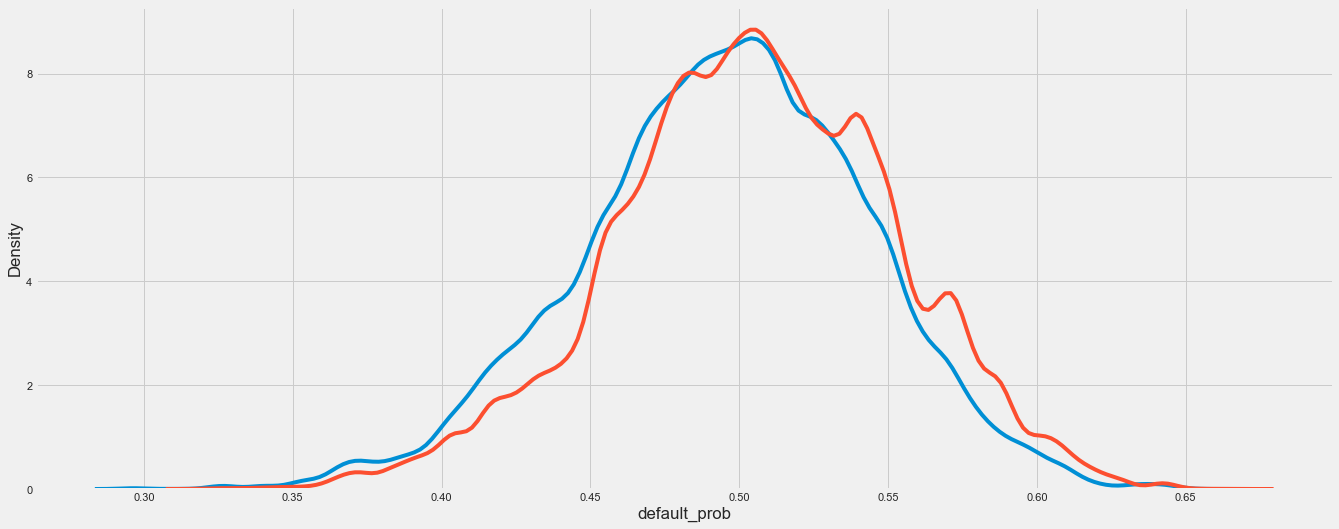

true_class  predicted_class
0           0                  0.526711
            1                  0.473289
1           1                  0.544762
            0                  0.455238
Name: predicted_class, dtype: float64


In [ ]:
anakkurus = dict(
                penalty = ['l2'],  
                       C = [0.0001]
                )

tes3 = LogisticRegression()
tes3_tuned = RandomizedSearchCV(tes3, anakkurus, random_state=42)
tes3_tuned.fit(x_train_s, y_train_s)

eval_model(tes3_tuned, x_train_s, y_train_s)

Test

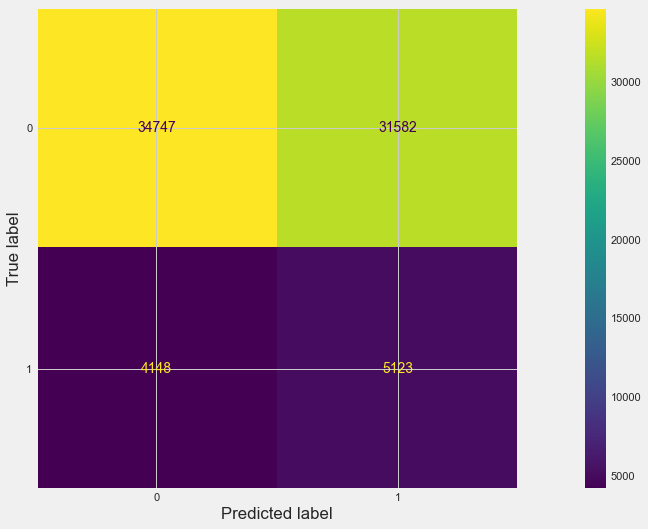



Accuracy:  0.5273809523809524
Precision:  0.13957226535894293
Recall:  0.5525833243447309
F1:  0.222855402818862
AUC:  0.558166641327722


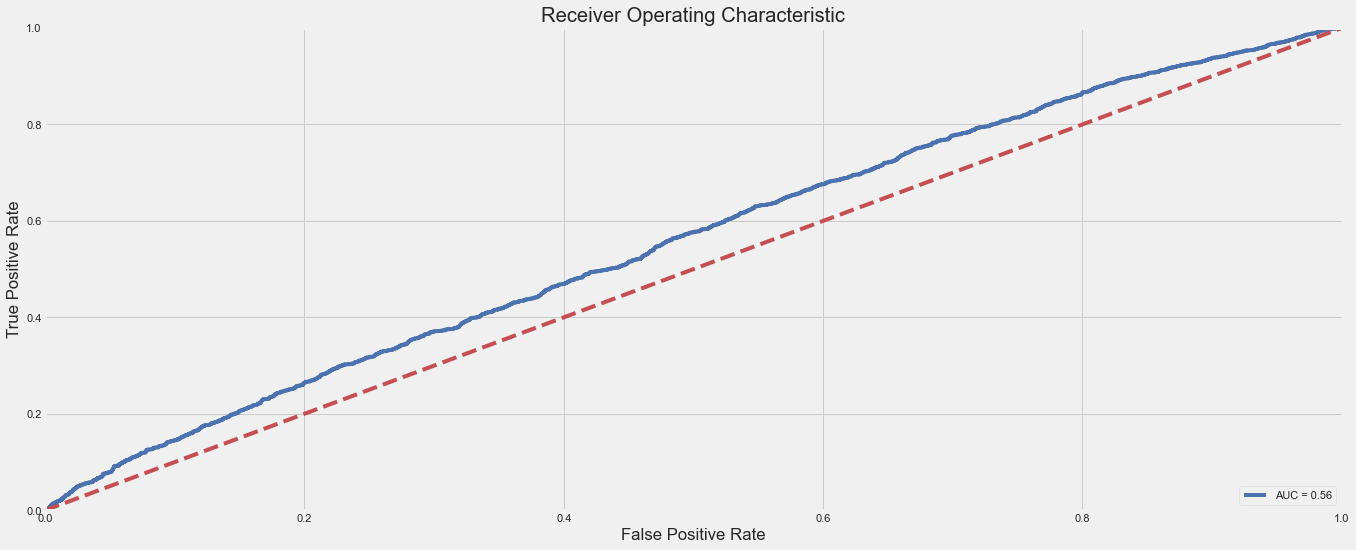

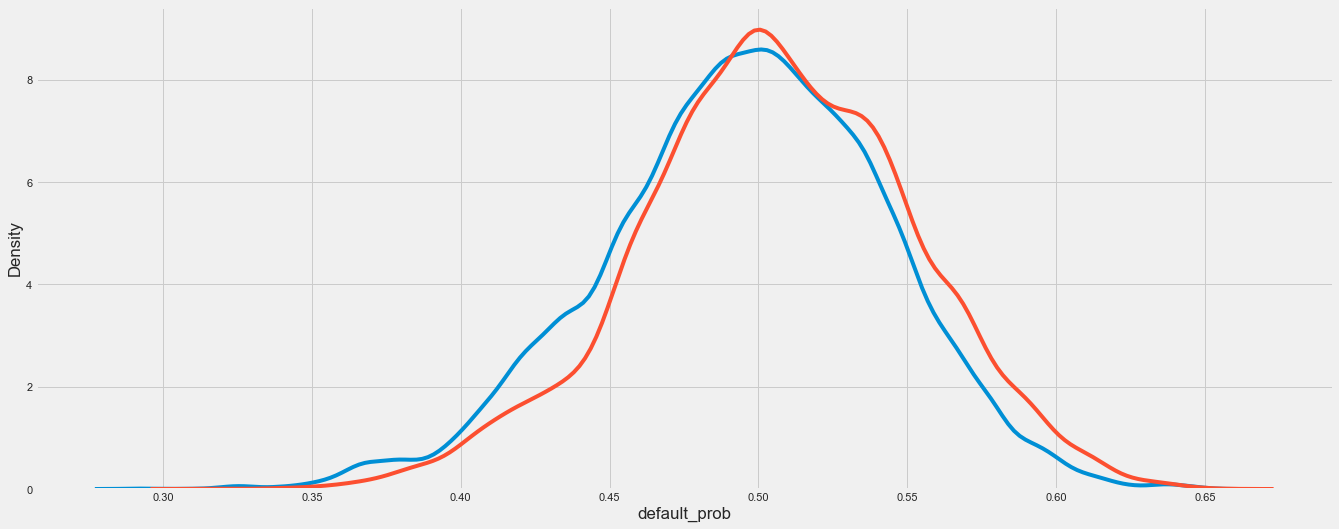

true_class  predicted_class
0           0                  0.523858
            1                  0.476142
1           1                  0.552583
            0                  0.447417
Name: predicted_class, dtype: float64


In [ ]:
eval_model(tes3_tuned, x_test, y_test)

### RandomForest

Train

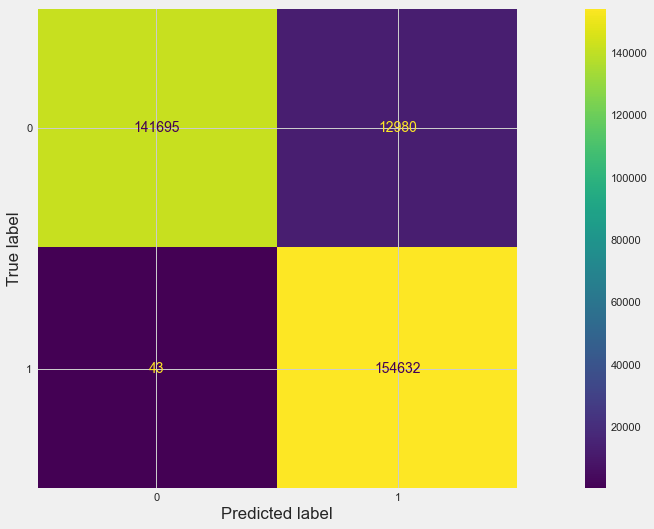



Accuracy:  0.9579020526911266
Precision:  0.9225592439682123
Recall:  0.9997219977371908
F1:  0.9595919165216096
AUC:  0.9724650429325825


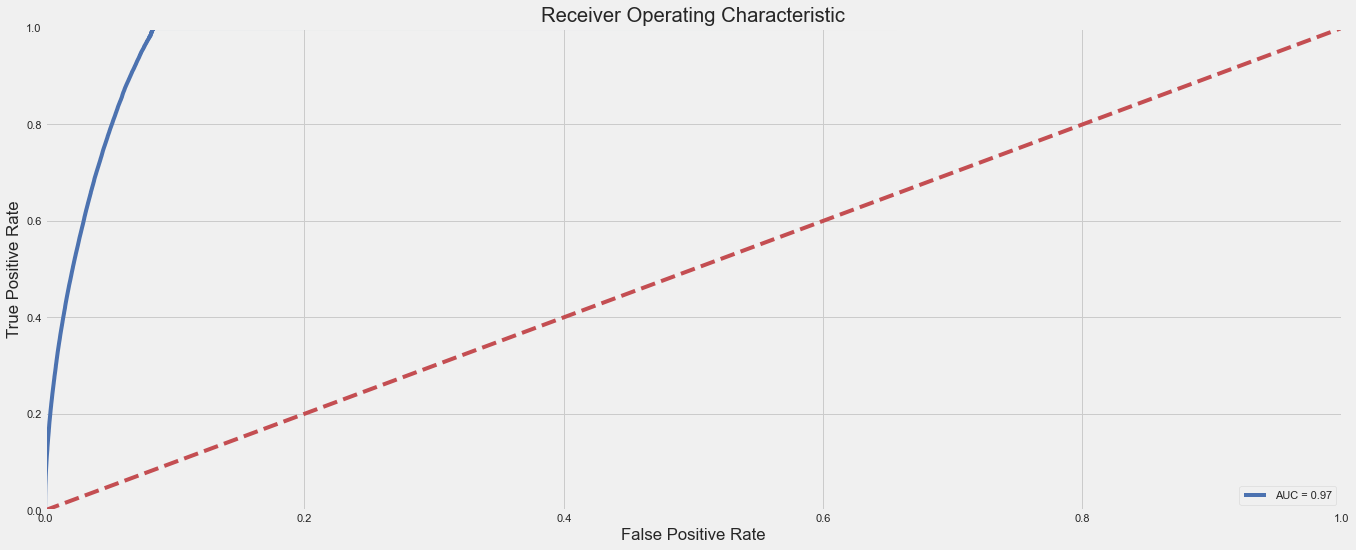

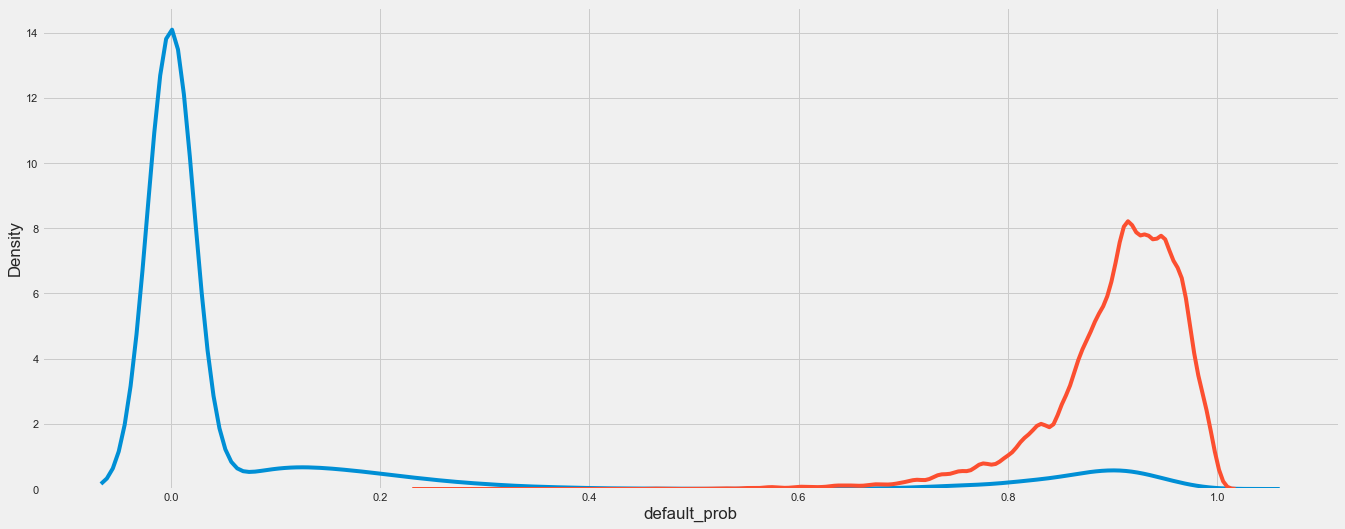

true_class  predicted_class
0           0                  0.916082
            1                  0.083918
1           1                  0.999722
            0                  0.000278
Name: predicted_class, dtype: float64


In [ ]:
anakkeren = dict( n_estimators = [400], 
max_features = ['log2'], 
max_depth = [110], 
criterion = ['gini'], 
min_samples_split = [4], 
min_samples_leaf = [1], 
bootstrap = [True], 
n_jobs = [-1])



tes = RandomForestClassifier()
tes_tuned = RandomizedSearchCV(tes, anakkeren, random_state=42)
tes_tuned.fit(x_train_s, y_train_s)


eval_model(tes_tuned, x_train_s, y_train_s)

Test

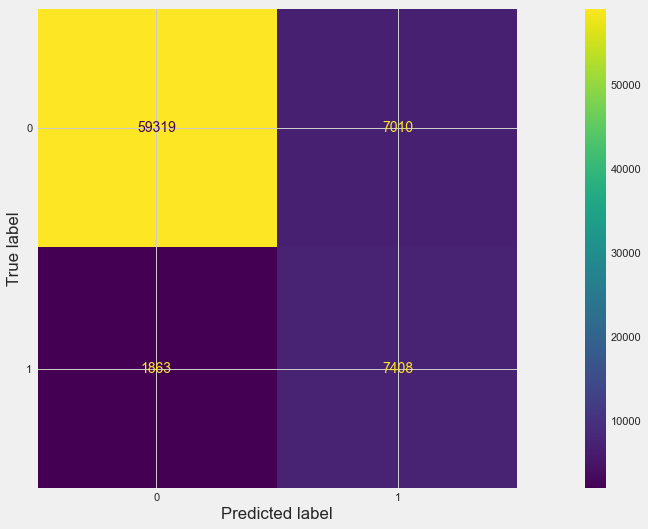



Accuracy:  0.8826322751322752
Precision:  0.5138021917048134
Recall:  0.7990508035810592
F1:  0.6254379669888978
AUC:  0.9373373659427302


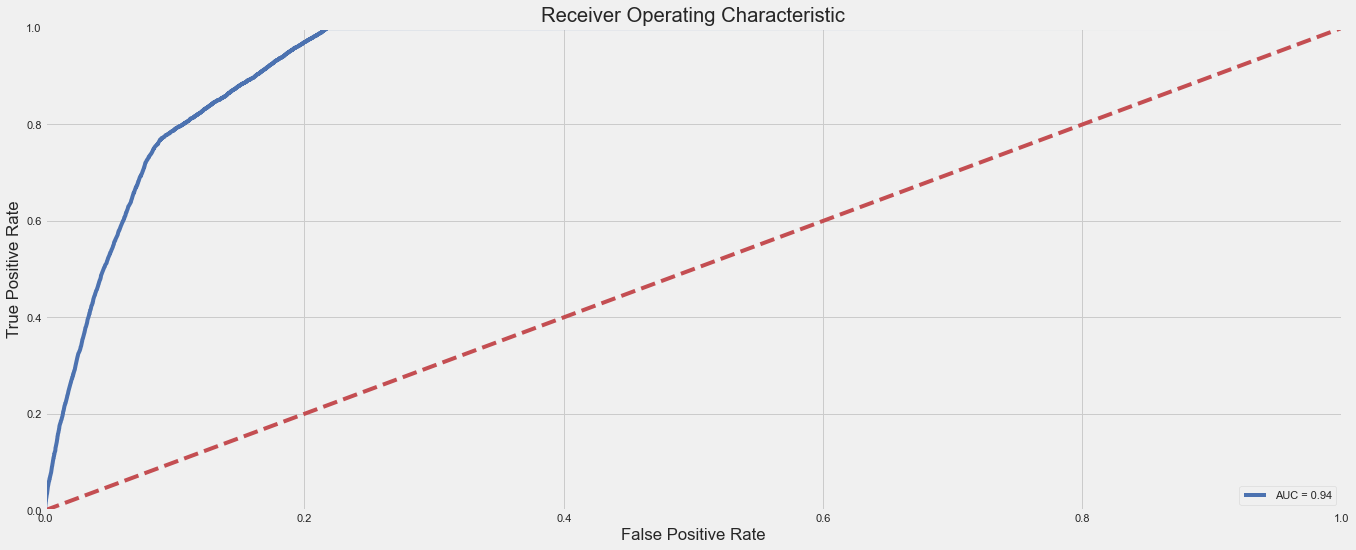

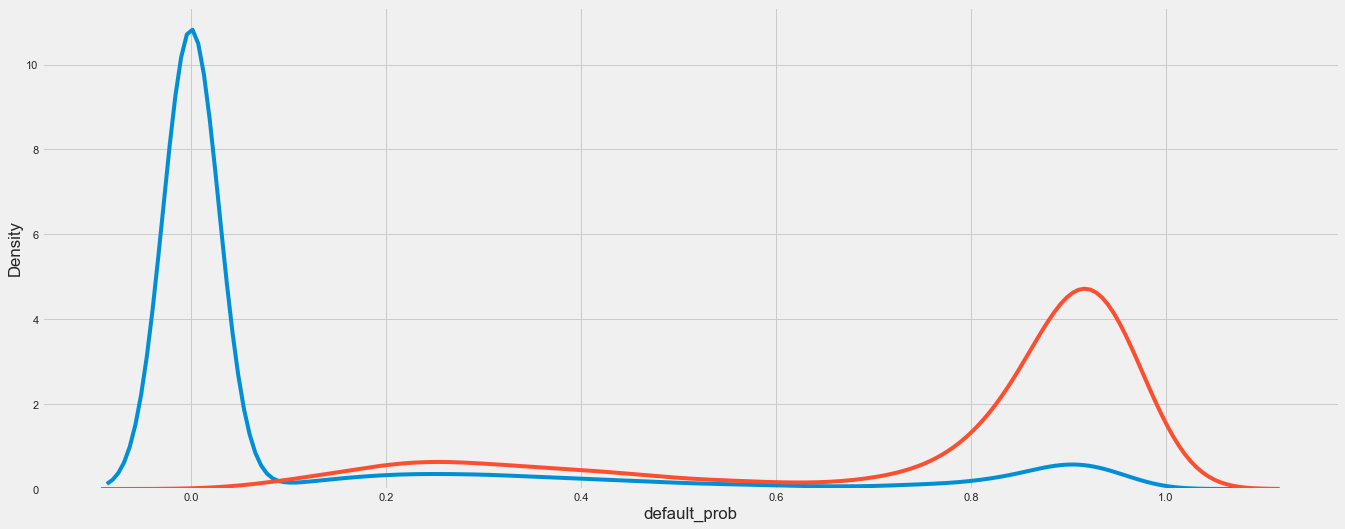

true_class  predicted_class
0           0                  0.894315
            1                  0.105685
1           1                  0.799051
            0                  0.200949
Name: predicted_class, dtype: float64


In [ ]:
eval_model(tes_tuned, x_test, y_test)

### Random Forest Tambahan (sesuai arahan mentor tercinta kita, Mas Gerry)

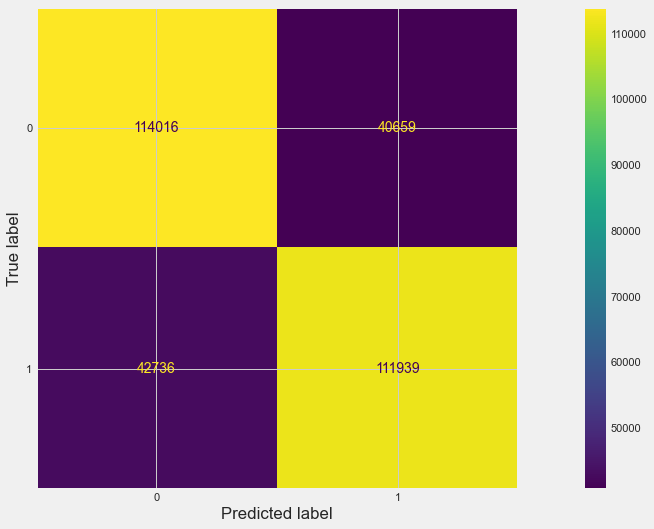



Accuracy:  0.7304186196864393
Precision:  0.7335548303385365
Recall:  0.7237045417811541
F1:  0.7285963947369277
AUC:  0.8207938947153984


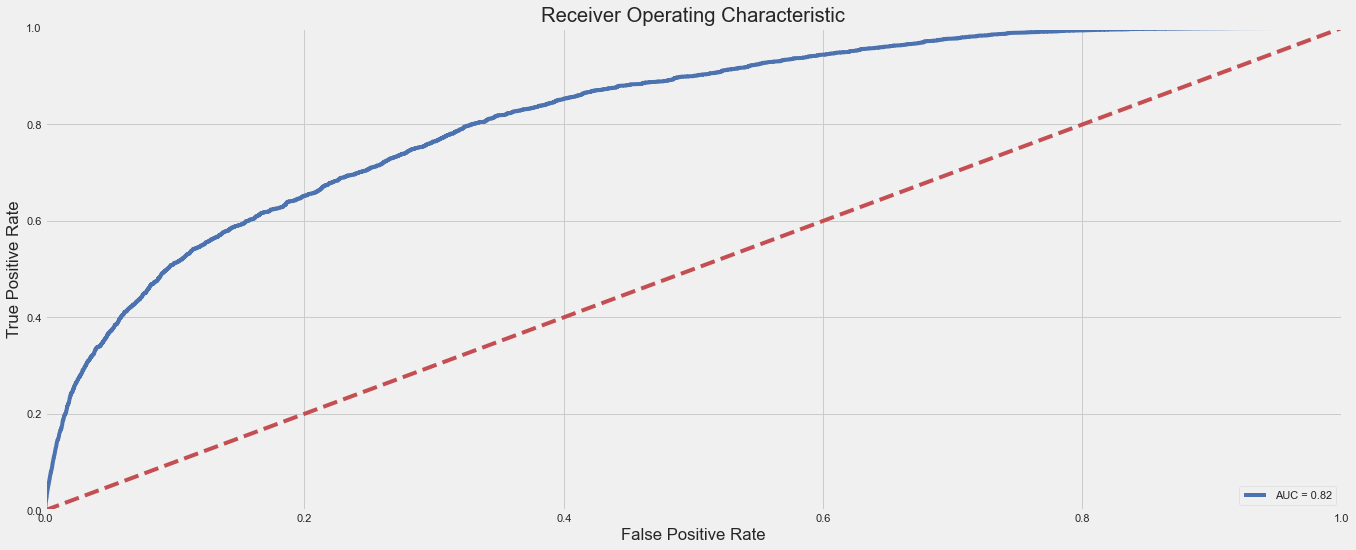

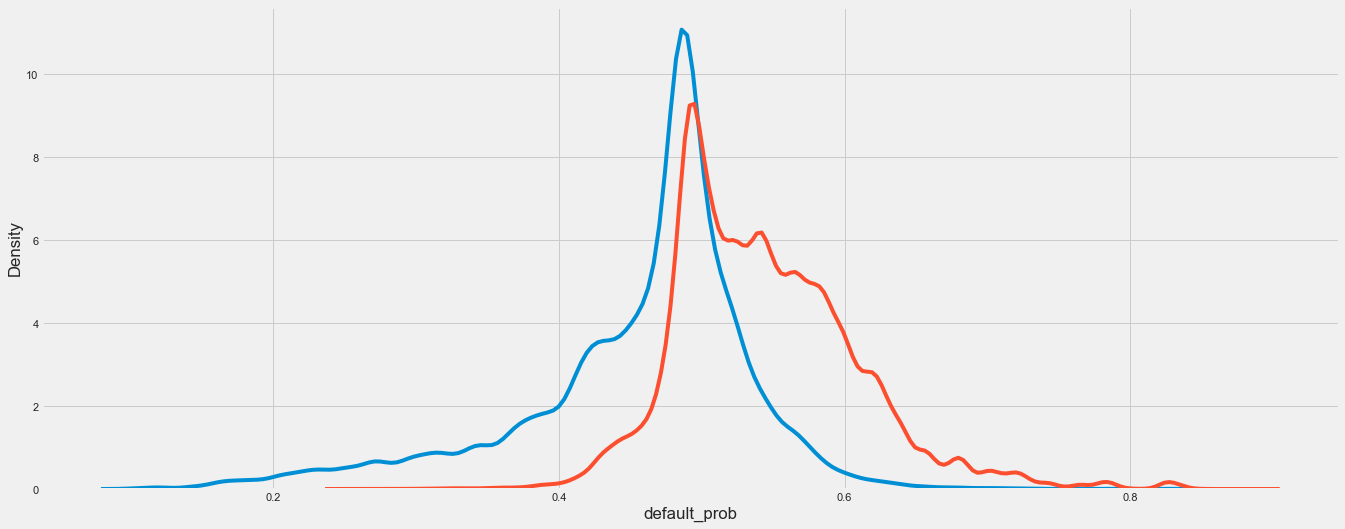

true_class  predicted_class
0           0                  0.737133
            1                  0.262867
1           1                  0.723705
            0                  0.276295
Name: predicted_class, dtype: float64


In [ ]:
kingkong = dict( n_estimators = [400], 
max_features = ['log2'], 
max_depth = [10], 
criterion = ['gini'], 
min_samples_split = [4], 
min_samples_leaf = [1], 
bootstrap = [True], 
n_jobs = [-1])



tesplusplus = RandomForestClassifier()
tesplusplus_tuned = RandomizedSearchCV(tesplusplus, kingkong, random_state=42)
tesplusplus_tuned.fit(x_train_s, y_train_s)


eval_model(tesplusplus_tuned, x_train_s, y_train_s)

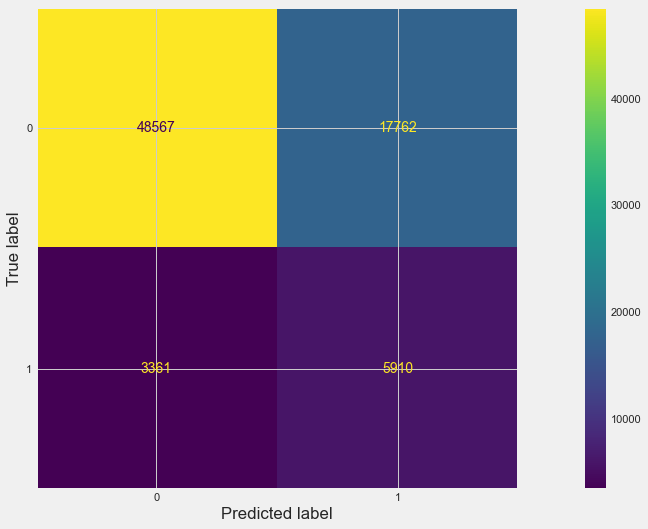



Accuracy:  0.7205952380952381
Precision:  0.24966204798918554
Recall:  0.6374716859022759
F1:  0.3588015663418632
AUC:  0.7624727463782139


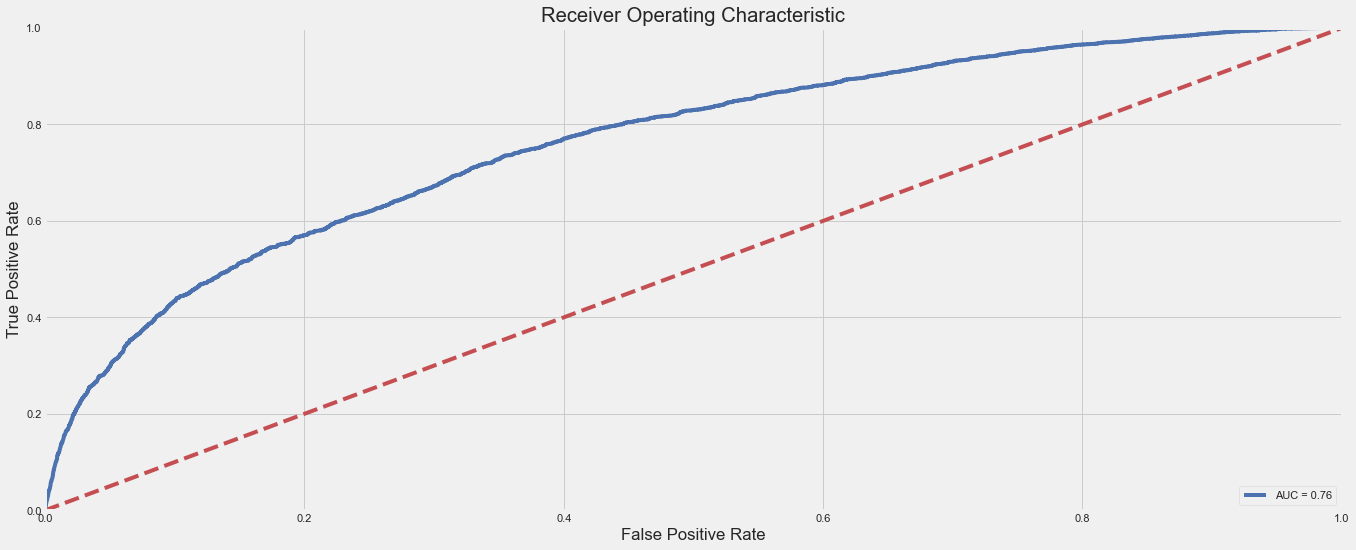

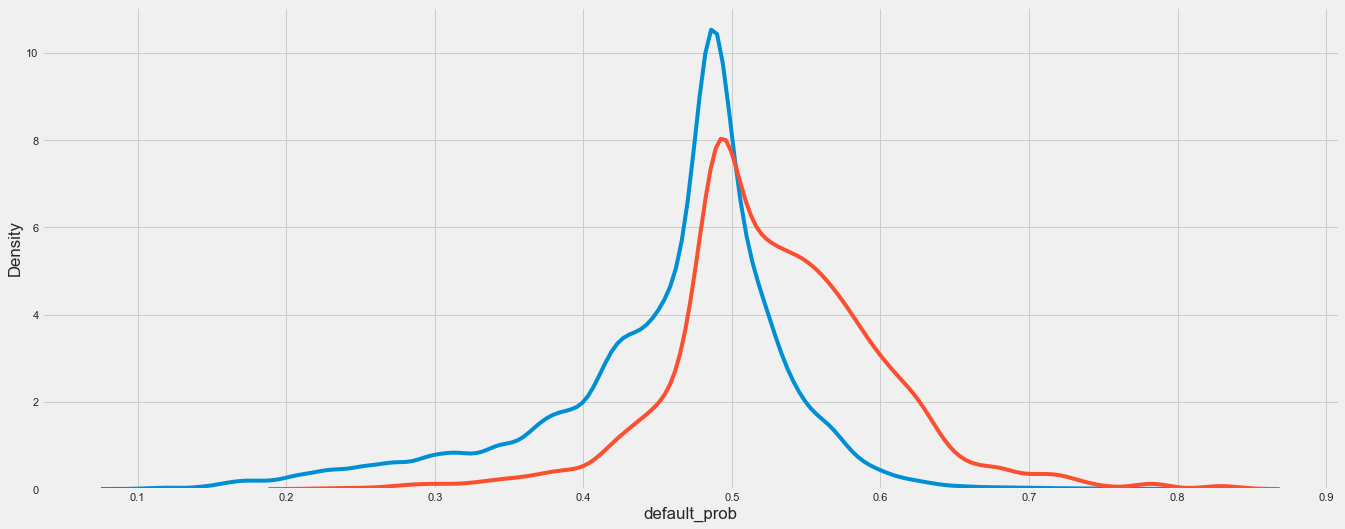

true_class  predicted_class
0           0                  0.732214
            1                  0.267786
1           1                  0.637472
            0                  0.362528
Name: predicted_class, dtype: float64


In [ ]:
eval_model(tesplusplus_tuned, x_test, y_test)

### KNN

Train

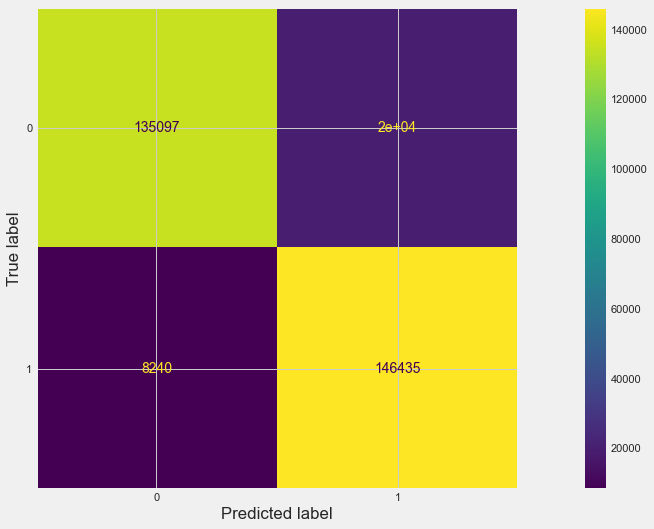



Accuracy:  0.9100759657346048
Precision:  0.8820694764867811
Recall:  0.9467270082430903
F1:  0.9132552512098987
AUC:  0.9530969323651324


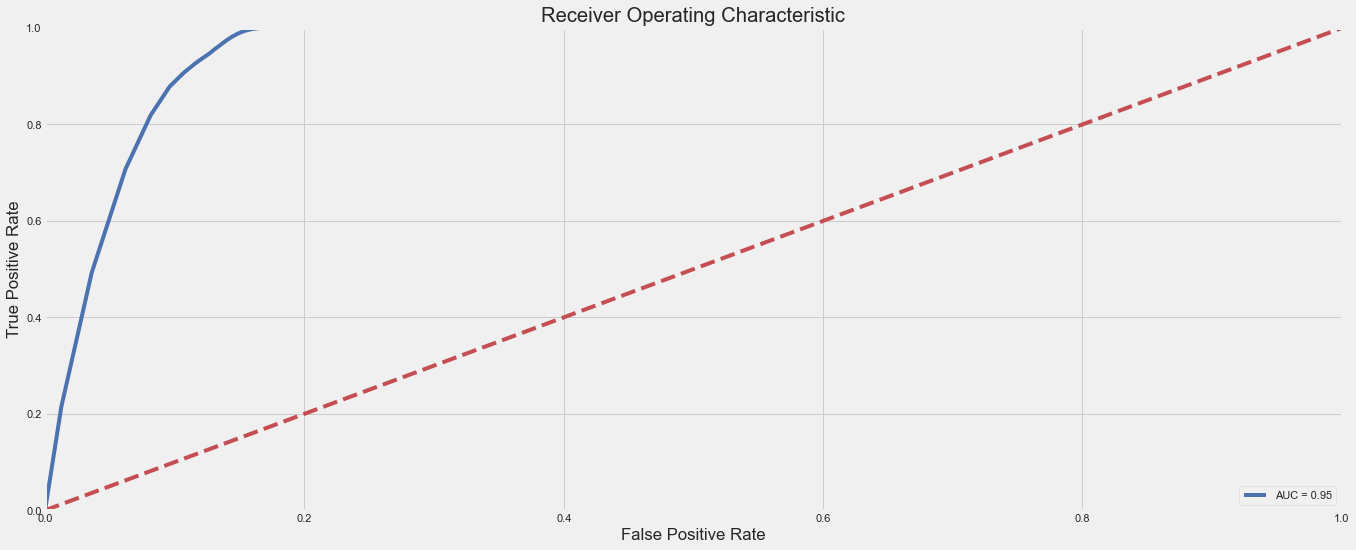

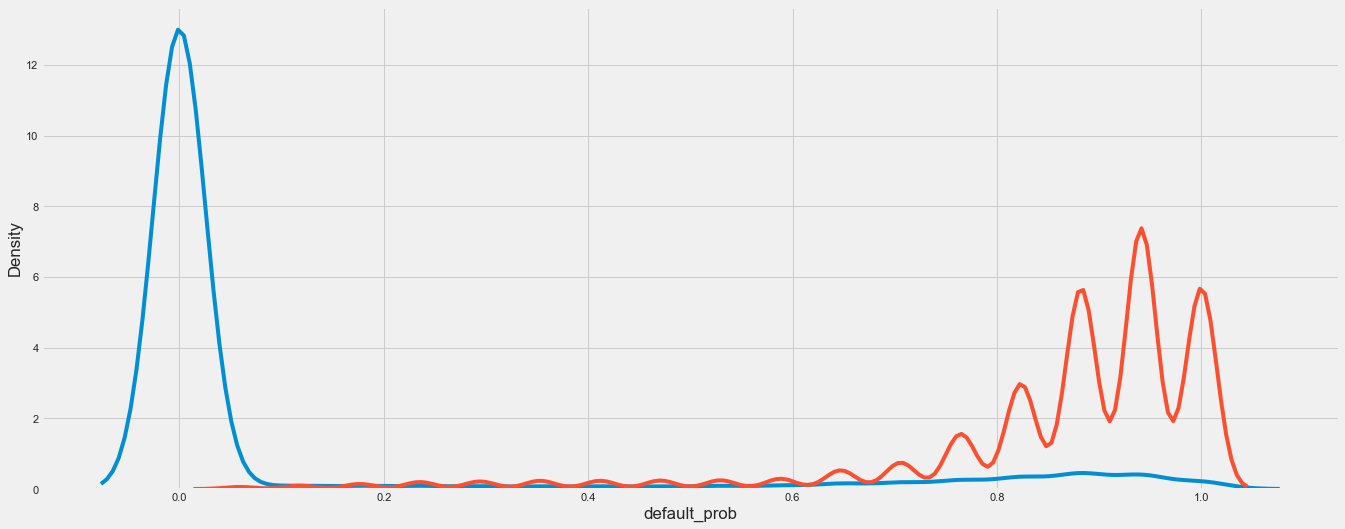

true_class  predicted_class
0           0                  0.873425
            1                  0.126575
1           1                  0.946727
            0                  0.053273
Name: predicted_class, dtype: float64


In [ ]:
anakkeren22 = dict(leaf_size = [48],
                       n_neighbors = [17],
                       p = [1],
                       algorithm = ['brute'])



tes22 = KNeighborsClassifier()
tes22_tuned = RandomizedSearchCV(tes22, anakkeren22, random_state=42)
tes22_tuned.fit(x_train_s, y_train_s)


eval_model(tes22_tuned, x_train_s, y_train_s)

Test

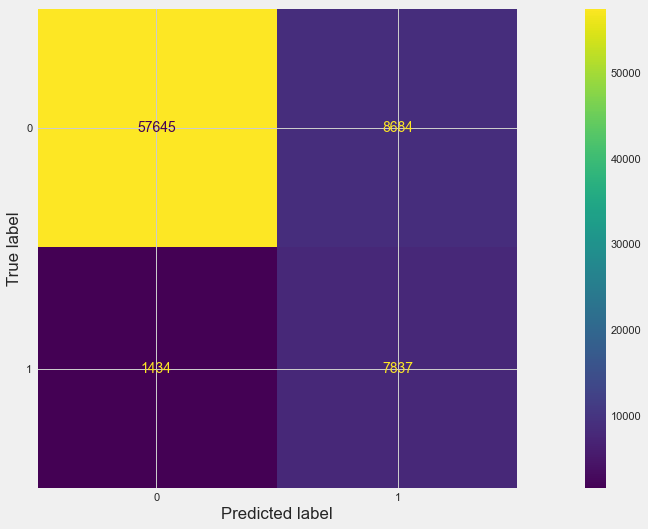



Accuracy:  0.8661640211640211
Precision:  0.4743659584770898
Recall:  0.8453241290044224
F1:  0.6077078163771712
AUC:  0.8974087593050453


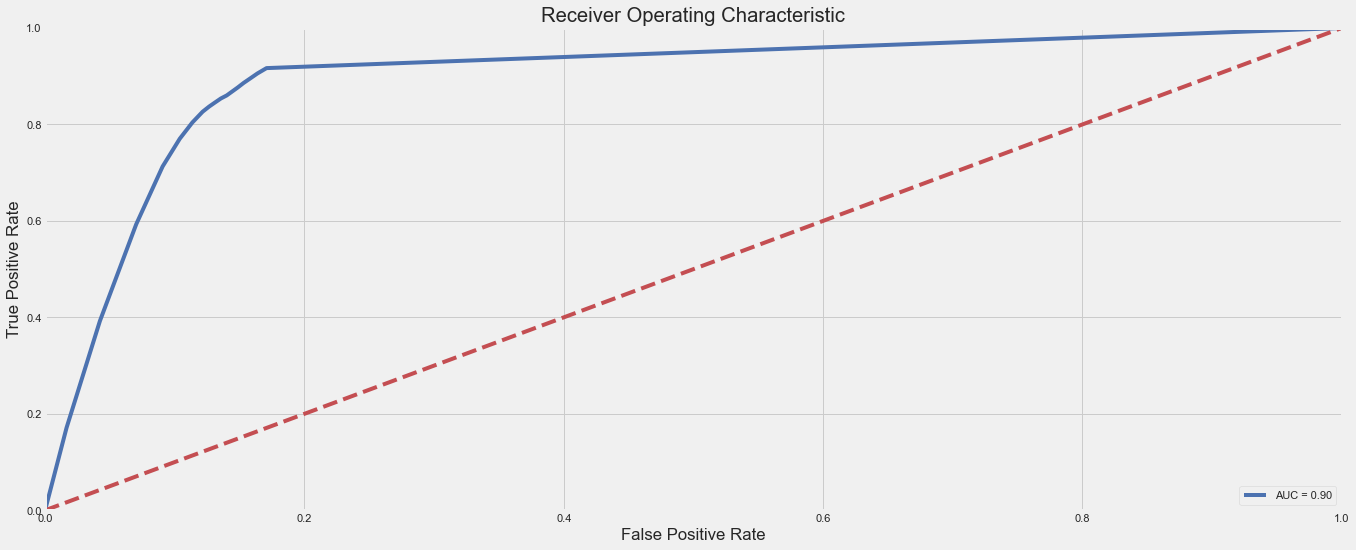

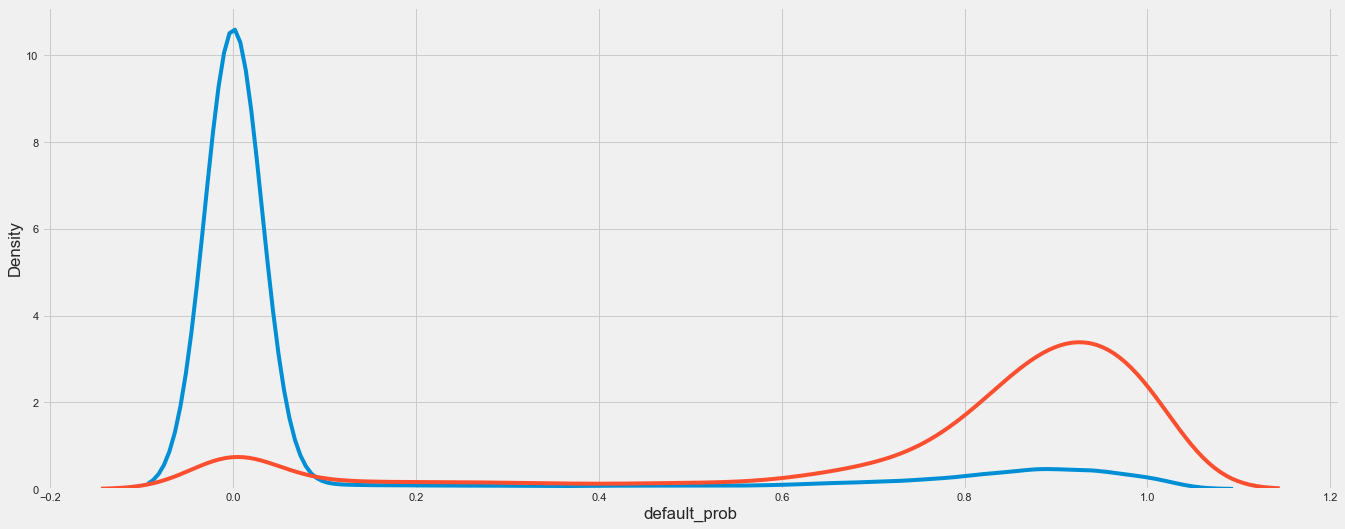

true_class  predicted_class
0           0                  0.869077
            1                  0.130923
1           1                  0.845324
            0                  0.154676
Name: predicted_class, dtype: float64


In [ ]:
anakkeren2 = dict(leaf_size = [48],
                       n_neighbors = [17],
                       p = [1],
                       algorithm = ['brute'])



tes2 = KNeighborsClassifier()
tes2_tuned = RandomizedSearchCV(tes2, anakkeren2, random_state=42)
tes2_tuned.fit(x_train_s, y_train_s)


eval_model(tes2_tuned, x_test, y_test)

### Decision Tree

Train

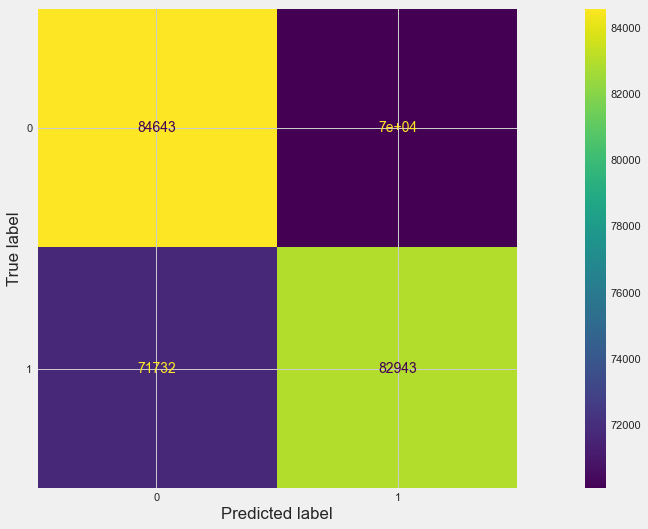



Accuracy:  0.5417358978503314
Precision:  0.5421997058342867
Recall:  0.5362405042831744
F1:  0.5392036405005689
AUC:  0.5532533418441861


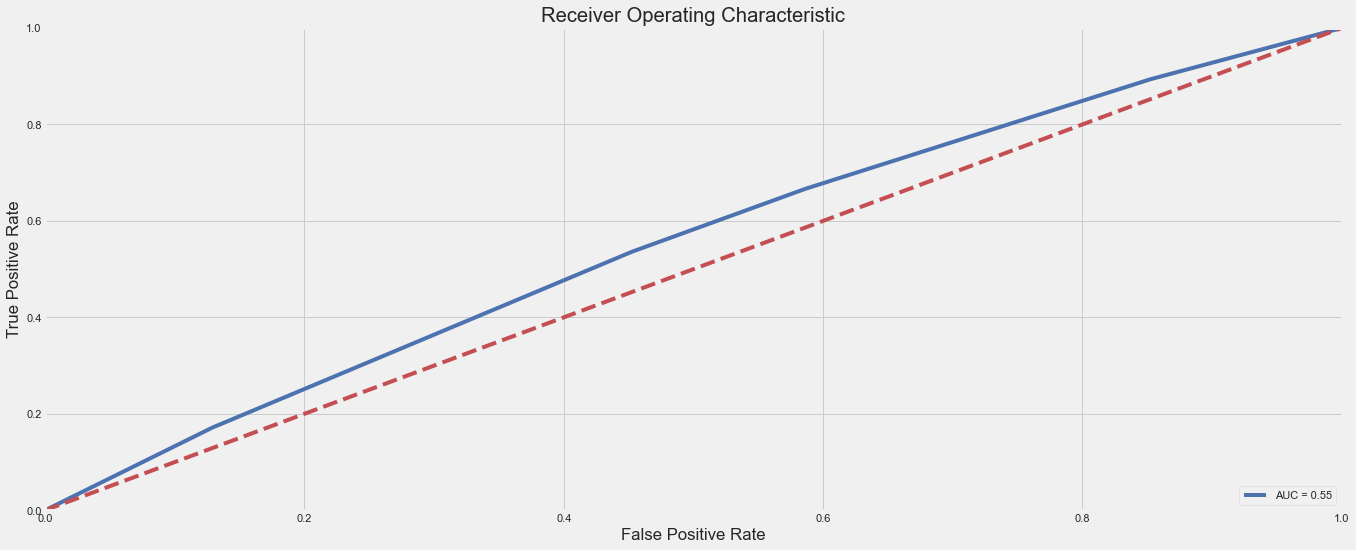

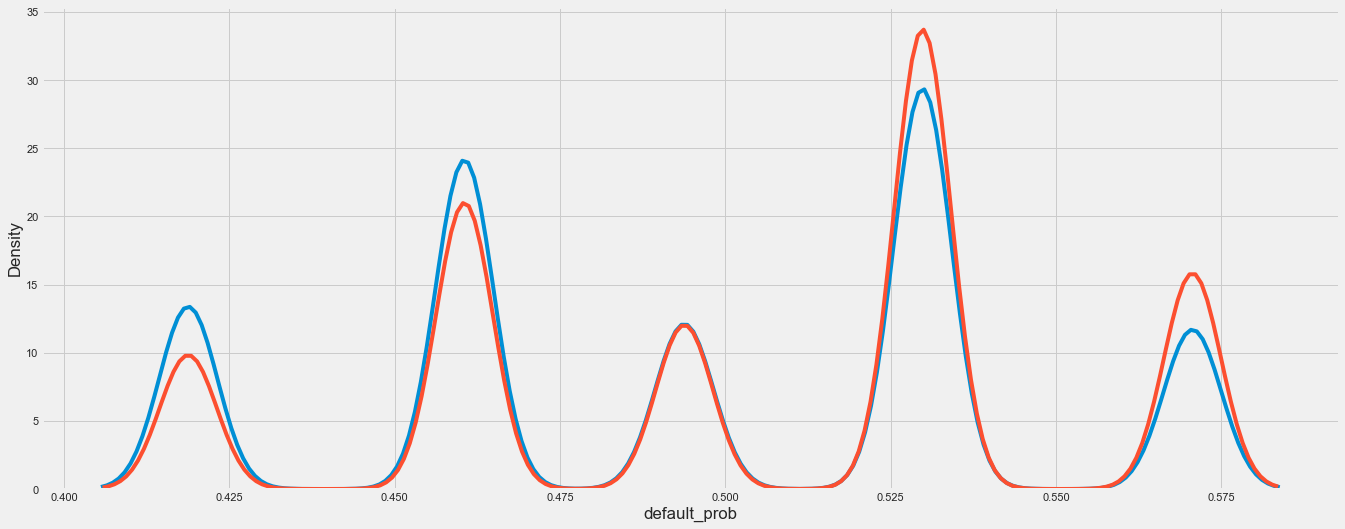

true_class  predicted_class
0           0                  0.547231
            1                  0.452769
1           1                  0.536241
            0                  0.463759
Name: predicted_class, dtype: float64


In [ ]:
anakganteng = dict(max_depth = [30],
                        min_samples_split = [0.30000000000000004],
                        min_samples_leaf = [0.1],
                        max_features = [17])



tes4 = DecisionTreeClassifier()
tes4_tuned = RandomizedSearchCV(tes4, anakganteng, random_state=42)
tes4_tuned.fit(x_train_s, y_train_s)


eval_model(tes4_tuned, x_train_s, y_train_s)

Test

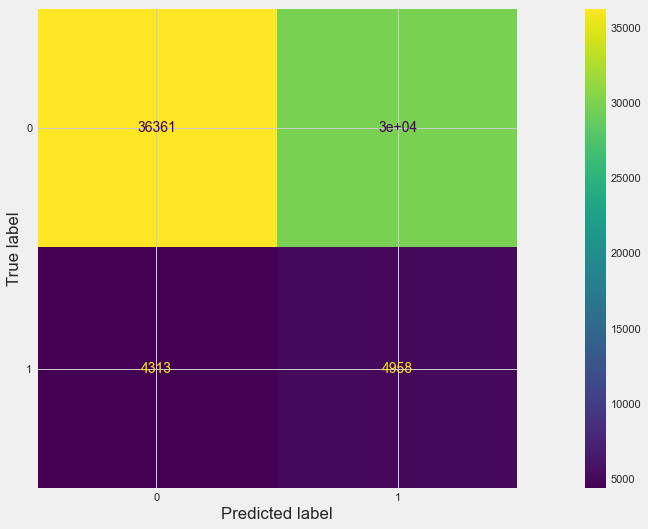



Accuracy:  0.5465476190476191
Precision:  0.14195728110862968
Recall:  0.5347858914895912
F1:  0.22435911939724415
AUC:  0.5485406933112222


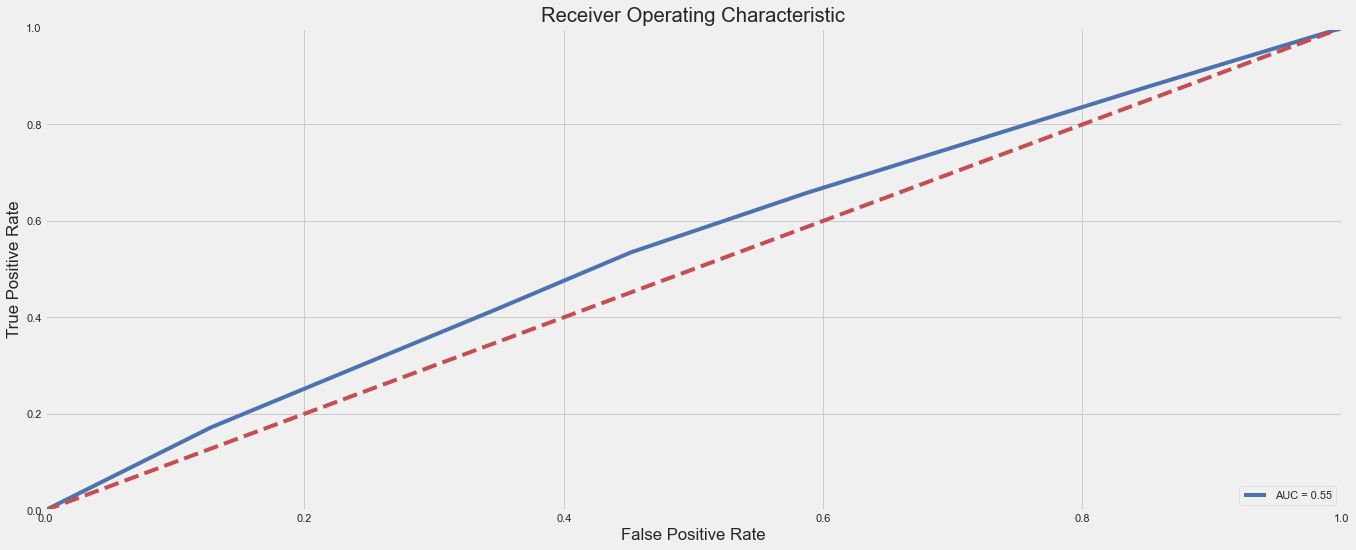

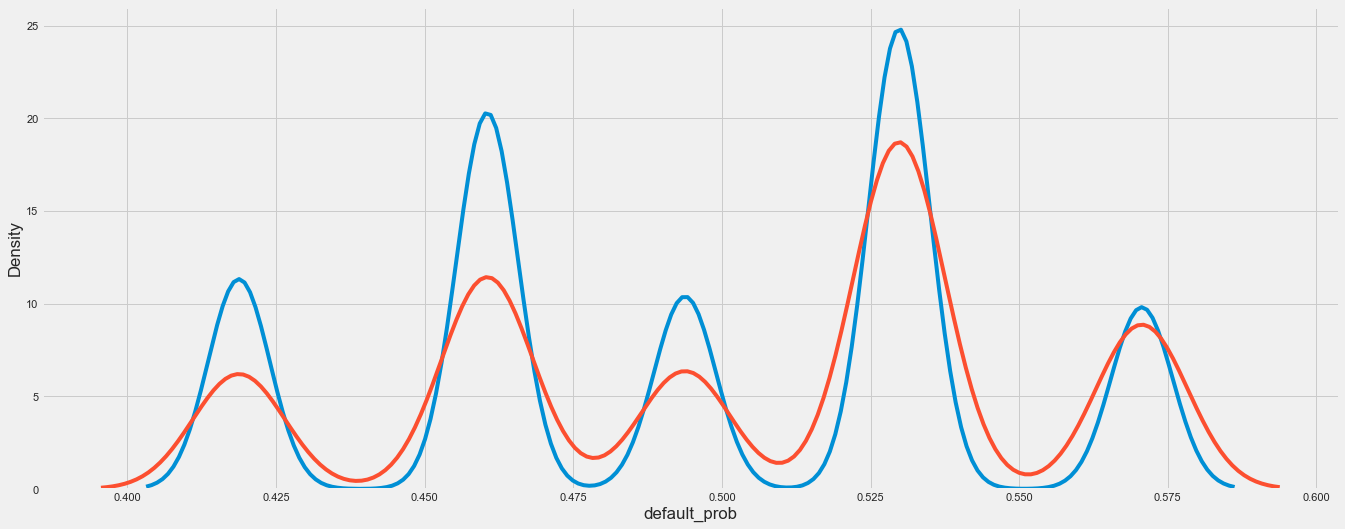

true_class  predicted_class
0           0                  0.548192
            1                  0.451808
1           1                  0.534786
            0                  0.465214
Name: predicted_class, dtype: float64


In [ ]:
eval_model(tes4_tuned, x_test, y_test)

### AdaBost

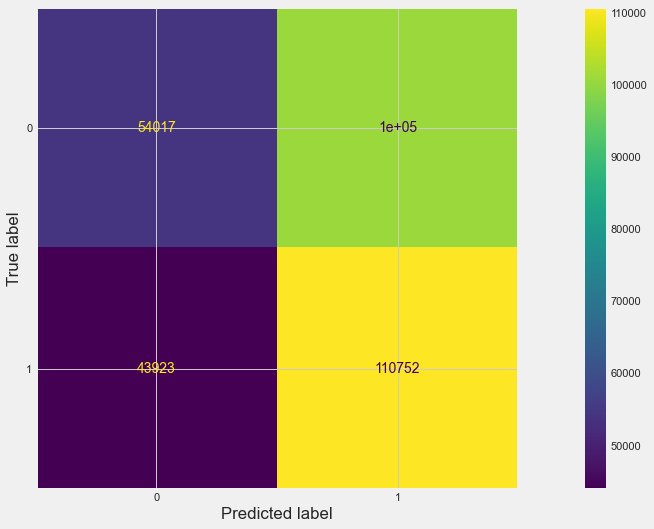



Accuracy:  0.5326297074511072
Precision:  0.5238730429024171
Recall:  0.716030386293842
F1:  0.6050616660065287
AUC:  0.5536299317988422


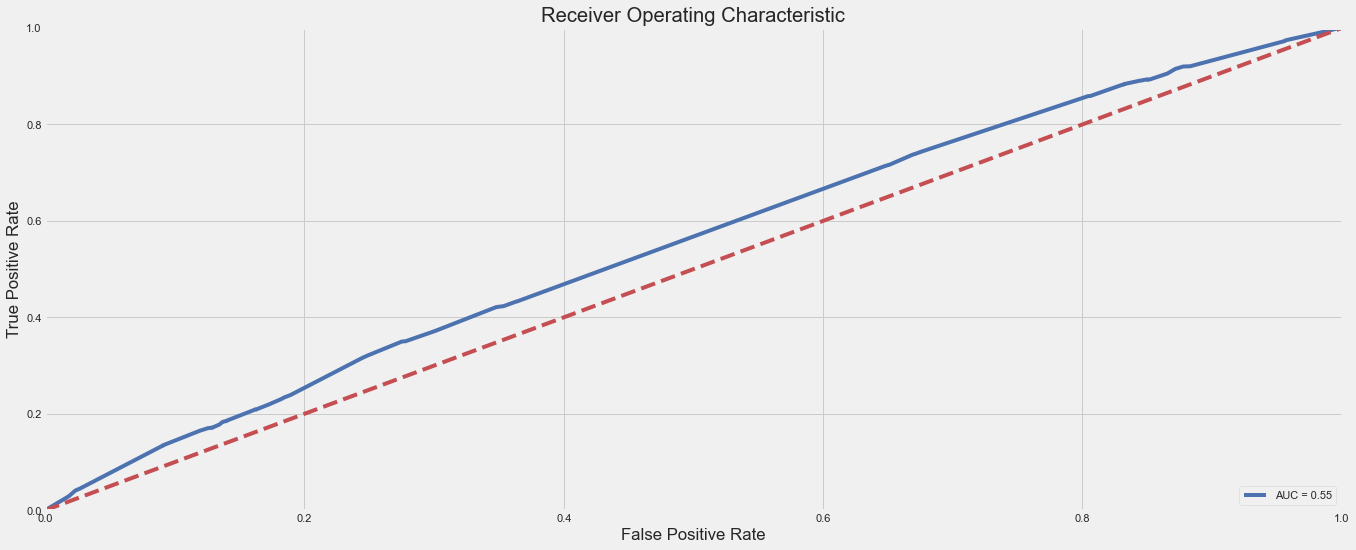

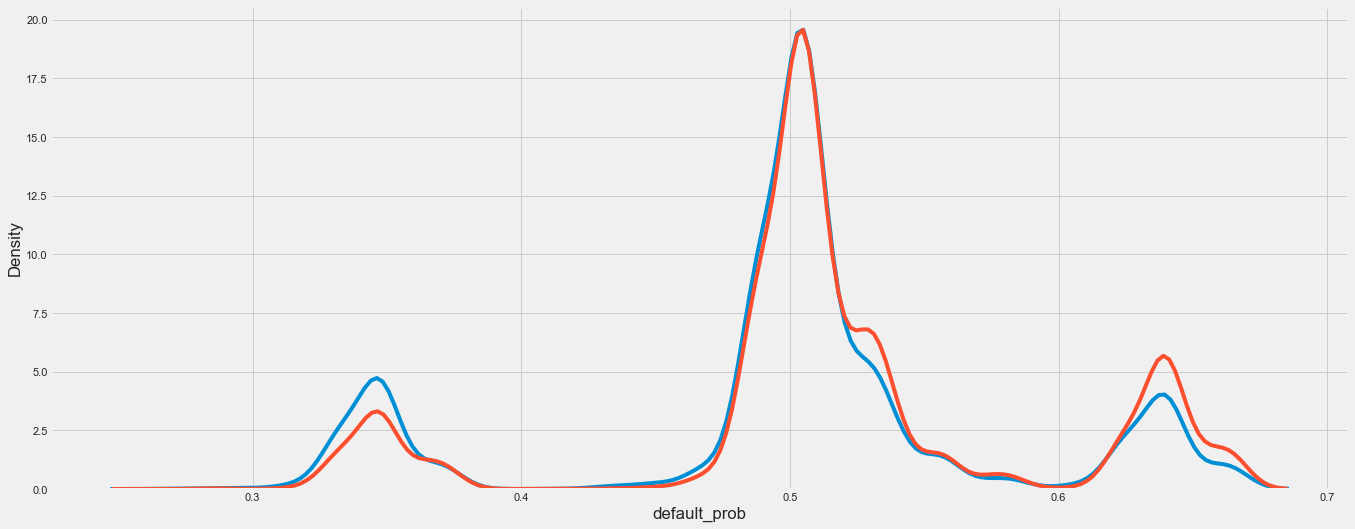

true_class  predicted_class
0           1                  0.650771
            0                  0.349229
1           1                  0.716030
            0                  0.283970
Name: predicted_class, dtype: float64


In [ ]:
anakmilenial = dict(n_estimators = [1251], 
                       learning_rate = [0.009000000000000001],  
                       algorithm = ['SAMME'])



tes5 = AdaBoostClassifier()
tes5_tuned = RandomizedSearchCV(tes5, anakmilenial, random_state=42)
tes5_tuned.fit(x_train_s, y_train_s)


eval_model(tes5_tuned, x_train_s, y_train_s)

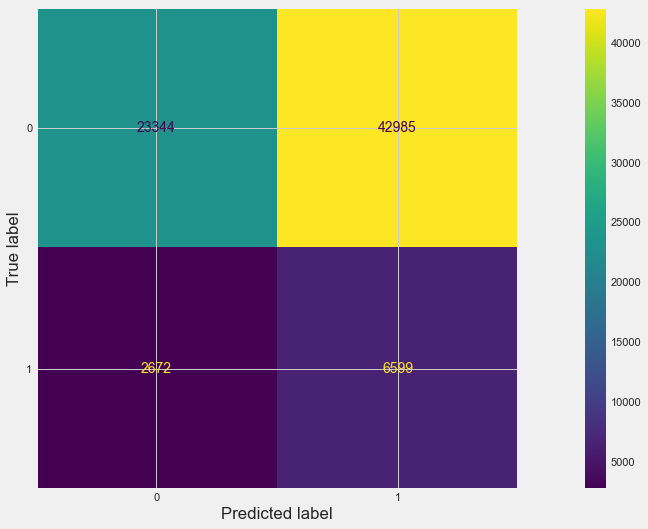



Accuracy:  0.3960714285714286
Precision:  0.13308728622136173
Recall:  0.7117894509761622
F1:  0.2242460283748195
AUC:  0.5515921165728686


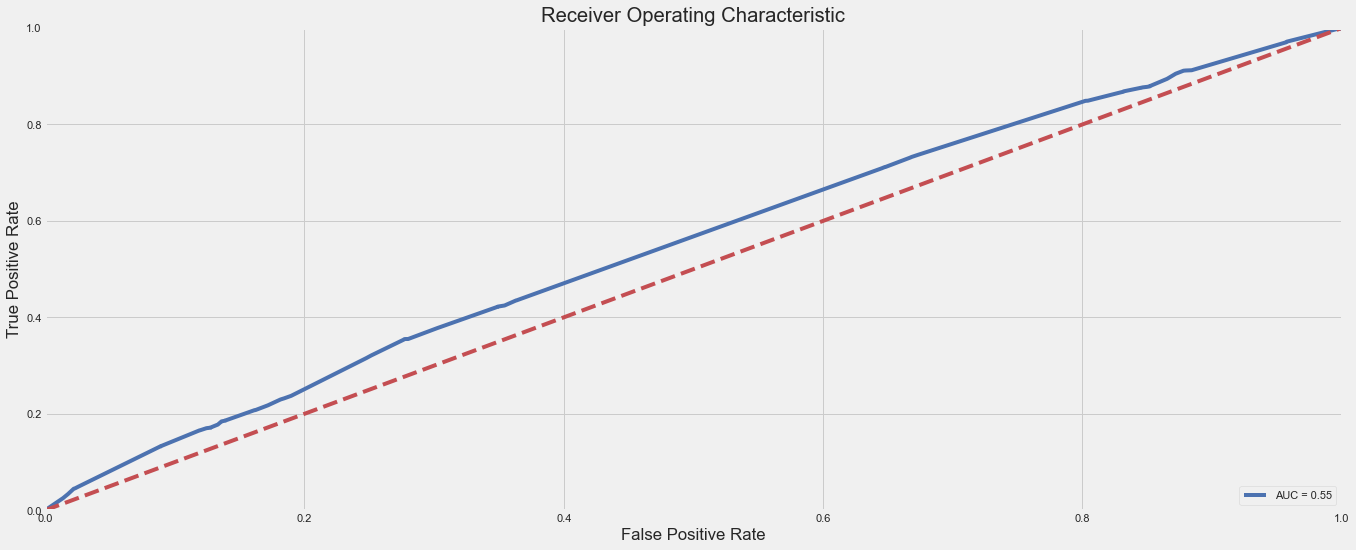

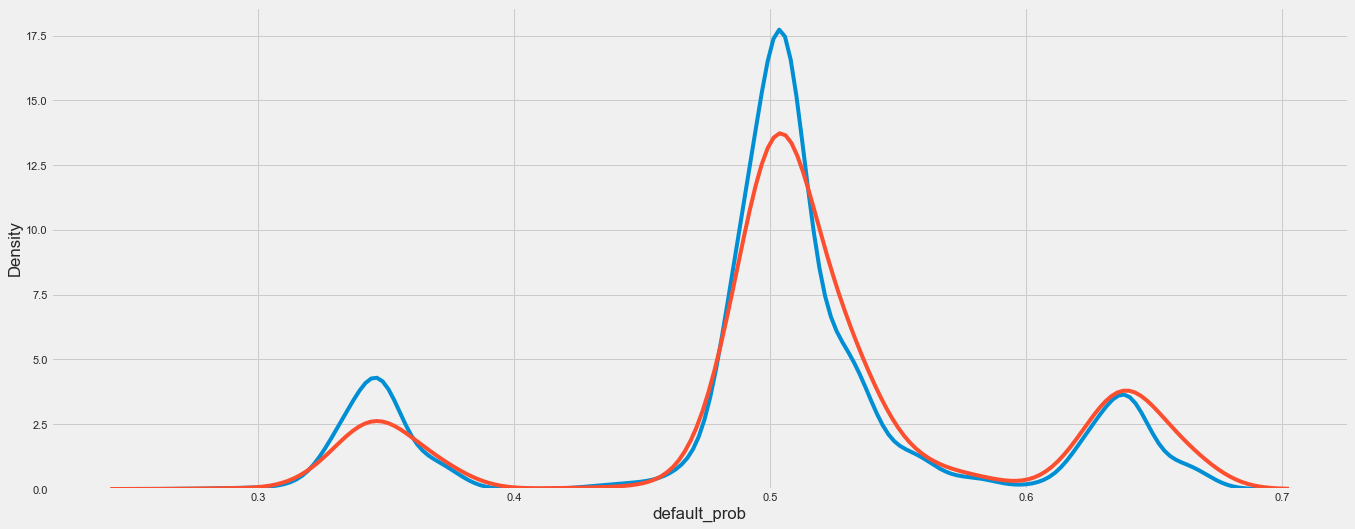

true_class  predicted_class
0           1                  0.648057
            0                  0.351943
1           1                  0.711789
            0                  0.288211
Name: predicted_class, dtype: float64


In [ ]:
eval_model(tes5_tuned, x_test, y_test)

### XGBoost

[22:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

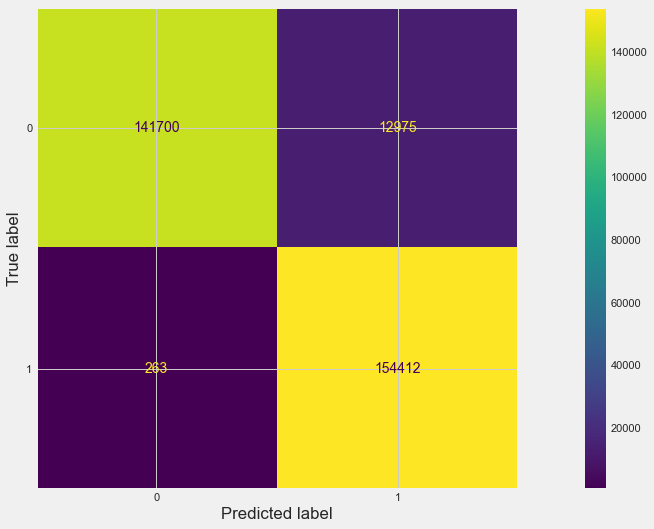



Accuracy:  0.9572070470341038
Precision:  0.9224850197446636
Recall:  0.9982996605786326
F1:  0.958896113170756
AUC:  0.9763230094102064


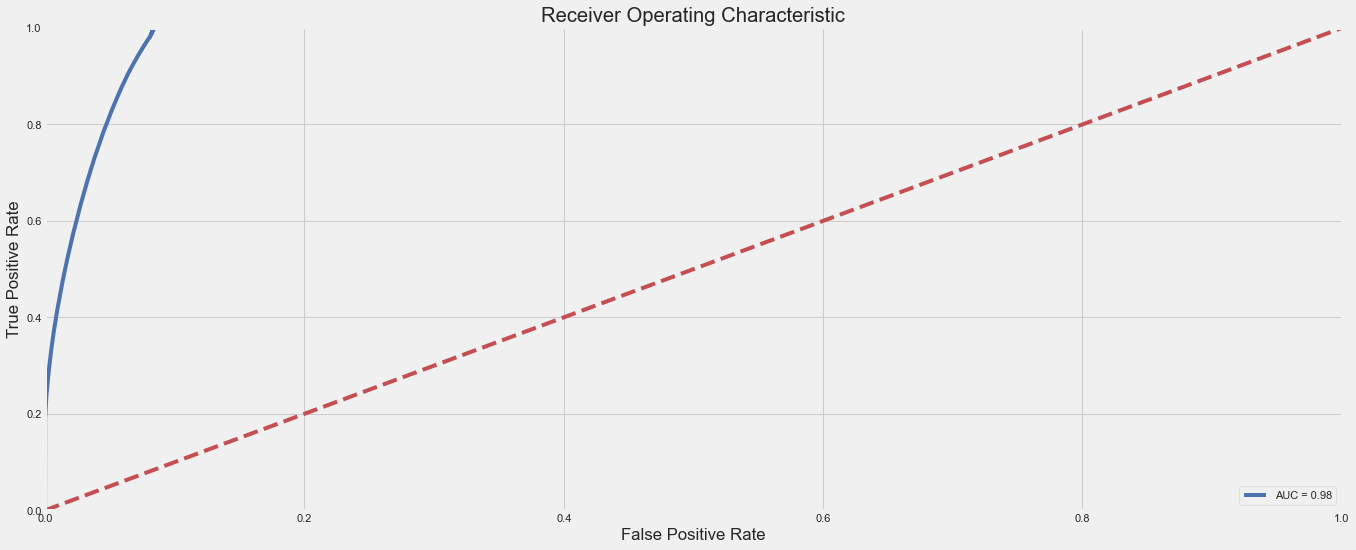

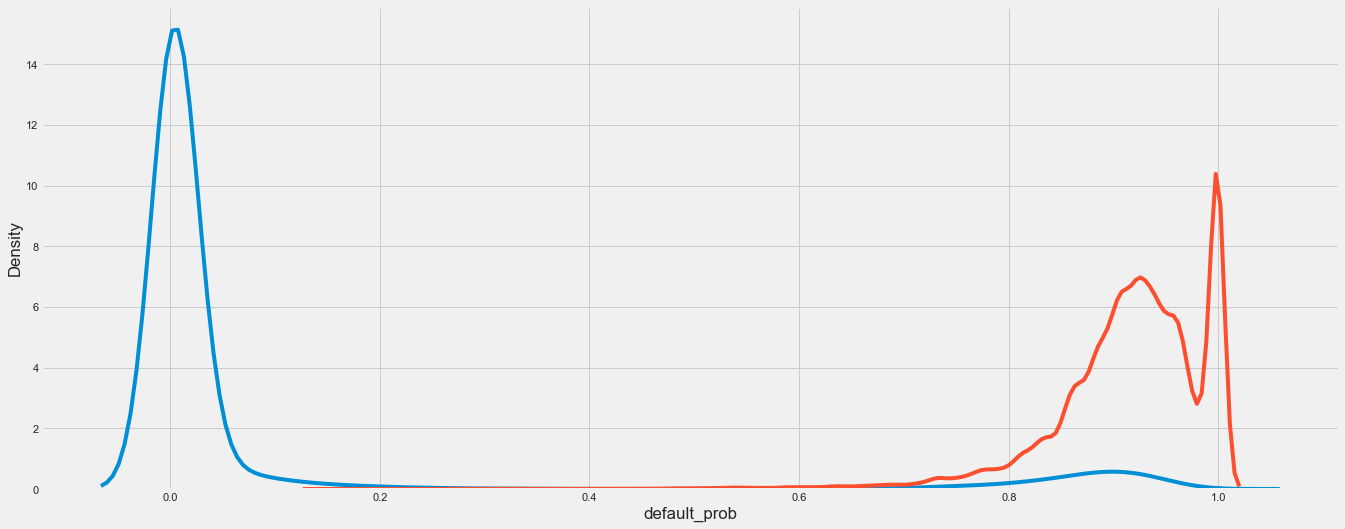

true_class  predicted_class
0           0                  0.916114
            1                  0.083886
1           1                  0.998300
            0                  0.001700
Name: predicted_class, dtype: float64


In [ ]:
deppyfajrifaviannityavicbersatu = dict(max_depth = [60],
                        min_child_weight = [4],
                        gamma = [0.2],
                        tree_method = ['auto'],
                        colsample_bytree = [0.7000000000000001],
                        eta = [0.6060606060606061],
                        alpha = [0.9])


tes6 = XGBClassifier()
tes6_tuned = RandomizedSearchCV(tes6, deppyfajrifaviannityavicbersatu, random_state=42)
tes6_tuned.fit(x_train_s, y_train_s)


eval_model(tes6_tuned, x_train_s, y_train_s)

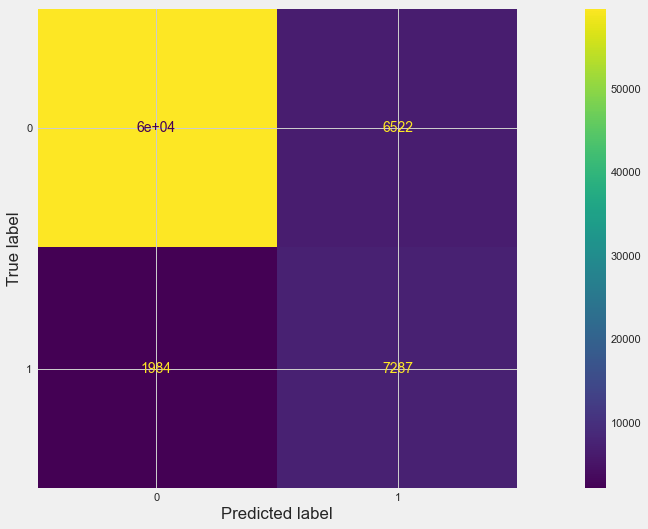



Accuracy:  0.8874867724867724
Precision:  0.5276993265261786
Recall:  0.7859993528206235
F1:  0.6314558058925477
AUC:  0.9246264822426875


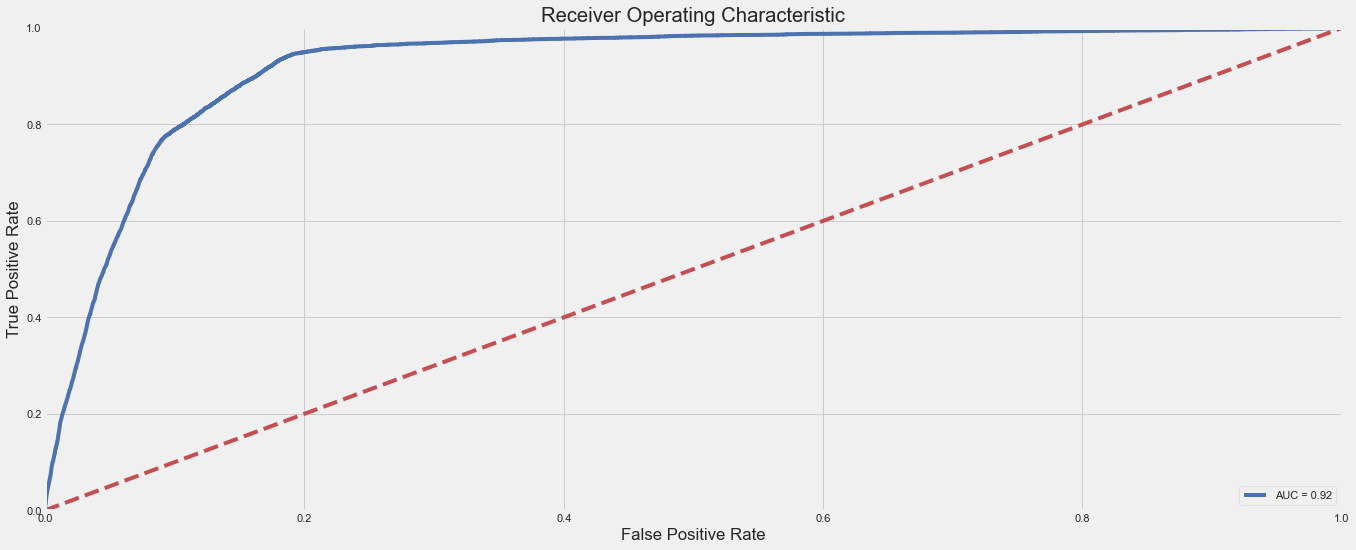

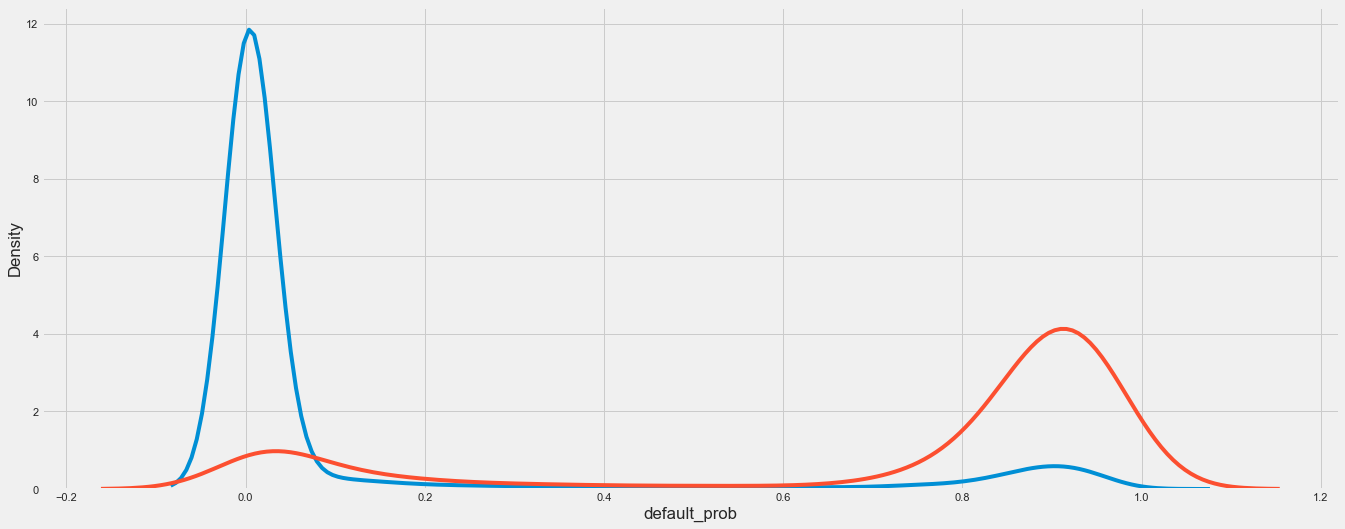

true_class  predicted_class
0           0                  0.901672
            1                  0.098328
1           1                  0.785999
            0                  0.214001
Name: predicted_class, dtype: float64


In [ ]:
eval_model(tes6_tuned, x_test, y_test)

## Showing Feature Importance

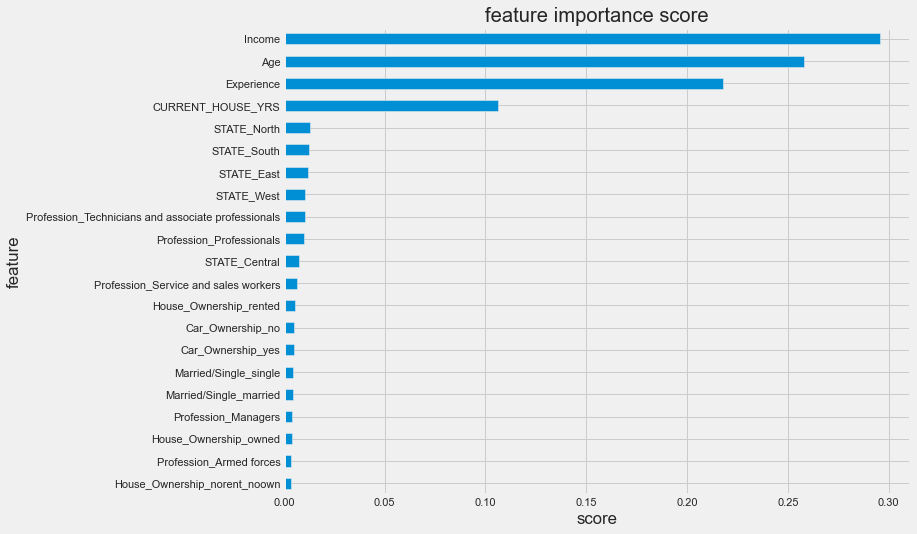

In [ ]:
anakkeren2 = dict( n_estimators = [400], 
max_features = ['log2'], 
max_depth = [110], 
criterion = ['gini'], 
min_samples_split = [4], 
min_samples_leaf = [1], 
bootstrap = [True], 
n_jobs = [-1])



tesf = RandomForestClassifier()
tesf_tuned = RandomizedSearchCV(tesf, anakkeren2, random_state=42)
tesf_tuned.fit(x_train_s, y_train_s)

show_feature_importance(tesf_tuned.best_estimator_)

# Clustering (penggunaan K-Means)

Kita menggunakan data SMOTE yang sudah di standarisasi.

In [ ]:
datakusayang = data_smote
sc_data = StandardScaler()
datacus = sc_data.fit_transform(datakusayang)
pandacus = pd.DataFrame(datacus, columns=list(datakusayang))
pandacus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87897 entries, 0 to 87896
Data columns (total 23 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Income                                              87897 non-null  float64
 1   Age                                                 87897 non-null  float64
 2   Experience                                          87897 non-null  float64
 3   CURRENT_JOB_YRS                                     87897 non-null  float64
 4   CURRENT_HOUSE_YRS                                   87897 non-null  float64
 5   Profession_Armed forces                             87897 non-null  float64
 6   Profession_Managers                                 87897 non-null  float64
 7   Profession_Professionals                            87897 non-null  float64
 8   Profession_Service and sales workers                87897 non-null  float64


In [ ]:
pandacus = pandacus.drop(labels = ['CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Profession_Armed forces', 'Profession_Managers', 'Profession_Professionals', 'Profession_Service and sales workers', 'Profession_Technicians and associate professionals', 'STATE_Central', 'STATE_East', 'STATE_North', 'STATE_South', 'STATE_West', 'Married/Single_married', 'Married/Single_single', 'House_Ownership_norent_noown', 'House_Ownership_owned', 'House_Ownership_rented', 'Car_Ownership_no', 'Car_Ownership_yes', 'Risk_Flag'], axis = 1)
pandacus

Income       Age  Experience
0     -1.280460 -1.712765   -1.208631
1      0.888076 -0.619160    0.060681
2     -0.350899  1.053413   -1.027301
3      0.432261 -0.554830   -1.389961
4      0.263646 -0.168852    0.242011
...         ...       ...         ...
87892  0.620049 -0.426171    1.329992
87893 -0.775051  0.281456    0.242011
87894  1.067912 -0.168852    0.786002
87895  1.448299 -0.168852   -0.301980
87896  1.591287 -1.455446    1.148662

[87897 rows x 3 columns]

Evaluasi Model

<AxesSubplot:>

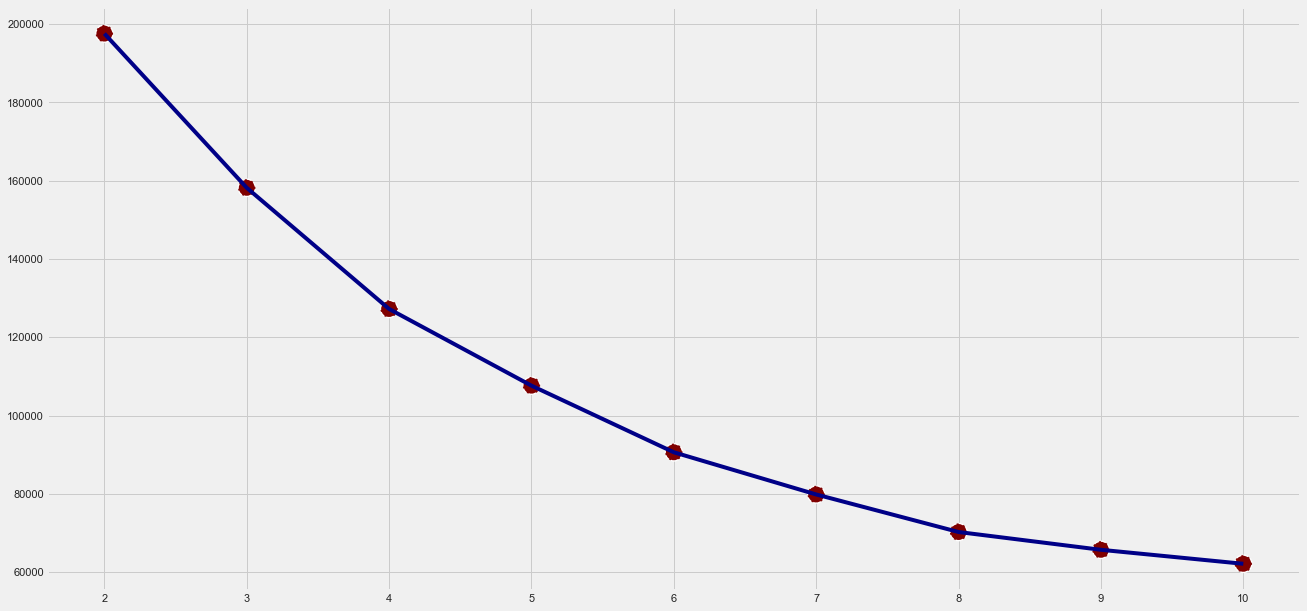

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(pandacus)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

## Modelling Cluster

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(pandacus)

In [ ]:
pandacus['clusters'] = kmeans.labels_

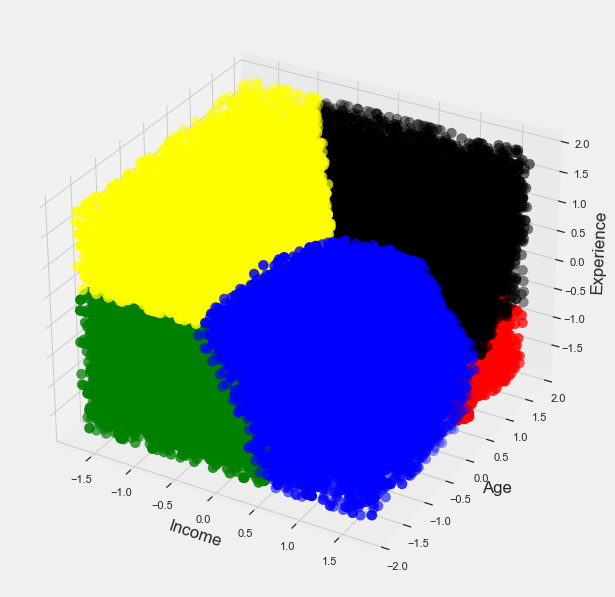

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pandacus['Income'][pandacus['clusters'] == 0], pandacus['Age'][pandacus['clusters'] == 0], pandacus['Experience'][pandacus['clusters'] == 0], s=100, c= 'red', linestyle='--')
ax.scatter(pandacus['Income'][pandacus['clusters'] == 1], pandacus['Age'][pandacus['clusters'] == 1], pandacus['Experience'][pandacus['clusters'] == 1], s=100, c='blue', linestyle='--')
ax.scatter(pandacus['Income'][pandacus['clusters'] == 2], pandacus['Age'][pandacus['clusters'] == 2], pandacus['Experience'][pandacus['clusters'] == 2], s=100, c= 'green', linestyle='--')
ax.scatter(pandacus['Income'][pandacus['clusters'] == 3], pandacus['Age'][pandacus['clusters'] == 3], pandacus['Experience'][pandacus['clusters'] == 3], s=100, c= 'black', linestyle='--')
ax.scatter(pandacus['Income'][pandacus['clusters'] == 4], pandacus['Age'][pandacus['clusters'] == 4], pandacus['Experience'][pandacus['clusters'] == 4], s=100, c = 'yellow', linestyle='--')


plt.xlabel('Income')
plt.ylabel('Age')
ax.set_zlabel('Experience')
plt.show()

In [ ]:
pca = PCA(n_components=2)

pca.fit(pandacus)
pcs = pca.transform(pandacus)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = pandacus['clusters']
data_pca.head()


PC 1      PC 2  clusters
0 -0.149446 -1.041238         2
1 -0.884460  1.012543         1
2 -2.184879 -0.913077         0
3 -1.496206  0.137736         1
4 -0.727697  0.371719         1

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

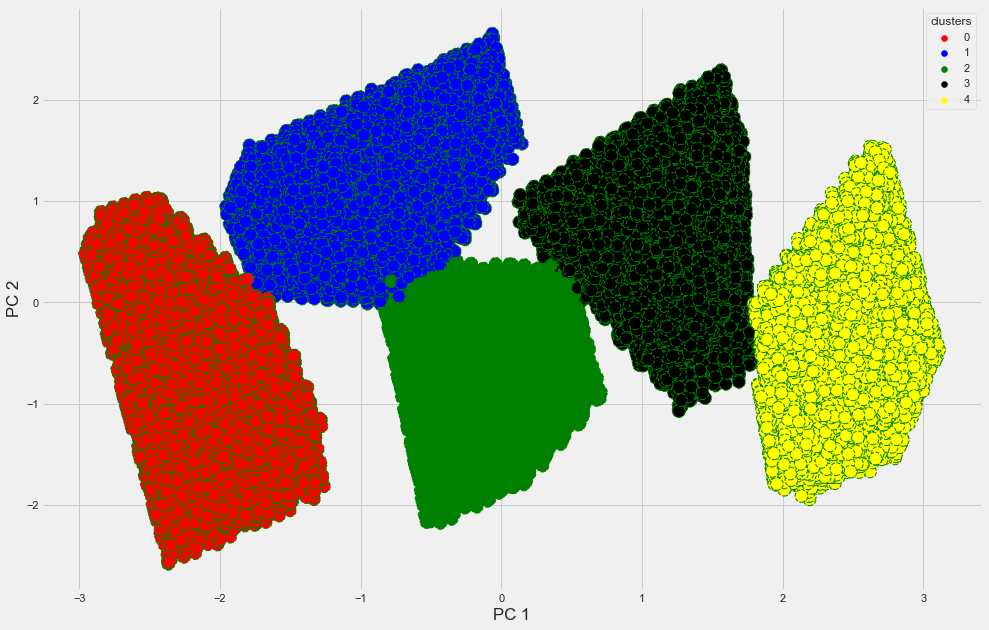

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['red','blue','green','black', 'yellow'],
    s=160,
    ax=ax
)

## Business Metric Supervised ML (NPL)

### Sebelum Menggunakan ML 

In [ ]:
databm = data
xbm2 = databm.drop(labels = ['CURRENT_JOB_YRS', 'Risk_Flag'], axis = 1)
ybm2 = data['Risk_Flag']

xbm2_train, xbm2_test, ybm2_train, ybm2_test = train_test_split(xbm2, ybm2, test_size=0.3, random_state=42)

In [ ]:
data_pas_real = pd.concat([xbm2_test, ybm2_test], axis=1)
data_pas_real

Id   Income  Age  Experience Married/Single House_Ownership  \
75255    75256  4260981   47          18         single          rented   
192435  192436  8529345   44           2         single          rented   
154839  154840  7848654   55           9         single          rented   
59774    59775  8491491   61          20         single          rented   
63788    63789  1537266   78          13         single          rented   
...        ...      ...  ...         ...            ...             ...   
148446  148447  6184989   37          18         single          rented   
208441  208442  1314166   58          17         single          rented   
137796  137797  8461353   33           2         single          rented   
34679    34680  8424956   57          12         single          rented   
140529  140530  6862187   22           7         single          rented   

       Car_Ownership                               Profession          CITY  \
75255             no                            Professionals      Hindupur   
192435            no                            Professionals  Narasaraopet   
154839            no                            Professionals         Patna   
59774             no                            Professionals        Haldia   
63788             no                            Professionals    Coimbatore   
...              ...                                      ...           ...   
148446            no  Technicians and associate professionals      Shivpuri   
208441            no                            Professionals     Alappuzha   
137796            no                             Armed forces       Shimoga   
34679             no                            Professionals    Kadapa[23]   
140529            no                            Professionals      Srinagar   

          STATE  CURRENT_HOUSE_YRS  Risk_Flag  
75255     South                 13          0  
192435    South                 10          0  
154839     East                 13          0  
59774      East                 11          0  
63788     South                 12          0  
...         ...                ...        ...  
148446  Central                 10          0  
208441    South                 10          0  
137796    South                 13          0  
34679     South                 10          1  
140529    North                 12          1  

[75600 rows x 12 columns]

In [ ]:
#Simplifikasi dari kolom profesi.
data_pas_real['Profession'].replace('Air_traffic_controller','Technicians and associate professionals', inplace=True)
data_pas_real['Profession'].replace('Analyst','Professionals', inplace=True)
data_pas_real['Profession'].replace('Architect','Professionals', inplace=True)
data_pas_real['Profession'].replace('Army_officer','Armed forces', inplace=True)
data_pas_real['Profession'].replace('Artist','Professionals', inplace=True)
data_pas_real['Profession'].replace('Aviator','Technicians and associate professionals', inplace=True)
data_pas_real['Profession'].replace('Biomedical_Engineer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Chartered_Accountant','Professionals', inplace=True)
data_pas_real['Profession'].replace('Chef','Technicians and associate professionals', inplace=True)
data_pas_real['Profession'].replace('Chemical_engineer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Civil_engineer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Civil_servant','Technicians and associate professionals', inplace=True)
data_pas_real['Profession'].replace('Comedian','Professionals', inplace=True)
data_pas_real['Profession'].replace('Computer_hardware_engineer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Computer_operator','Technicians and associate professionals', inplace=True)
data_pas_real['Profession'].replace('Consultant','Professionals', inplace=True)
data_pas_real['Profession'].replace('Dentist','Professionals', inplace=True)
data_pas_real['Profession'].replace('Design_Engineer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Designer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Drafter','Technicians and associate professionals', inplace=True)
data_pas_real['Profession'].replace('Economist','Professionals', inplace=True)
data_pas_real['Profession'].replace('Engineer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Fashion_Designer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Financial_Analyst','Professionals', inplace=True)
data_pas_real['Profession'].replace('Firefighter','Service and sales workers', inplace=True)
data_pas_real['Profession'].replace('Flight_attendant','Service and sales workers', inplace=True)
data_pas_real['Profession'].replace('Geologist','Professionals', inplace=True)
data_pas_real['Profession'].replace('Graphic_Designer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Hotel_Manager','Managers', inplace=True)
data_pas_real['Profession'].replace('Industrial_Engineer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Lawyer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Librarian','Professionals', inplace=True)
data_pas_real['Profession'].replace('Magistrate','Professionals', inplace=True)
data_pas_real['Profession'].replace('Mechanical_engineer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Microbiologist','Professionals', inplace=True)
data_pas_real['Profession'].replace('Official','Technicians and associate professionals', inplace=True)
data_pas_real['Profession'].replace('Petroleum_Engineer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Physician','Professionals', inplace=True)
data_pas_real['Profession'].replace('Police_officer','Service and sales workers', inplace=True)
data_pas_real['Profession'].replace('Politician','Professionals', inplace=True)
data_pas_real['Profession'].replace('Psychologist','Professionals', inplace=True)
data_pas_real['Profession'].replace('Scientist','Professionals', inplace=True)
data_pas_real['Profession'].replace('Secretary','Technicians and associate professionals', inplace=True)
data_pas_real['Profession'].replace('Software_Developer','Professionals', inplace=True)
data_pas_real['Profession'].replace('Statistician','Professionals', inplace=True)
data_pas_real['Profession'].replace('Surgeon','Professionals', inplace=True)
data_pas_real['Profession'].replace('Surveyor','Technicians and associate professionals', inplace=True)
data_pas_real['Profession'].replace('Technical_writer','Technicians and associate professionals', inplace=True)
data_pas_real['Profession'].replace('Technician','Technicians and associate professionals', inplace=True)
data_pas_real['Profession'].replace('Technology_specialist','Professionals', inplace=True)
data_pas_real['Profession'].replace('Web_designer','Professionals', inplace=True)

#Simplifikasi dari kolom State
data_pas_real['STATE'].replace('Andhra_Pradesh','South', inplace=True)
data_pas_real['STATE'].replace('Assam','North', inplace=True)
data_pas_real['STATE'].replace('Bihar','East', inplace=True)
data_pas_real['STATE'].replace('Chandigarh','North', inplace=True)
data_pas_real['STATE'].replace('Chhattisgarh','Central', inplace=True)
data_pas_real['STATE'].replace('Delhi','North', inplace=True)
data_pas_real['STATE'].replace('Gujarat','West', inplace=True)
data_pas_real['STATE'].replace('Haryana','North', inplace=True)
data_pas_real['STATE'].replace('Himachal_Pradesh','North', inplace=True)
data_pas_real['STATE'].replace('Jammu_and_Kashmir','North', inplace=True)
data_pas_real['STATE'].replace('Jharkhand','East', inplace=True)
data_pas_real['STATE'].replace('Karnataka','South', inplace=True)
data_pas_real['STATE'].replace('Kerala','South', inplace=True)
data_pas_real['STATE'].replace('Madhya_Pradesh','Central', inplace=True)
data_pas_real['STATE'].replace('Maharashtra','West', inplace=True)
data_pas_real['STATE'].replace('Manipur','North', inplace=True)
data_pas_real['STATE'].replace('Mizoram','North', inplace=True)
data_pas_real['STATE'].replace('Odisha','East', inplace=True)
data_pas_real['STATE'].replace('Puducherry','South', inplace=True)
data_pas_real['STATE'].replace('Punjab','North', inplace=True)
data_pas_real['STATE'].replace('Rajasthan','North', inplace=True)
data_pas_real['STATE'].replace('Sikkim','North', inplace=True)
data_pas_real['STATE'].replace('Tamil_Nadu','South', inplace=True)
data_pas_real['STATE'].replace('Telangana','South', inplace=True)
data_pas_real['STATE'].replace('Tripura','North', inplace=True)
data_pas_real['STATE'].replace('Uttar_Pradesh','North', inplace=True)
data_pas_real['STATE'].replace('Uttar_Pradesh[5]','North', inplace=True)
data_pas_real['STATE'].replace('Uttarakhand','North', inplace=True)
data_pas_real['STATE'].replace('West_Bengal','East', inplace=True)


In [ ]:
dummies_category1_pas = pd.get_dummies(data_pas_real['Profession'],prefix='Profession')
dummies_category2_pas = pd.get_dummies(data_pas_real['STATE'],prefix='STATE')
dummies_category3_pas = pd.get_dummies(data_pas_real['Married/Single'],prefix='Married/Single')
dummies_category4_pas = pd.get_dummies(data_pas_real['House_Ownership'],prefix='House_Ownership')
dummies_category5_pas = pd.get_dummies(data_pas_real['Car_Ownership'],prefix='Car_Ownership')
data_pas_real = pd.concat([data_pas_real, dummies_category1_pas, dummies_category2_pas, dummies_category3_pas, dummies_category4_pas, dummies_category5_pas], axis=1)
data_pas_real = data_pas_real.drop(['Id', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'], axis=1)
data_pas_real


Income  Age  Experience  CURRENT_HOUSE_YRS  Risk_Flag  \
75255   4260981   47          18                 13          0   
192435  8529345   44           2                 10          0   
154839  7848654   55           9                 13          0   
59774   8491491   61          20                 11          0   
63788   1537266   78          13                 12          0   
...         ...  ...         ...                ...        ...   
148446  6184989   37          18                 10          0   
208441  1314166   58          17                 10          0   
137796  8461353   33           2                 13          0   
34679   8424956   57          12                 10          1   
140529  6862187   22           7                 12          1   

        Profession_Armed forces  Profession_Managers  \
75255                         0                    0   
192435                        0                    0   
154839                        0                    0   
59774                         0                    0   
63788                         0                    0   
...                         ...                  ...   
148446                        0                    0   
208441                        0                    0   
137796                        1                    0   
34679                         0                    0   
140529                        0                    0   

        Profession_Professionals  Profession_Service and sales workers  \
75255                          1                                     0   
192435                         1                                     0   
154839                         1                                     0   
59774                          1                                     0   
63788                          1                                     0   
...                          ...                                   ...   
148446                         0                                     0   
208441                         1                                     0   
137796                         0                                     0   
34679                          1                                     0   
140529                         1                                     0   

        Profession_Technicians and associate professionals  ...  STATE_North  \
75255                                                   0   ...            0   
192435                                                  0   ...            0   
154839                                                  0   ...            0   
59774                                                   0   ...            0   
63788                                                   0   ...            0   
...                                                   ...   ...          ...   
148446                                                  1   ...            0   
208441                                                  0   ...            0   
137796                                                  0   ...            0   
34679                                                   0   ...            0   
140529                                                  0   ...            1   

        STATE_South  STATE_West  Married/Single_married  \
75255             1           0                       0   
192435            1           0                       0   
154839            0           0                       0   
59774             0           0                       0   
63788             1           0                       0   
...             ...         ...                     ...   
148446            0           0                       0   
208441            1           0                       0   
137796            1           0                       0   
34679             1           0                       0   
140529            0           0             

In [ ]:
risk_pas_real = data_pas_real['Risk_Flag']
nonrisk_pas_real = data_pas_real.drop(labels = ['Risk_Flag'], axis = 1)
normalisasi_pas_real = StandardScaler().fit_transform(nonrisk_pas_real)
normalisasi_data_pas_real = pd.DataFrame(normalisasi_pas_real, columns=list(nonrisk_pas_real))
normalisasi_data_pas_real

Income       Age  Experience  CURRENT_HOUSE_YRS  \
0     -0.256160 -0.163947    1.319702           0.713625   
1      1.231726 -0.340053   -1.347325          -1.431335   
2      0.994447  0.305669   -0.180501           0.713625   
3      1.218530  0.657881    1.653080          -0.716348   
4     -1.205604  1.655814    0.486256          -0.001362   
...         ...       ...         ...                ...   
75595  0.414520 -0.750967    1.319702          -1.431335   
75596 -1.283373  0.481775    1.153013          -1.431335   
75597  1.208025 -0.985775   -1.347325           0.713625   
75598  1.195337  0.423073    0.319567          -1.431335   
75599  0.650580 -1.631497   -0.513879          -0.001362   

       Profession_Armed forces  Profession_Managers  Profession_Professionals  \
0                    -0.136860             -0.14444                  0.670280   
1                    -0.136860             -0.14444                  0.670280   
2                    -0.136860             -0.14444                  0.670280   
3                    -0.136860             -0.14444                  0.670280   
4                    -0.136860             -0.14444                  0.670280   
...                        ...                  ...                       ...   
75595                -0.136860             -0.14444                 -1.491914   
75596                -0.136860             -0.14444                  0.670280   
75597                 7.306743             -0.14444                 -1.491914   
75598                -0.136860             -0.14444                  0.670280   
75599                -0.136860             -0.14444                  0.670280   

       Profession_Service and sales workers  \
0                                 -0.248502   
1                                 -0.248502   
2                                 -0.248502   
3                                 -0.248502   
4                                 -0.248502   
...                                     ...   
75595                             -0.248502   
75596                             -0.248502   
75597                             -0.248502   
75598                             -0.248502   
75599                             -0.248502   

       Profession_Technicians and associate professionals  STATE_Central  ...  \
0                                              -0.520263       -0.277295  ...   
1                                              -0.520263       -0.277295  ...   
2                                              -0.520263       -0.277295  ...   
3                                              -0.520263       -0.277295  ...   
4                                              -0.520263       -0.277295  ...   
...                                                  ...             ...  ...   
75595                                           1.922105        3.606271  ...   
75596                                          -0.520263       -0.277295  ...   
75597                                          -0.520263       -0.277295  ...   
75598                                          -0.520263       -0.277295  ...   
75599                                          -0.520263       -0.277295  ...   

       STATE_North  STATE_South  STATE_West  Married/Single_married  \
0         -0.63180     1.641485   -0.413285                -0.33507   
1         -0.63180     1.641485   -0.413285                -0.33507   
2         -0.63180    -0.609204   -0.413285                -0.33507   
3         -0.63180    -0.609204   -0.413285                -0.33507   
4         -0.63180     1.641485   -0.413285                -0.33507   
...            ...          ...         ...                     ...   
75595     -0.63180    -0.609204   -0.413285                -0.33507   
75596     -0.63180     1.641485   -0.413285                -0.33507   
75597     -0.63180     1.641485   -0.413285                -0.33507   
75598     -0.63180     1.641485   -0.413285                -0.33507

In [ ]:
xbm_pas_real = normalisasi_data_pas_real
ybm_pas_real = risk_pas_real

realxbmpas_train, realxbmpas_test, realybmpas_train, realybmpas_test = train_test_split(xbm_pas_real, ybm_pas_real, test_size=0.3, random_state=42)

In [ ]:
smote = SMOTE()
x_train_s_pas_real, y_train_s_pas_real = smote.fit_resample(realxbmpas_train, realybmpas_train)

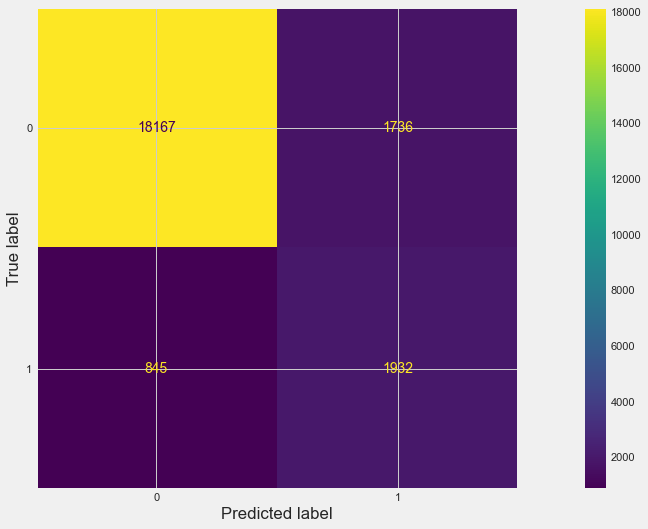



Accuracy:  0.8861992945326279
Precision:  0.5267175572519084
Recall:  0.6957148001440403
F1:  0.5995345228859581
AUC:  0.9241282770952987


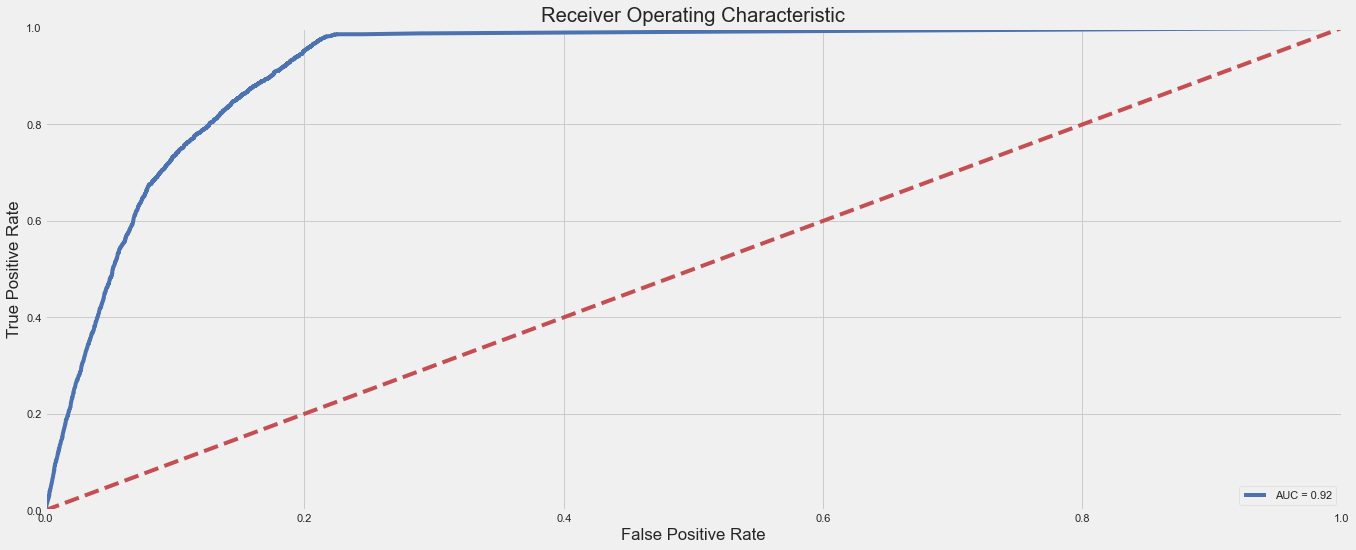

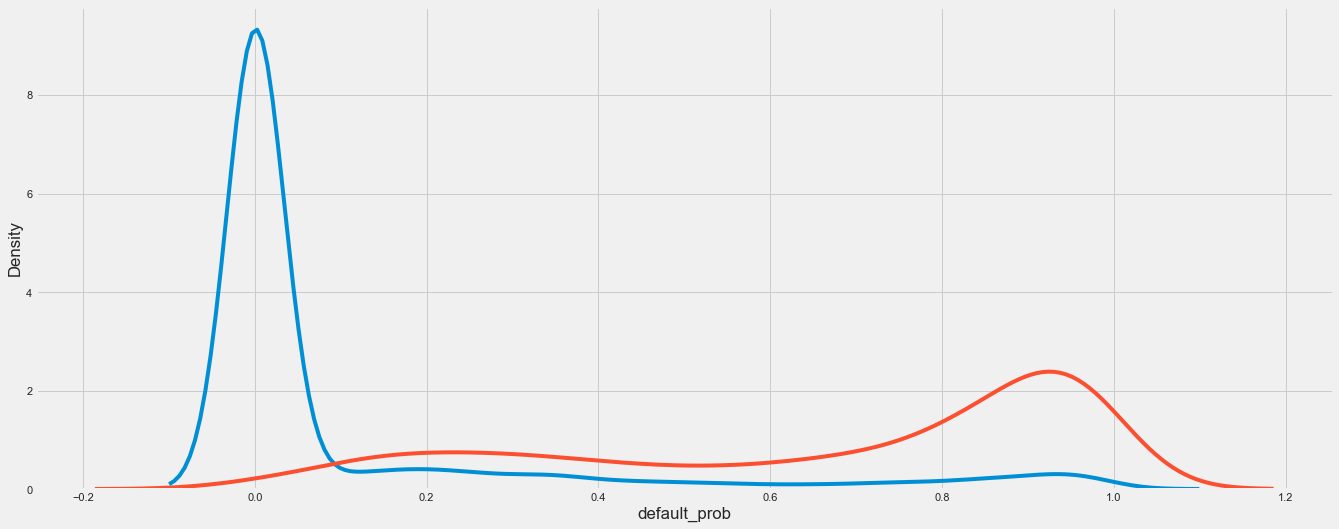

true_class  predicted_class
0           0                  0.912777
            1                  0.087223
1           1                  0.695715
            0                  0.304285
Name: predicted_class, dtype: float64


In [ ]:
rfc_model_pas_real = RandomForestClassifier()
rfc_model_pas_real.fit(x_train_s_pas_real, y_train_s_pas_real)
eval_model(rfc_model_pas_real, realxbmpas_test, realybmpas_test)

### Setelah Menggunakan ML

In [ ]:
knn_npl = RandomForestClassifier()
knn_npl.fit(x_train_s, y_train_s)

RandomForestClassifier()

In [ ]:
y_predicted4 = knn_npl.predict(x_test)
guaganteng4 = y_predicted4
guaganteng4

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
xbm4 = nonrisk.drop(labels = ['CURRENT_JOB_YRS'], axis = 1)
ybm4 = risk

xbm4_train, xbm4_test, ybm4_train, ybm4_test = train_test_split(xbm4, ybm4, test_size=0.3, random_state=42)

In [ ]:
anakculun4 = xbm4_test
anakculun4['risk'] = guaganteng4
anakculun4

Income  Age  Experience  CURRENT_HOUSE_YRS  Profession_Armed forces  \
75255   4260981   47          18                 13                        0   
192435  8529345   44           2                 10                        0   
154839  7848654   55           9                 13                        0   
59774   8491491   61          20                 11                        0   
63788   1537266   78          13                 12                        0   
...         ...  ...         ...                ...                      ...   
148446  6184989   37          18                 10                        0   
208441  1314166   58          17                 10                        0   
137796  8461353   33           2                 13                        1   
34679   8424956   57          12                 10                        0   
140529  6862187   22           7                 12                        0   

        Profession_Managers  Profession_Professionals  \
75255                     0                         1   
192435                    0                         1   
154839                    0                         1   
59774                     0                         1   
63788                     0                         1   
...                     ...                       ...   
148446                    0                         0   
208441                    0                         1   
137796                    0                         0   
34679                     0                         1   
140529                    0                         1   

        Profession_Service and sales workers  \
75255                                      0   
192435                                     0   
154839                                     0   
59774                                      0   
63788                                      0   
...                                      ...   
148446                                     0   
208441                                     0   
137796                                     0   
34679                                      0   
140529                                     0   

        Profession_Technicians and associate professionals  STATE_Central  \
75255                                                   0               0   
192435                                                  0               0   
154839                                                  0               0   
59774                                                   0               0   
63788                                                   0               0   
...                                                   ...             ...   
148446                                                  1               1   
208441                                                  0               0   
137796                                                  0               0   
34679                                                   0               0   
140529                                                  0               0   

        ...  STATE_South  STATE_West  Married/Single_married  \
75255   ...            1           0                       0   
192435  ...            1           0                       0   
154839  ...            0           0                       0   
59774   ...            0           0                       0   
63788   ...            1           0                       0   
...     ...          ...         ...                     ...   
148446  ...            0           0                       0   
208441  ...            1           0                       0   
137796  ...            1           0                       0   
34679   ...            1           0                       0   
140529  ...            0           0                       0   

        Married/Single_single  House_Ownership_norent_noown  \
75255                       1

In [ ]:
risk_pas = anakculun4['risk']
nonrisk_pas = anakculun4.drop(labels = ['risk'], axis = 1)
normalisasi_pas = StandardScaler().fit_transform(nonrisk_pas)
normalisasi_data_pas = pd.DataFrame(normalisasi_pas, columns=list(nonrisk_pas))
normalisasi_data_pas

Income       Age  Experience  CURRENT_HOUSE_YRS  \
0     -0.256160 -0.163947    1.319702           0.713625   
1      1.231726 -0.340053   -1.347325          -1.431335   
2      0.994447  0.305669   -0.180501           0.713625   
3      1.218530  0.657881    1.653080          -0.716348   
4     -1.205604  1.655814    0.486256          -0.001362   
...         ...       ...         ...                ...   
75595  0.414520 -0.750967    1.319702          -1.431335   
75596 -1.283373  0.481775    1.153013          -1.431335   
75597  1.208025 -0.985775   -1.347325           0.713625   
75598  1.195337  0.423073    0.319567          -1.431335   
75599  0.650580 -1.631497   -0.513879          -0.001362   

       Profession_Armed forces  Profession_Managers  Profession_Professionals  \
0                    -0.136860             -0.14444                  0.670280   
1                    -0.136860             -0.14444                  0.670280   
2                    -0.136860             -0.14444                  0.670280   
3                    -0.136860             -0.14444                  0.670280   
4                    -0.136860             -0.14444                  0.670280   
...                        ...                  ...                       ...   
75595                -0.136860             -0.14444                 -1.491914   
75596                -0.136860             -0.14444                  0.670280   
75597                 7.306743             -0.14444                 -1.491914   
75598                -0.136860             -0.14444                  0.670280   
75599                -0.136860             -0.14444                  0.670280   

       Profession_Service and sales workers  \
0                                 -0.248502   
1                                 -0.248502   
2                                 -0.248502   
3                                 -0.248502   
4                                 -0.248502   
...                                     ...   
75595                             -0.248502   
75596                             -0.248502   
75597                             -0.248502   
75598                             -0.248502   
75599                             -0.248502   

       Profession_Technicians and associate professionals  STATE_Central  ...  \
0                                              -0.520263       -0.277295  ...   
1                                              -0.520263       -0.277295  ...   
2                                              -0.520263       -0.277295  ...   
3                                              -0.520263       -0.277295  ...   
4                                              -0.520263       -0.277295  ...   
...                                                  ...             ...  ...   
75595                                           1.922105        3.606271  ...   
75596                                          -0.520263       -0.277295  ...   
75597                                          -0.520263       -0.277295  ...   
75598                                          -0.520263       -0.277295  ...   
75599                                          -0.520263       -0.277295  ...   

       STATE_North  STATE_South  STATE_West  Married/Single_married  \
0         -0.63180     1.641485   -0.413285                -0.33507   
1         -0.63180     1.641485   -0.413285                -0.33507   
2         -0.63180    -0.609204   -0.413285                -0.33507   
3         -0.63180    -0.609204   -0.413285                -0.33507   
4         -0.63180     1.641485   -0.413285                -0.33507   
...            ...          ...         ...                     ...   
75595     -0.63180    -0.609204   -0.413285                -0.33507   
75596     -0.63180     1.641485   -0.413285                -0.33507   
75597     -0.63180     1.641485   -0.413285                -0.33507   
75598     -0.63180     1.641485   -0.413285                -0.33507

In [ ]:
xbm_pas = normalisasi_data_pas
ybm_pas = risk_pas

xbmpas_train, xbmpas_test, ybmpas_train, ybmpas_test = train_test_split(xbm_pas, ybm_pas, test_size=0.3, random_state=42)

In [ ]:
smote = SMOTE()
x_train_s_pas, y_train_s_pas = smote.fit_resample(xbmpas_train, ybmpas_train)

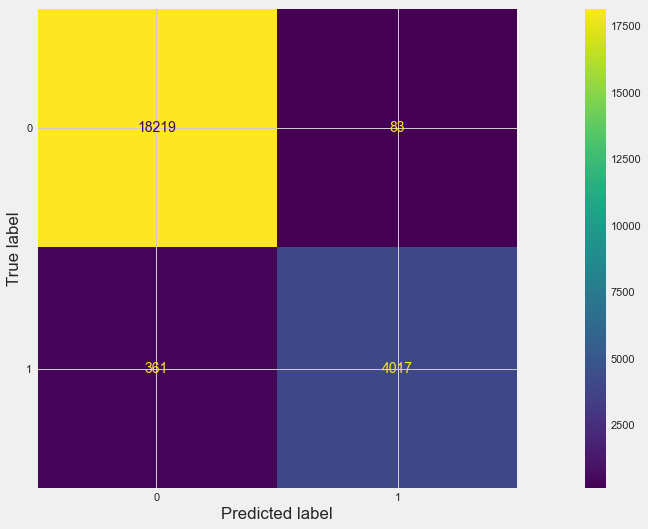



Accuracy:  0.9804232804232804
Precision:  0.9797560975609756
Recall:  0.9175422567382366
F1:  0.9476291578202406
AUC:  0.9963739555907313


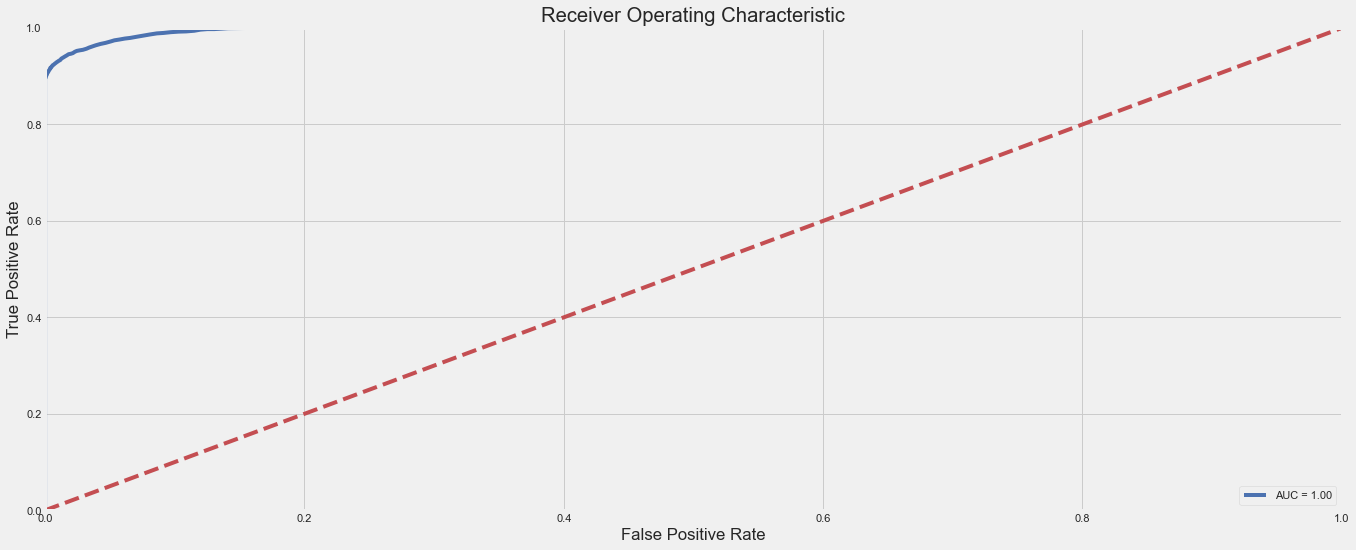

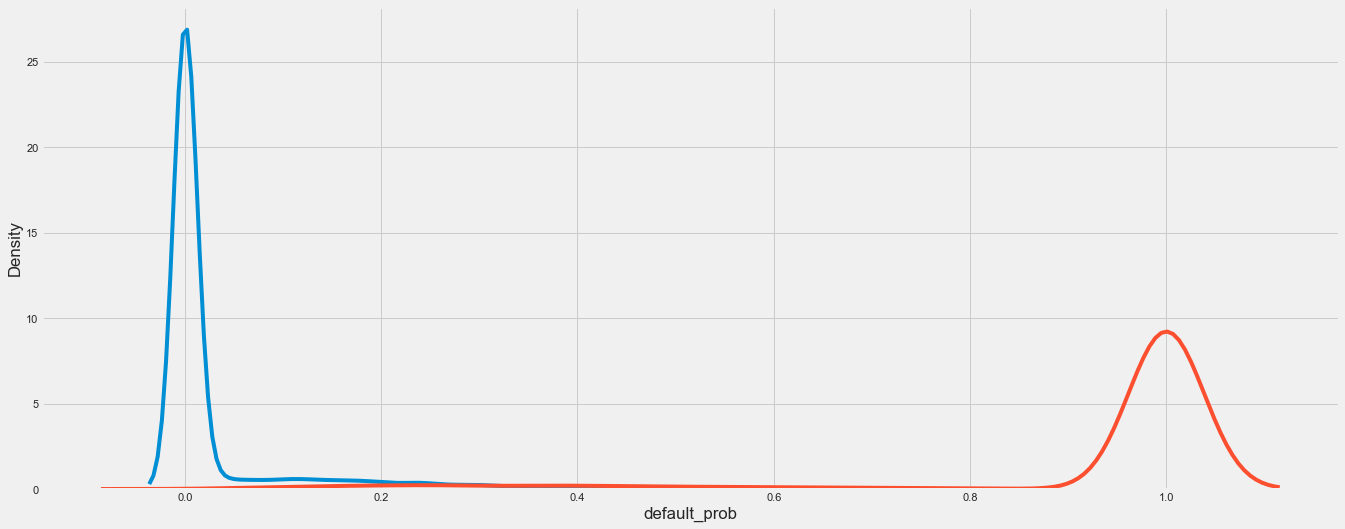

true_class  predicted_class
0           0                  0.995465
            1                  0.004535
1           1                  0.917542
            0                  0.082458
Name: predicted_class, dtype: float64


In [ ]:
rfc_model_pas = RandomForestClassifier()
rfc_model_pas.fit(x_train_s_pas, y_train_s_pas)
eval_model(rfc_model_pas, xbmpas_test, ybmpas_test)

## Business Metric Unsupervised ML (Market Segmentation)

In [ ]:
datakusayang['clusters'] = kmeans.labels_
display(datakusayang.groupby('clusters').agg(['median']))

Income    Age Experience CURRENT_JOB_YRS CURRENT_HOUSE_YRS  \
             median median     median          median            median   
clusters                                                                  
0         4454771.5   65.0        5.0             4.0              12.0   
1         7928393.0   37.0        9.0             6.0              12.0   
2         2421423.0   38.0        5.0             4.0              12.0   
3         7478132.0   62.0       14.0             8.0              12.0   
4         2392006.0   47.0       15.0             8.0              12.0   

         Profession_Armed forces Profession_Managers Profession_Professionals  \
                          median              median                   median   
clusters                                                                        
0                            0.0                 0.0                      1.0   
1                            0.0                 0.0                      1.0   
2                            0.0                 0.0                      1.0   
3                            0.0                 0.0                      1.0   
4                            0.0                 0.0                      1.0   

         Profession_Service and sales workers  \
                                       median   
clusters                                        
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

         Profession_Technicians and associate professionals  ... STATE_South  \
                                                     median  ...      median   
clusters                                                     ...               
0                                                       0.0  ...         0.0   
1                                                       0.0  ...         0.0   
2                                                       0.0  ...         0.0   
3                                                       0.0  ...         0.0   
4                                                       0.0  ...         0.0   

         STATE_West Married/Single_married Married/Single_single  \
             median                 median                median   
clusters                                                           
0               0.0                    0.0                   1.0   
1               0.0                    0.0                   1.0   
2               0.0                    0.0                   1.0   
3               0.0                    0.0                   1.0   
4               0.0                    0.0                   1.0   

         House_Ownership_norent_noown House_Ownership_owned  \
                               median                median   
clusters                                                      
0                                 0.0                   0.0   
1                                 0.0                   0.0   
2                                 0.0                   0.0   
3                                 0.0                   0.0   
4                                 0.0                   0.0   

         House_Ownership_rented Car_Ownership_no Car_Ownership_yes Risk_Flag  
                         median           median            median    median  
clusters                                                                      
0                           1.0              1.0               0.0       1.0  
1                           1.0              1.0               0.0       1.0  
2                           1.0              1.0               0.0       1.0  
3                           1.0              1.0               0.0       1.0  
4                           1.0              1.0               0.0       1.0  

[5 rows x 23 columns]